# Imports and paths

In [1]:
import pandas as pd
import os
import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
np.__version__

'1.16.4'

In [2]:
idat_dir='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/'

#samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet.csv'
#samplesheets_keepers='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet_keepers.csv'

samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/299_Erlangener_Faelle_850K_edited_SJ_KK.xlsx'
#FCD_1a_2a_2b_TSC_PMG.xlsx'
#Erlangener_Faelle_850K_edited_SJ.xlsx'
#299_Erlangener_Faelle_850K_edited_SJ.xlsx

phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'

output_path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/preprocess_outputs/'
output_pickle=output_path+'methyl_array.pkl'

glob.glob('/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')


['/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R04C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R01C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R07C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R03C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R05C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R06C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R02C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/2029

In [3]:
#basenamelist=glob.glob(path+'*/*.idat');basenamelist[:4]

## Processing of phenosheet 

In [8]:
import IDAT_Processor
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [3]:
from IDAT_Processor import PreProcessIDATs, PreProcessPhenoData

In [4]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [5]:
pheno_sheet = pd.read_excel(samplesheet,header=0);pheno_sheet

ID  ID_MATERIAL_TYP             txt_idat  ALTER OP  ALTER Beginn  \
0    131972            54938  202818860053_R04C01      11.0           0.0   
1    131974            54939  202818860053_R05C01      11.0           0.0   
2    131976            54940  202818860053_R06C01      27.0           0.0   
3    131978            54941  202818860053_R07C01      27.0           0.0   
4    131980            54942  202818860053_R08C01      27.0           0.0   
..      ...              ...                  ...       ...           ...   
287  134752            56533  203220070086_R07C01       1.0           0.0   
288  134754            56534  203220070086_R08C01       3.0           0.0   
289  134756            56535  203220070058_R01C01       1.0           0.0   
290  134758            56536  203220070058_R02C01       1.0           0.0   
291  134760            56537  203220070058_R03C01       1.0           0.0   

     DAUER Dauer Gruppe SUPPLIER_NUMBER    Lokalisation Lokalisation Gruppe  \
0      0.0            0    SN 83/10 III  temporal - NCx              Cortex   
1      0.0            0    SN 83/10 III   temporal - WM           Marklager   
2      0.0            0   SN 120/16 III  temporal - NCx              Cortex   
3      0.0            0   SN 120/16 III   temporal - WM           Marklager   
4      0.0            0     SN 120/16 I   frontal - NCx              Cortex   
..     ...          ...             ...             ...                 ...   
287    1.0          1-5     1467/16 III         frontal            gemischt   
288    3.0          1-5       1061/17 7         frontal            gemischt   
289    1.0          1-5     1714/17 II2         frontal            gemischt   
290    1.0          1-5      182/18 IV1         frontal            gemischt   
291    1.0          1-5       1909/17 6         frontal            gemischt   

     ... PATIENT_GESCHLECHT KLINIK icEEG DNA Cluster  \
0    ...                  f   UKER   NaN        FFPE   
1    ...                  f   UKER   NaN        FFPE   
2    ...                  m   UKER   NaN        FFPE   
3    ...                  m   UKER   NaN        FFPE   
4    ...                  m   UKER   NaN        FFPE   
..   ...                ...    ...   ...         ...   
287  ...                  m   Mara   NaN        FFPE   
288  ...                  f   Mara   NaN        FFPE   
289  ...                  m   Mara   NaN        FFPE   
290  ...                  m   Mara   NaN        FFPE   
291  ...                  f    VGT   NaN        FFPE   

                                         txt_KOMMENTAR    PATIENT_NACHNAME  \
0    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
1    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
2    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
3    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
4    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
..                                                 ...                 ...   
287  Epilepsie seit der 1. Lebenswoche bei gesicher...         1467/16 III   
288  Frontallappenepilepsie links bei tuberöser Skl...           1061/17 7   
289  Links frontale Epilepsie bei tuberöser Skleros...         1714/17 II2   
290   Rechts frontale Epilepsie bei tuberöser Sklerose          182/18 IV1   
291  Epilepsie rechts zentral/frontal bei tuberöser...           1909/17 6   

    PATIENT_VORNAME dat_PATIENT_GEBURTSTAG v11b4_MaxCalScore  \
0              UKER               00:00:00           0,4535    
1              UKER               00:00:00           0,0147    
2              UKER               00:00:00           0,2614    
3              UKER               00:00:00           0,0101    
4              UKER               00:00:00           0,1998    
..              ...                    ...               ...   
287            Mara               00:00:00           0,2662    
288          

In [6]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Cluster DX', 
              include_columns={'ALTER Beginn':'age_onset',
                               'ALTER OP':'age_surgery',
                               'DAUER':'duration',                               
                               #'Lokalisation':'localisation', 
                               'Einsenderdiagnose':'diagnosis',
                               'KLINIK':'center',
                               'PATIENT_GESCHLECHT':'sex',
                               'SUPPLIER_NUMBER':'case_ID', 
                               'txt_idat':'identifier',
                               'Dauer Gruppe': 'duration_group',
                               'Lokalisation Gruppe': 'location_wm_cx',
                               'Lokalisation Cluster': 'location_region'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [7]:
phenodata.format_sex_column('m','f')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01  
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01  
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01  
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01  
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01  
..             ...  ..            ...            ...                  ...  
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01  
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01  
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01  
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01  
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01  

[292 rows x 14 columns]

In [8]:
phenodata.create_ID(disease='disease', sample='identifier')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  \
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01   
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01   
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01   
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01   
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01   
..             ...  ..            ...            ...                  ...   
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01   

                                    ID  
0    Control - NCx.202818860053_R04C01  
1     Control - WM.202818860053_R05C01  
2    Control - NCx.202818860053_R06C01  
3     Control - WM.202818860053_R07C01  
4    Control - NCx.202818860053_R08C01  
..                                 ...  
287            TSC.203220070086_R07C01  
288            TSC.203220070086_R08C01  
289            TSC.203220070058_R01C01  
290            TSC.203220070058_R02C01  
291            TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [9]:
phenodata.pheno_sheet.isnull().sum()


age_onset          94
age_surgery         1
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              4
location_region     4
location_wm_cx      4
sex                 1
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [10]:
keys=['age_surgery','center', 'location_region','location_wm_cx', 'sex']

In [11]:
imputation_df=phenodata.pheno_sheet[keys]; imputation_df

age_surgery center location_region location_wm_cx sex
0           11.0   UKER        temporal         Cortex   F
1           11.0   UKER        temporal      Marklager   F
2           27.0   UKER        temporal         Cortex   M
3           27.0   UKER        temporal      Marklager   M
4           27.0   UKER         frontal         Cortex   M
..           ...    ...             ...            ...  ..
287          1.0   Mara         frontal       gemischt   M
288          3.0   Mara         frontal       gemischt   F
289          1.0   Mara         frontal       gemischt   M
290          1.0   Mara         frontal       gemischt   M
291          1.0    VGT         frontal       gemischt   F

[292 rows x 5 columns]

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(imputation_df)
test_pheno=pd.DataFrame(imp.transform(imputation_df),index = imputation_df.index.to_numpy(),
                  columns=imputation_df.columns)
#imputed=imp.transform(phenodata.pheno_sheet)    
test_pheno.isnull().sum()

age_surgery        0
center             0
location_region    0
location_wm_cx     0
sex                0
dtype: int64

In [13]:
phenodata.pheno_sheet[keys]=test_pheno.to_numpy()

In [14]:
phenodata.pheno_sheet.isnull().sum()

age_onset          94
age_surgery         0
Basename            0
Batchnum            0
duration           94
duration_group     95
diagnosis           0
center              0
location_region     0
location_wm_cx      0
sex                 0
case_ID             0
disease             0
identifier          0
ID                  0
dtype: int64

In [17]:
#pheno_sheet=phenodata.format_custom(
#              basename_col='txt_idat', 
#              disease_class_column='Diagnosis', 
#              include_columns={'age':'age',
#                               'sex':'sex',
#                               'Center':'Center',
#                               'Sample':'Sample', 
#                               'Lokalisation':'Lokalisation', 
#                               #'txt_idat':'txt_idat'
#                              }
#                       )

In [15]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  \
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01   
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01   
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01   
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01   
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01   
..             ...  ..            ...            ...                  ...   
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01   

                                    ID  
0    Control - NCx.202818860053_R04C01  
1     Control - WM.202818860053_R05C01  
2    Control - NCx.202818860053_R06C01  
3     Control - WM.202818860053_R07C01  
4    Control - NCx.202818860053_R08C01  
..                                 ...  
287            TSC.203220070086_R07C01  
288            TSC.203220070086_R08C01  
289            TSC.203220070058_R01C01  
290            TSC.203220070058_R02C01  
291            TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [16]:
exclude_disease_list=[
 
 'FCD 1A',
 
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 
 'mMCD',
 'MOGHE',
 
 'TLE/CTRL',
 
 ]
phenodata.pheno_sheet['disease'].unique().tolist()

['Control - NCx',
 'Control - WM',
 'FCD 1A',
 'FCD 2A',
 'FCD 2B',
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 'HME',
 'mMCD',
 'MOGHE',
 'PMG',
 'PMG_1q',
 'TLE/CTRL',
 'TSC']

In [20]:
phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)]

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[128 rows x 15 columns]

In [21]:
phenodata.remove_diseases(exclude_disease_list)

In [17]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  \
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01   
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01   
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01   
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01   
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01   
..             ...  ..            ...            ...                  ...   
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01   

                                    ID  
0    Control - NCx.202818860053_R04C01  
1     Control - WM.202818860053_R05C01  
2    Control - NCx.202818860053_R06C01  
3     Control - WM.202818860053_R07C01  
4    Control - NCx.202818860053_R08C01  
..                                 ...  
287            TSC.203220070086_R07C01  
288            TSC.203220070086_R08C01  
289            TSC.203220070058_R01C01  
290            TSC.203220070058_R02C01  
291            TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [18]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [24]:
#pheno_sheet.to_csv(phenosheet, index=False)

In [19]:
pd.read_csv(phenosheet, index_col=False)

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID        disease           identifier  \
0           Cortex   F   SN 83/10 III  Control - NCx  202818860053_R04C01   
1        Marklager   F   SN 83/10 III   Control - WM  202818860053_R05C01   
2           Cortex   M  SN 120/16 III  Control - NCx  202818860053_R06C01   
3        Marklager   M  SN 120/16 III   Control - WM  202818860053_R07C01   
4           Cortex   M    SN 120/16 I  Control - NCx  202818860053_R08C01   
..             ...  ..            ...            ...                  ...   
287       gemischt   M    1467/16 III            TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7            TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2            TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1            TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6            TSC  203220070058_R03C01   

                                    ID  
0    Control - NCx.202818860053_R04C01  
1     Control - WM.202818860053_R05C01  
2    Control - NCx.202818860053_R06C01  
3     Control - WM.202818860053_R07C01  
4    Control - NCx.202818860053_R08C01  
..                                 ...  
287            TSC.203220070086_R07C01  
288            TSC.203220070086_R08C01  
289            TSC.203220070058_R01C01  
290            TSC.203220070058_R02C01  
291            TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [20]:
pd.read_csv(phenosheet, index_col=False)['disease'].unique()

array(['Control - NCx', 'Control - WM', 'FCD 1A', 'FCD 2A', 'FCD 2B',
       'FCD 3A', 'FCD 3B', 'FCD 3C', 'FCD 3D', 'HME', 'mMCD', 'MOGHE',
       'PMG', 'PMG_1q', 'TLE/CTRL', 'TSC'], dtype=object)

# IDAT Processing modified class

## Loading data

In [3]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [79]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version 3.9 (BiocManager 1.30.8), ?BiocManager::install for help


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version '3.9' is out-of-date; the current release version '3.10'
  is available with R version '3.6'; see https://bioconductor.org/install




In [5]:
import multiprocessing
n_workers=multiprocessing.cpu_count()
preproidat.load_idats(use_cache=True, rename_samples=True, parallel=True, nworkers=n_workers, verbose=True)

[1]
 "/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS//pheno_sheet.csv"




/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[read.metharray.sheet] Found the following CSV files:


/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



## Quality control plots

In [77]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
###dataframe=dataframe,pheno=pandas2ri.ri2py(preproidat.pheno),
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='sex', components=(0,1))

Loading BokehJS ...

In [83]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='disease', thresh=10)     

Loading BokehJS ...

In [39]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
###########to_do##############
preproidat.plt_meandetP(detPcut=0.01, SampleCutoff=0.1, plot='badsamples', RGset=None)

Loading BokehJS ...

In [56]:
%matplotlib notebook
plt_failedbeads(RGset=preproidat.RGset, percent=True)
#preproidat.

Loading BokehJS ...

In [6]:
mvals_raw,mvals= preproidat.getM(preproidat.RGset)
betas_raw,betas= preproidat.getBeta(preproidat.RGset)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest




<IPython.core.display.Javascript object>


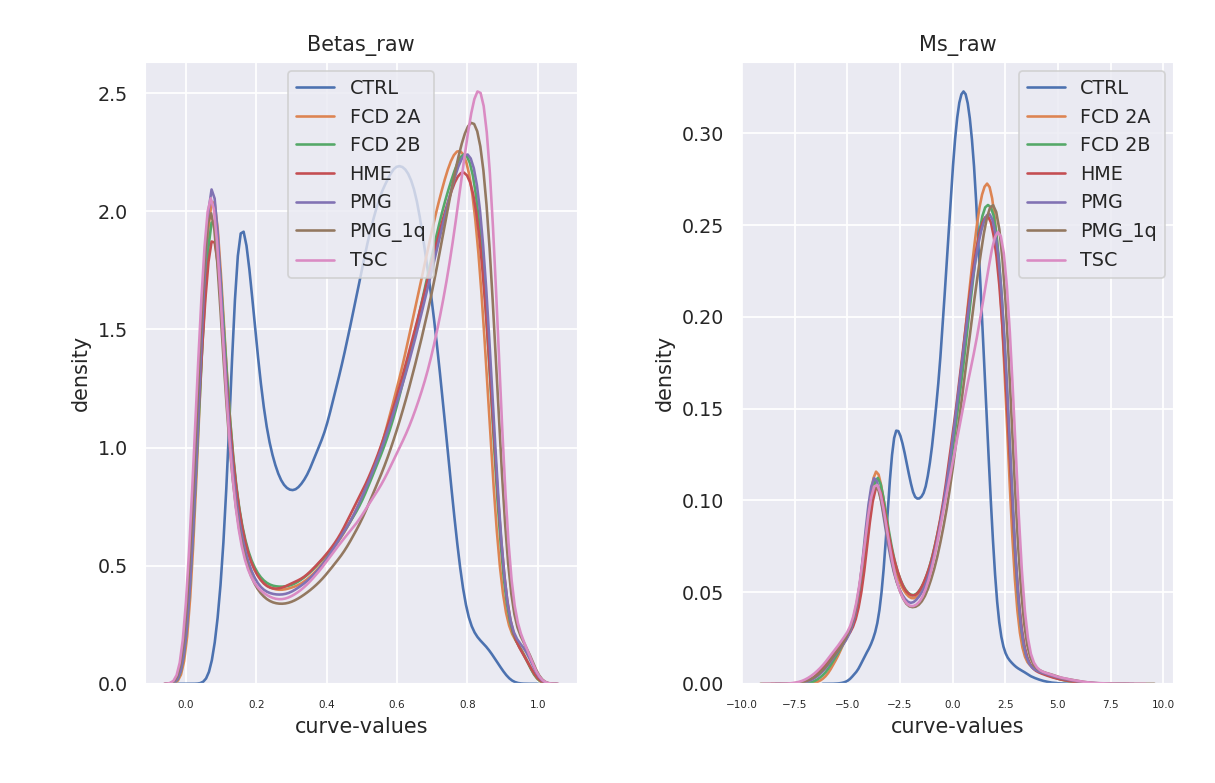

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [36]:
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw}, variant="grouped", group_by='disease', nrows=1)

In [48]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

Loading BokehJS ...

## Normalizing data

In [7]:
GRset,pheno=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False, RGset=preproidat.RGset)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Mapping to genome.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessQuantile] Fixing outliers.


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[p

In [8]:
GRset, pheno =preproidat.preprocessFunnorm(celltype_adoption=True, use_cell_count2=False, nPCs=4, RGset=preproidat.RGset_orig)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:


Attaching package: ‘IlluminaHumanMethylation450kanno.ilmn12.hg19’



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

The following objects are masked from ‘package:IlluminaHumanMethylationEPICanno.ilm10b4.hg19’:

    Isla

In [16]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          8.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          4.0  /home/D

## Filtering of probes and samples 

### DNAmArray Pipeline

In [11]:
beta_py, mval_py, pheno_py=preproidat.DNAmArray_processing(GRset=GRset[0], RGset=preproidat.RGset_orig, filterXY=True, 
                                                           filterNoCG=False, excludeXreactiveprobes=False, dropSnPs=False, 
                                                           mask_probes=True, cutbead=3, zeropoint=True, what="both", 
                                                           ProbeCutoff=0.05, SampleCutoff=0.05, array_type='EPIC', 
                                                           badSampleCutoff=10, rm_badsamples=False, rm_badprobes=False,
                                                           detPFilter=False, detPcut=0.01, addQC=False, verbose=True, 
                                                           autoimpute=True, imputation_method="imputePCA")



 Now performing probefiltering on beadcount
Filtering on number of beads... 

On average
 
0.22
 
% of the probes (
 
1051815
 
) have number of beads below
 
3
 


Filtering on zero intensities... 

On average
 
0.006
 
% of the Type II probes (
 
723910
 
) have Red and/or Green intensity below 1 

On average
 
0.054
 
% of the Type I probes (
 
99908
 
), measured in Green channel, have intensity below 1 

On average
 
0.069
 
% of the Type I probes (
 
184454
 
), measured in Red channel, have intensity below 1 

Set filtered probes in Red and/or Green channels to NA... 

... done 
 
100
 
 out of 
 
292
 
 ... 

... done 
 
200
 
 out of 
 
292
 
 ... 


 Now performing reduce function
Calculate and filter on detection P-value... 

On average
 
4.35
 
% of the CpGs (
 
866091
 
) have detection P-value above the threshold 
 
0.01
 


Transform to 
 
both
 
-values... 

Set +/-Inf to +/-16... 

On average
 
0.25
 
% of the beta probes (
 
866091
 
) were set to NA in the probe fil

In [12]:
pheno_py

age_onset  age_surgery  \
0          0.0         13.0   
1          0.0         13.0   
2          0.0         49.0   
3          0.0         49.0   
4          0.0         49.0   
..         ...          ...   
247        0.0          1.0   
248        0.0          3.0   
249        0.0          1.0   
250        0.0          1.0   
251        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202931510124   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202931510124   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202931510124   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202931510124   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202939390010   
..                                                 ...            ...   
247  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
248  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
249  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
250  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
251  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0   Control - WM   UKER         frontal   
..        ...            ...            ...    ...             ...   
247       1.0            1-5         TSC na   Mara         frontal   
248       3.0            1-5         TSC na   Mara         frontal   
249       1.0            1-5         TSC na   Mara         frontal   
250       1.0            1-5         TSC na   Mara         frontal   
251       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx  ...        case_ID        disease           identifier  \
0           Cortex  ...  SN 173/09 III  Control - NCx  202931510124_R04C01   
1        Marklager  ...  SN 173/09 III   Control - WM  202931510124_R05C01   
2           Cortex  ...   SN 80/16 III  Control - NCx  202931510124_R06C01   
3        Marklager  ...   SN 80/16 III   Control - WM  202931510124_R07C01   
4        Marklager  ...     SN 80/16 I   Control - WM  202939390010_R06C01   
..             ...  ...            ...            ...                  ...   
247       gemischt  ...    1467/16 III            TSC  203220070086_R07C01   
248       gemischt  ...      1061/17 7            TSC  203220070086_R08C01   
249       gemischt  ...    1714/17 II2            TSC  203220070058_R01C01   
250       gemischt  ...     182/18 IV1            TSC  203220070058_R02C01   
251       gemischt  ...      1909/17 6            TSC  203220070058_R03C01   

                                    ID  \
0    Control - NCx.202931510124_R04C01   
1     Control - WM.202931510124_R05C01   
2    Control - NCx.202931510124_R06C01   
3     Control - WM.202931510124_R07C01   
4     Control - WM.202939390010_R06C01   
..                                 ...   
247            TSC.203220070086_R07C01   
248            TSC.203220070086_R08C01   
249            TSC.203220070058_R01C01   
250            TSC.203220070058_R02C01   
251            TSC.203220070058_R03C01   

                                             filenames       xMed       yMed  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  10.867429   9.204519   
1    /home/Deep_Learner/private/network/Methyl_Arra...  10.579595   9.044302   
2    /home/Deep_Learner/private/network/Methyl_Arra...  11.125829   9.248532   
3    /home/Deep_Learner/private/network/Methyl_Arra...  10.993844   9.014428   
4    /home/Deep_Learner/private/network/Methyl_Arra...  10.492354   8.41

In [13]:
mval_py#.isnull().sum()

Control - NCx.202931510124_R04C01  \
cg18478105                          -5.042791   
cg14361672                           2.027787   
cg01763666                           3.062732   
cg02115394                          -3.784222   
cg13417420                          -4.328839   
...                                       ...   
cg21822051                          -0.214073   
cg10615271                           0.673017   
cg16818145                           1.213037   
cg10633746                          -2.868292   
cg12623625                           0.855097   

            Control - WM.202931510124_R05C01  \
cg18478105                         -4.906382   
cg14361672                          1.181411   
cg01763666                          2.810595   
cg02115394                         -3.405891   
cg13417420                         -4.900580   
...                                      ...   
cg21822051                         -0.203062   
cg10615271                          0.654454   
cg16818145                          0.690585   
cg10633746                         -2.779371   
cg12623625                          1.205147   

            Control - NCx.202931510124_R06C01  \
cg18478105                          -5.259961   
cg14361672                           2.840402   
cg01763666                           3.629934   
cg02115394                          -4.113386   
cg13417420                          -4.405483   
...                                       ...   
cg21822051                           0.099228   
cg10615271                           0.818078   
cg16818145                           1.385122   
cg10633746                          -2.855609   
cg12623625                           1.390232   

            Control - WM.202931510124_R07C01  \
cg18478105                         -5.399178   
cg14361672                          3.253124   
cg01763666                          3.425629   
cg02115394                         -4.308728   
cg13417420                         -4.679281   
...                                      ...   
cg21822051                         -0.270530   
cg10615271                          1.031802   
cg16818145                          1.167481   
cg10633746                         -2.439635   
cg12623625                          1.614944   

            Control - WM.202939390010_R06C01  \
cg18478105                         -5.486211   
cg14361672                          3.185533   
cg01763666                          3.271874   
cg02115394                         -4.302989   
cg13417420                         -4.027110   
...                                      ...   
cg21822051                          0.765161   
cg10615271                          1.238510   
cg16818145                          1.804649   
cg10633746                         -1.181589   
cg12623625                          1.501146   

            Control - NCx.202939390010_R07C01  \
cg18478105                          -5.874645   
cg14361672                           2.755596   
cg01763666                           3.306766   
cg02115394                          -4.401271   
cg13417420                          -4.725284   
...                                       ...   
cg21822051                           1.151260   
cg10615271                           1.820053   
cg16818145                           1.748697   
cg10633746                          -3.354067   
cg12623625                           1.808790   

            Control - WM.202939390010_R08C01  \
cg18478105                         -6.348578   
cg14361672                          2.935942   
cg01763666                          3.171256   
cg02115394                         -4.970015   
cg13417420                         -4.855614   
...                                      ...   
cg21822051                          0.627217   
cg10615271                          1.542246   
cg16818145                          1.582694   
cg10633746                        

In [14]:
beta_py

Control - NCx.202931510124_R04C01  \
cg18478105                           0.029443   
cg14361672                           0.803064   
cg01763666                           0.893111   
cg02115394                           0.067671   
cg13417420                           0.047402   
...                                       ...   
cg21822051                           0.462972   
cg10615271                           0.614555   
cg16818145                           0.698636   
cg10633746                           0.120453   
cg12623625                           0.643986   

            Control - WM.202931510124_R05C01  \
cg18478105                          0.032269   
cg14361672                          0.694001   
cg01763666                          0.875245   
cg02115394                          0.086212   
cg13417420                          0.032395   
...                                      ...   
cg21822051                          0.464870   
cg10615271                          0.611503   
cg16818145                          0.617435   
cg10633746                          0.127137   
cg12623625                          0.697484   

            Control - NCx.202931510124_R06C01  \
cg18478105                           0.025433   
cg14361672                           0.877484   
cg01763666                           0.925261   
cg02115394                           0.054620   
cg13417420                           0.045060   
...                                       ...   
cg21822051                           0.517188   
cg10615271                           0.638082   
cg16818145                           0.723140   
cg10633746                           0.121387   
cg12623625                           0.723849   

            Control - WM.202931510124_R07C01  \
cg18478105                          0.023148   
cg14361672                          0.905072   
cg01763666                          0.914859   
cg02115394                          0.048036   
cg13417420                          0.037564   
...                                      ...   
cg21822051                          0.453258   
cg10615271                          0.671547   
cg16818145                          0.691947   
cg10633746                          0.155641   
cg12623625                          0.753876   

            Control - WM.202939390010_R06C01  \
cg18478105                          0.021822   
cg14361672                          0.900969   
cg01763666                          0.906183   
cg02115394                          0.048218   
cg13417420                          0.057792   
...                                      ...   
cg21822051                          0.629569   
cg10615271                          0.702341   
cg16818145                          0.777453   
cg10633746                          0.305973   
cg12623625                          0.738949   

            Control - NCx.202939390010_R07C01  \
cg18478105                           0.016758   
cg14361672                           0.871023   
cg01763666                           0.908219   
cg02115394                           0.045186   
cg13417420                           0.036428   
...                                       ...   
cg21822051                           0.689545   
cg10615271                           0.779295   
cg16818145                           0.770671   
cg10633746                           0.089085   
cg12623625                           0.777950   

            Control - WM.202939390010_R08C01  \
cg18478105                          0.012122   
cg14361672                          0.884427   
cg01763666                          0.900083   
cg02115394                          0.030920   
cg13417420                          0.033386   
...                                      ...   
cg21822051                          0.607008   
cg10615271                          0.744407   
cg16818145                          0.749705   
cg10633746                        

In [525]:
def plt_curves(matrix=None, pheno=None, variant="grouped", group_by=None, ncols=1):
        self=preproidat
        if pheno is None:
            pheno=self.pheno_orig_py
        import matplotlib.pyplot as plt
        import seaborn as sns
        import copy
        from seaborn import cubehelix_palette
        #fig, ax = plt.subplots()         
        from collections import OrderedDict
        import matplotlib.pyplot as plt
        from scipy.stats import gaussian_kde
        from sklearn.neighbors import KernelDensity
        import statsmodels.api as sm
        from bokeh.layouts import column, gridplot

        #cmap=sns.color_palette('muted') 
        val='FCD 1A'
        if type(matrix)==dict:
            #print('dict')
            if (variant=="grouped"):
                
                for i, (key, matr) in enumerate(matrix.items()):
                    #print(len(betas))  
                    
                    pheno=pheno[pheno['ID'].isin(matr.columns.to_numpy())]
                    matrix=copy.deepcopy(matr.transpose())
                    #group_list=pheno[group_by].unique().tolist()
                    #
                    
                    
                    X_transformed=pd.DataFrame(matrix)
                    X_transformed[group_by]=pheno[group_by].to_numpy()     
                    X_transformed['ID']=pheno['ID'].to_numpy() 
                    #X_transformed['y']= X_transformed[np.array(X_transfromed[group_by]==val)].mean() 
                    palette = d3['Category20'][len(X_transformed[group_by].unique())]
                    color_map = bmo.CategoricalColorMapper(factors=X_transformed[group_by].unique(),
                                   palette=palette)        
                    plot_list=[]     
                    output_notebook()
                    #for i,val in enumerate(X_transformed[group_by].tolist()):
                        
                        #print(val)
                    kde = sm.nonparametric.KDEUnivariate(matr.transpose()[np.array(X_transformed[group]==val)].to_numpy())
                        #print(matr.transpose()[np.array(X_transformed[group]==val)].to_numpy())
                    kde.fit()
                    print(len(kde.support))
                    print(len(X_transformed))
                        #X_transformed['x']= kde.support 
                        #X_transformed['y']= kde.density
                        #X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})
                        #X_transformed['x'] = np.linspace(X_transformed[np.array(X_transformed[group_by]==val)].min(), X_transformed[np.array(X_transformed[group_by]==val)].max(), 30)        
                    
                    keys=ColumnDataSource(X_transformed[X_transformed[group_by]==val])
                    plot_list.append(p.line(x=kde.support ,y= kde.density, line_width=4, alpha=0.7, legend_label=val))
                        
                    #p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")    
                    grid = gridplot(plot_list, ncols=ncols, plot_width=250, plot_height=250)
                    
                    import plotly.express as px
                    df = px.data.tips()
                    #fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
                                      # hover_data=df.columns)
                    
                    fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, colors='disease', 
                                             hover_data=df.columns, show_rug=False)
                    fig.show()
                    
                    #p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})
    
                        #sns.distplot(matr[np.array(pheno[group_by]==val)].mean(), label=val, hist=False)
                    #plt.xlabel('curve-values')
                    #plt.ylabel('density')
                    #plt.title(key)
                    #handles, labels = plt.gca().get_legend_handles_labels()
                    #by_label = OrderedDict(zip(labels, handles))
                    #plt.legend(by_label.values(), by_label.keys())
                #plt.tight_layout()    
                #plt.show()
                show(grid)
            elif(variant=="single"):
                for i, (key, matr) in enumerate(matrix.items()):
                    #print(len(betas))
                    pheno=pheno[pheno['ID'].isin(matr.columns.to_numpy())]
                    matr=copy.deepcopy(matr)
                    c=len(matrix)/nrows
                    if nrows >= 1:
                        ind=i+1                        
                    plt.subplot(nrows, c, ind)
                    if nrows > 1:
                        if ind==nrows:
                            ind=0                      
                    #print(matr)
                    #label=val,    
                    #print(len(matr.columns))
                    colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','yellow','#070d0d', '#8ffe09']

                    colordict={}
                    for items, values in zip(pheno[group_by].unique().tolist(), colors):
                        colordict[items]=values
                                        
                    for col in matr.columns:
                        #print(pheno[group_by][pheno['ID']==col].to_numpy())
                        label=pheno[group_by][pheno['ID']==col].to_numpy()[0]
                        #print(matr[col])
                        if len(matr.columns) <= 30:
                            sns.distplot(
                                matr[col], hist=False, rug=False, label=label,
                                color=colordict[label])
                        else:
                            sns.distplot(
                                matr[col], hist=False, rug=False,label=label, color=colordict[label])
                    #sns.distplot(matr.to_numpy(),  hist=False)
                    plt.xlabel('curve-values')
                    plt.ylabel('density')
                    plt.title(key)
                    handles, labels = plt.gca().get_legend_handles_labels()
                    by_label = OrderedDict(zip(labels, handles))
                    plt.legend(by_label.values(), by_label.keys())
                #plt.legend()   
                plt.tight_layout()
                plt.show()
                
                
        else:
            print('Please provide dataframes in key value dict manner, where the key is the label of the plot and the values is the ' 
                  'dataframe')

In [465]:
mval_py.transpose()[np.array(X_transformed[group]=='FCD 1A')].to_numpy()

array([[-5.40514679,  2.95838262,  3.17201746, ...,  1.39882185,
        -3.2898554 ,  1.70490567],
       [-5.58137443,  0.29038277,  2.99162045, ...,  0.58358403,
        -2.95039952,  1.57093664],
       [-5.55825418,  3.28802813,  3.52811239, ...,  2.62282805,
        -2.57436661,  1.86716956],
       ...,
       [-5.40082858,  3.51854862,  3.546939  , ...,  1.57789925,
        -3.6914404 ,  1.07683231],
       [-5.08190009,  1.47119717,  3.59955194, ...,  1.52377884,
        -3.60492484,  0.6561914 ],
       [-5.18745477,  2.26585725,  3.21981859, ...,  1.04724366,
        -3.39893828,  1.2086335 ]])

In [462]:
mval_py.transpose()[np.array(pheno_py['disease']=='FCD 1A')].to_numpy()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [526]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', ncols=1)

Loading BokehJS ...

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



33554432
292


ValueError: Only LayoutDOM items can be inserted into a grid

In [524]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Pie: 'automargin'

    Valid properties:
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        direction
            Specifies the direction at which succeeding sectors
            follow one another.
        dlabel
            Sets the label step. See `label0` for more info.
        domain
            plotly.graph_objects.pie.Domain instance or dict with
            compatible properties
        hole
            Sets the fraction of the radius to cut out of the pie.
            Use this to make a donut chart.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objects.pie.Hoverlabel instance or dict
            with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available. variables `label`, `color`, `value`,
            `percent` and `text`. Anything contained in tag
            `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Sets hover text elements associated with each sector.
            If a single string, the same string appears for all
            data points. If an array of string, the items are
            mapped in order of this trace's sectors. To be seen,
            trace `hoverinfo` must contain a "text" flag.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        insidetextfont
            Sets the font used for `textinfo` lying inside the
            sector.
        label0
            Alternate to `labels`. Builds a numeric set of labels.
            Use with `dlabel` where `label0` is the starting label
            and `dlabel` the step.
        labels
            Sets the sector labels. If `labels` entries are
            duplicated, we sum associated `values` or simply count
            occurrences if `values` is not provided. For other
            array attributes (including color) we use the first
            non-empty entry among all occurrences of the label.
        labelssrc
            Sets the source reference on plot.ly for  labels .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            plotly.graph_objects.pie.Marker instance or dict with
            compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on plot.ly for  meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        outsidetextfont
            Sets the font used for `textinfo` lying outside the
            sector.
        pull
            Sets the fraction of larger radius to pull the sectors
            out from the center. This can be a constant to pull all
            slices apart from each other equally or an array to
            highlight one or more slices.
        pullsrc
            Sets the source reference on plot.ly for  pull .
        rotation
            Instead of the first slice starting at 12 o'clock,
            rotate to some other angle.
        scalegroup
            If there are multiple pie charts that should be sized
            according to their totals, link them by providing a
            non-empty group id here shared by every trace in the
            same group.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        sort
            Determines whether or not the sectors are reordered
            from largest to smallest.
        stream
            plotly.graph_objects.pie.Stream instance or dict with
            compatible properties
        text
            Sets text elements associated with each sector. If
            trace `textinfo` contains a "text" flag, these elements
            will be seen on the chart. If trace `hoverinfo`
            contains a "text" flag and "hovertext" is not set,
            these elements will be seen in the hover labels.
        textfont
            Sets the font used for `textinfo`.
        textinfo
            Determines which trace information appear on the graph.
        textposition
            Specifies the location of the `textinfo`.
        textpositionsrc
            Sets the source reference on plot.ly for  textposition
            .
        textsrc
            Sets the source reference on plot.ly for  text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available. variables `label`,
            `color`, `value`, `percent` and `text`.
        texttemplatesrc
            Sets the source reference on plot.ly for  texttemplate
            .
        title
            plotly.graph_objects.pie.Title instance or dict with
            compatible properties
        titlefont
            Deprecated: Please use pie.title.font instead. Sets the
            font used for `title`. Note that the title's font used
            to be set by the now deprecated `titlefont` attribute.
        titleposition
            Deprecated: Please use pie.title.position instead.
            Specifies the location of the `title`. Note that the
            title's position used to be set by the now deprecated
            `titleposition` attribute.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        values
            Sets the values of the sectors. If omitted, we count
            occurrences of each label.
        valuessrc
            Sets the source reference on plot.ly for  values .
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        

In [518]:
%matplotlib notebook
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm

#kde = sm.nonparametric.KDEUnivariate(mval_py.transpose()[np.array(X_transformed[group]=='FCD 1A')].to_numpy())
#kde.fit() # Estimate the densities
#kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(mval_py.transpose()[np.array(X_transformed[group]=='FCD 1A')].to_numpy())
#kde=KernelDensity(
#print(kde.pdf)
kde=gaussian_kde(mval_py.transpose()[np.array(X_transformed[group]=='FCD 1A')].to_numpy())
#fig = plt.figure(figsize=(12, 5))
#ax = fig.add_subplot(111)
#ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)
#log_pdf = kde.score_samples((mval_py.transpose()[np.array(X_transformed[group]=='FCD 1A')].to_numpy()))
dir(kde)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compute_covariance',
 '_data_covariance',
 '_data_inv_cov',
 '_neff',
 '_norm_factor',
 '_weights',
 'covariance',
 'covariance_factor',
 'd',
 'dataset',
 'evaluate',
 'factor',
 'integrate_box',
 'integrate_box_1d',
 'integrate_gaussian',
 'integrate_kde',
 'inv_cov',
 'logpdf',
 'n',
 'neff',
 'pdf',
 'resample',
 'scotts_factor',
 'set_bandwidth',
 'silverman_factor',
 'weights']

In [238]:
%matplotlib notebook
plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

Loading BokehJS ...

In [17]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_py
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      #metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



UMAP done! Time elapsed: 9.80433464050293 seconds


In [18]:
embedding.shape

(252, 2)

In [22]:
pheno_py[group].unique()

array(['Control - NCx', 'Control - WM', 'FCD 1A', 'FCD 2A', 'FCD 2B',
       'FCD 3A', 'FCD 3B', 'FCD 3C', 'FCD 3D', 'HME', 'mMCD', 'MOGHE',
       'PMG', 'PMG_1q', 'TLE/CTRL', 'TSC'], dtype=object)

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.palettes import d3
import bokeh.models as bmo

group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})


output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed['disease'].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed['disease'].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():
    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)

Loading BokehJS ...

<IPython.core.display.Javascript object>


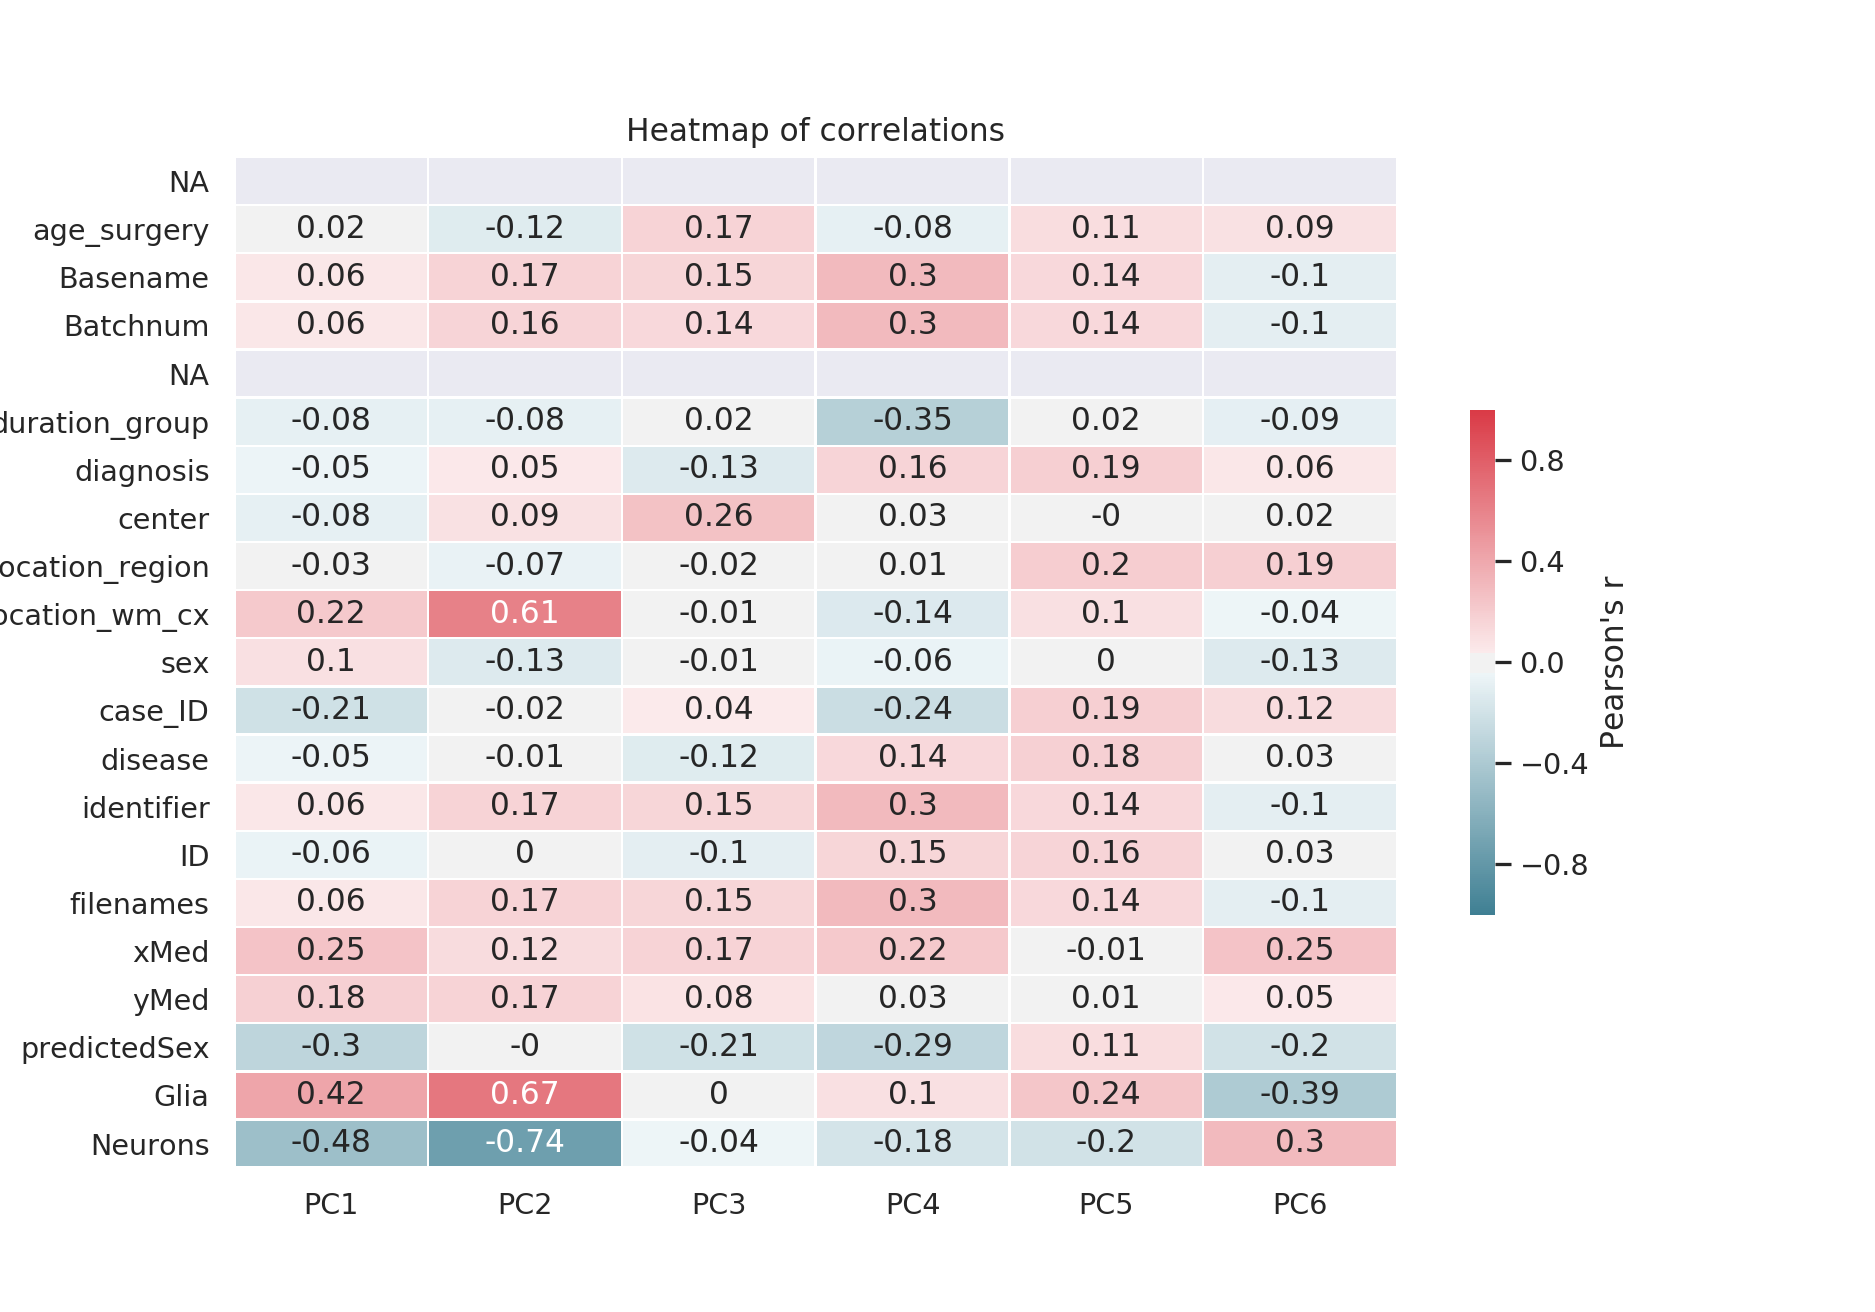

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [23]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [ ]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['Glia','location_wm_cx'],#'yMed','xMed','Batchnum',
                      ##correction_vars=['location_wm_cx'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=10, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'Control - NCx-Control - WM', 2: 'Control - NCx-FCD 1A', 3: 'Control - NCx-FCD 2A', 4: 'Control - NCx-FCD 2B', 5: 'Control - NCx-FCD 3A', 6: 'Control - NCx-FCD 3B', 7: 'Control - NCx-FCD 3C', 8: 'Control - NCx-FCD 3D', 9: 'Control - NCx-HME', 10: 'Control - NCx-mMCD', 11: 'Control - NCx-MOGHE', 12: 'Control - NCx-PMG', 13: 'Control - NCx-PMG_1q', 14: 'Control - NCx-TLE/CTRL', 15: 'Control - NCx-TSC', 16: 'Control - WM-FCD 1A', 17: 'Control - WM-FCD 2A', 18: 'Control - WM-FCD 2B', 19: 'Control - WM-FCD 3A', 20: 'Control - WM-FCD 3B', 21: 'Control - WM-FCD 3C', 22: 'Control - WM-FCD 3D', 23: 'Control - WM-HME', 24: 'Control - WM-mMCD', 25: 'Control - WM-MOGHE', 26: 'Control - WM-PMG', 27: 'Control - WM-PMG_1q', 28: 'Control - WM-TLE/CTRL', 29: 'Control - WM-TSC', 30: 'FCD 1A-FCD 2A', 31: 'FCD 1A-FCD 2B', 32: 'FCD 1A-FCD 3A', 33: 'FCD 1A-FCD 3B', 34: 'FCD 1A-FCD 3C', 35: 'FCD 1A-FCD 3D', 36: 'FCD 1A-HME', 37: 'FCD 1A-mMCD',

In [59]:
#preproidat.dmps_list[0]['Relation_to_Island'].unique()

In [429]:
preproidat.dectest

diseaseControl...NCx-diseaseControl...WM  \
Down                                      5498.0   
NotSig                                  560629.0   
Up                                       13408.0   

        diseaseControl...NCx-diseaseFCD.1A  \
Down                                1404.0   
NotSig                            571489.0   
Up                                  6642.0   

        diseaseControl...NCx-diseaseFCD.2A  \
Down                                3032.0   
NotSig                            567796.0   
Up                                  8707.0   

        diseaseControl...NCx-diseaseFCD.2B  \
Down                                3256.0   
NotSig                            562195.0   
Up                                 14084.0   

        diseaseControl...NCx-diseaseFCD.3A  \
Down                                6841.0   
NotSig                            567811.0   
Up                                  4883.0   

        diseaseControl...NCx-diseaseFCD.3B  \
Down                                7192.0   
NotSig                            528690.0   
Up                                 43653.0   

        diseaseControl...NCx-diseaseFCD.3C  \
Down                                1210.0   
NotSig                            575127.0   
Up                                  3198.0   

        diseaseControl...NCx-diseaseFCD.3D  diseaseControl...NCx-diseaseHME  \
Down                                2956.0                           1139.0   
NotSig                            570266.0                         571811.0   
Up                                  6313.0                           6585.0   

        diseaseControl...NCx-diseasemMCD  ...  diseaseMOGHE-diseasePMG  \
Down                              7286.0  ...                  25228.0   
NotSig                          535804.0  ...                 548881.0   
Up                               36445.0  ...                   5426.0   

        diseaseMOGHE-diseasePMG_1q  diseaseMOGHE-diseaseTLE.CTRL  \
Down                       17225.0                       43861.0   
NotSig                    561606.0                      493429.0   
Up                           704.0                       42245.0   

        diseaseMOGHE-diseaseTSC  diseasePMG-diseasePMG_1q  \
Down                    30893.0                     399.0   
NotSig                 499722.0                  579019.0   
Up                      48920.0                     117.0   

        diseasePMG-diseaseTLE.CTRL  diseasePMG-diseaseTSC  \
Down                        8785.0                12158.0   
NotSig                    555176.0               525028.0   
Up                         15574.0                42349.0   

        diseasePMG_1q-diseaseTLE.CTRL  diseasePMG_1q-diseaseTSC  \
Down                           1913.0                    2227.0   
NotSig                       565360.0                  546500.0   
Up                            12262.0                   30808.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       54918.0  
NotSig                    441949.0  
Up                         82668.0  

[3 rows x 120 columns]

In [430]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000
#mval_10000=preproidat.mval_py.loc[test]; mval_10000

Control - NCx.202931510124_R04C01  \
cg13608733                           2.257764   
cg16533362                          -0.289077   
cg20560075                          -4.843862   
cg19546063                           2.241961   
cg21298193                          -1.927763   
...                                       ...   
cg11906021                           2.041057   
cg01015663                           1.319348   
cg07353489                           3.093912   
cg00982641                           4.506001   
cg22700686                          -0.463054   

            Control - WM.202931510124_R05C01  \
cg13608733                         -2.420844   
cg16533362                         -3.841901   
cg20560075                         -3.707737   
cg19546063                          3.457752   
cg21298193                         -2.005242   
...                                      ...   
cg11906021                          1.470984   
cg01015663                          1.361174   
cg07353489                          3.446841   
cg00982641                          4.282887   
cg22700686                         -0.045890   

            Control - NCx.202931510124_R06C01  \
cg13608733                           2.697307   
cg16533362                          -0.021716   
cg20560075                          -5.385818   
cg19546063                           3.318845   
cg21298193                          -2.214541   
...                                       ...   
cg11906021                           2.289443   
cg01015663                           1.405900   
cg07353489                           2.933476   
cg00982641                           4.544997   
cg22700686                          -0.231163   

            Control - WM.202931510124_R07C01  \
cg13608733                         -1.004939   
cg16533362                         -3.207743   
cg20560075                         -1.981878   
cg19546063                          3.370179   
cg21298193                         -0.370798   
...                                      ...   
cg11906021                          1.638738   
cg01015663                          1.105634   
cg07353489                          3.471131   
cg00982641                          4.736598   
cg22700686                          0.204949   

            Control - WM.202939390010_R06C01  \
cg13608733                         -4.338099   
cg16533362                         -3.924451   
cg20560075                          0.904158   
cg19546063                          4.037654   
cg21298193                         -0.769453   
...                                      ...   
cg11906021                          0.891256   
cg01015663                          1.401070   
cg07353489                          3.361695   
cg00982641                          4.562980   
cg22700686                          0.003544   

            Control - NCx.202939390010_R07C01  \
cg13608733                           1.140796   
cg16533362                          -0.047635   
cg20560075                          -5.342700   
cg19546063                           1.806632   
cg21298193                          -2.850394   
...                                       ...   
cg11906021                           2.319962   
cg01015663                          -0.094532   
cg07353489                           3.680248   
cg00982641                           5.116563   
cg22700686                           0.398157   

            Control - WM.202939390010_R08C01  \
cg13608733                         -5.055295   
cg16533362                         -4.741157   
cg20560075                         -2.018762   
cg19546063                          4.080909   
cg21298193                         -0.037649   
...                                      ...   
cg11906021                         -0.001610   
cg01015663                          1.008339   
cg07353489                          3.284157   
cg00982641                        

In [431]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000
#beta_10000=preproidat.beta_py.loc[test];beta_10000

Control - NCx.202931510124_R04C01  \
cg13608733                           0.827064   
cg16533362                           0.450074   
cg20560075                           0.033650   
cg19546063                           0.825492   
cg21298193                           0.208132   
...                                       ...   
cg11906021                           0.804514   
cg01015663                           0.713921   
cg07353489                           0.895157   
cg00982641                           0.957845   
cg22700686                           0.420441   

            Control - WM.202931510124_R05C01  \
cg13608733                          0.157360   
cg16533362                          0.065192   
cg20560075                          0.071094   
cg19546063                          0.916578   
cg21298193                          0.199419   
...                                      ...   
cg11906021                          0.734896   
cg01015663                          0.719805   
cg07353489                          0.915998   
cg00982641                          0.951139   
cg22700686                          0.492049   

            Control - NCx.202931510124_R06C01  \
cg13608733                           0.866416   
cg16533362                           0.496237   
cg20560075                           0.023358   
cg19546063                           0.908914   
cg21298193                           0.177263   
...                                       ...   
cg11906021                           0.830182   
cg01015663                           0.726015   
cg07353489                           0.884252   
cg00982641                           0.958923   
cg22700686                           0.460028   

            Control - WM.202931510124_R07C01  \
cg13608733                          0.332573   
cg16533362                          0.097665   
cg20560075                          0.202017   
cg19546063                          0.911817   
cg21298193                          0.436097   
...                                      ...   
cg11906021                          0.756924   
cg01015663                          0.682734   
cg07353489                          0.917284   
cg00982641                          0.963847   
cg22700686                          0.535455   

            Control - WM.202939390010_R06C01  \
cg13608733                          0.047113   
cg16533362                          0.061791   
cg20560075                          0.651744   
cg19546063                          0.942605   
cg21298193                          0.369737   
...                                      ...   
cg11906021                          0.649712   
cg01015663                          0.725348   
cg07353489                          0.911343   
cg00982641                          0.959411   
cg22700686                          0.500614   

            Control - NCx.202939390010_R07C01  \
cg13608733                           0.687990   
cg16533362                           0.491746   
cg20560075                           0.024050   
cg19546063                           0.777691   
cg21298193                           0.121773   
...                                       ...   
cg11906021                           0.833144   
cg01015663                           0.483625   
cg07353489                           0.927638   
cg00982641                           0.971983   
cg22700686                           0.568561   

            Control - WM.202939390010_R08C01  \
cg13608733                          0.029197   
cg16533362                          0.036044   
cg20560075                          0.197927   
cg19546063                          0.944206   
cg21298193                          0.493476   
...                                      ...   
cg11906021                          0.499721   
cg01015663                          0.667950   
cg07353489                          0.906904   
cg00982641                        

In [432]:
####quantile
%matplotlib notebook
plt_mds(mval_10000, pheno_py, n_components=2, group='disease', components=(0,1)) 

Loading BokehJS ...

In [433]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



UMAP done! Time elapsed: 0.5104093551635742 seconds


In [434]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'
case_ID='case_ID'
X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
X_transformed['case_ID']=pheno_py['case_ID'].to_numpy()
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})

#colordict={}
#for items, values in zip(X_transformed[group].unique().tolist(), colors):
#    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group), ("Name", '@'+case_ID)]
p.title.text = 'UMAP Plot'
show(p)
   

Loading BokehJS ...

In [80]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed['disease']]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed['disease'].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed['disease'].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)
   

NameError: name 'colors' is not defined

In [561]:
from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import cubehelix_palette
sns.set()
def reduce_plot(data, labels, legend_title):
    np.random.seed(42)
    plt.figure(figsize=(8,8))
    t_data=pd.DataFrame(PCA(n_components=2).fit_transform(data),columns=['z1','z2'])
    t_data[legend_title]=labels
    sns.scatterplot('z1','z2',hue=legend_title, cmap=cubehelix_palette(as_cmap=True),data=t_data)

In [563]:
embedding

array([[ 13.921222  , -14.938957  ],
       [-28.084785  ,   7.6241503 ],
       [ 12.80588   , -13.4308605 ],
       [-22.253296  ,   5.2717495 ],
       [-31.653015  ,  11.517599  ],
       [ 10.064725  ,  -8.043977  ],
       [-32.591568  ,  10.841459  ],
       [ 10.170571  , -10.770108  ],
       [-31.833588  ,  10.671565  ],
       [-24.467257  ,   6.5583344 ],
       [ 16.200708  , -12.239733  ],
       [-20.264582  ,   6.6483307 ],
       [-25.792747  ,   8.99929   ],
       [ 14.349252  , -10.9241495 ],
       [-23.639812  ,   7.1635146 ],
       [ 13.311436  , -11.727705  ],
       [-22.494646  ,   8.130025  ],
       [-14.94258   , -18.554018  ],
       [-18.26723   , -22.506876  ],
       [-13.540355  , -20.263697  ],
       [-14.520936  , -21.58318   ],
       [ -9.62683   , -12.371289  ],
       [-13.182701  , -12.997008  ],
       [-13.137043  , -21.353735  ],
       [-12.791513  , -16.136925  ],
       [-11.494281  ,  -7.53515   ],
       [-12.806093  , -18.860645  ],
 

<IPython.core.display.Javascript object>


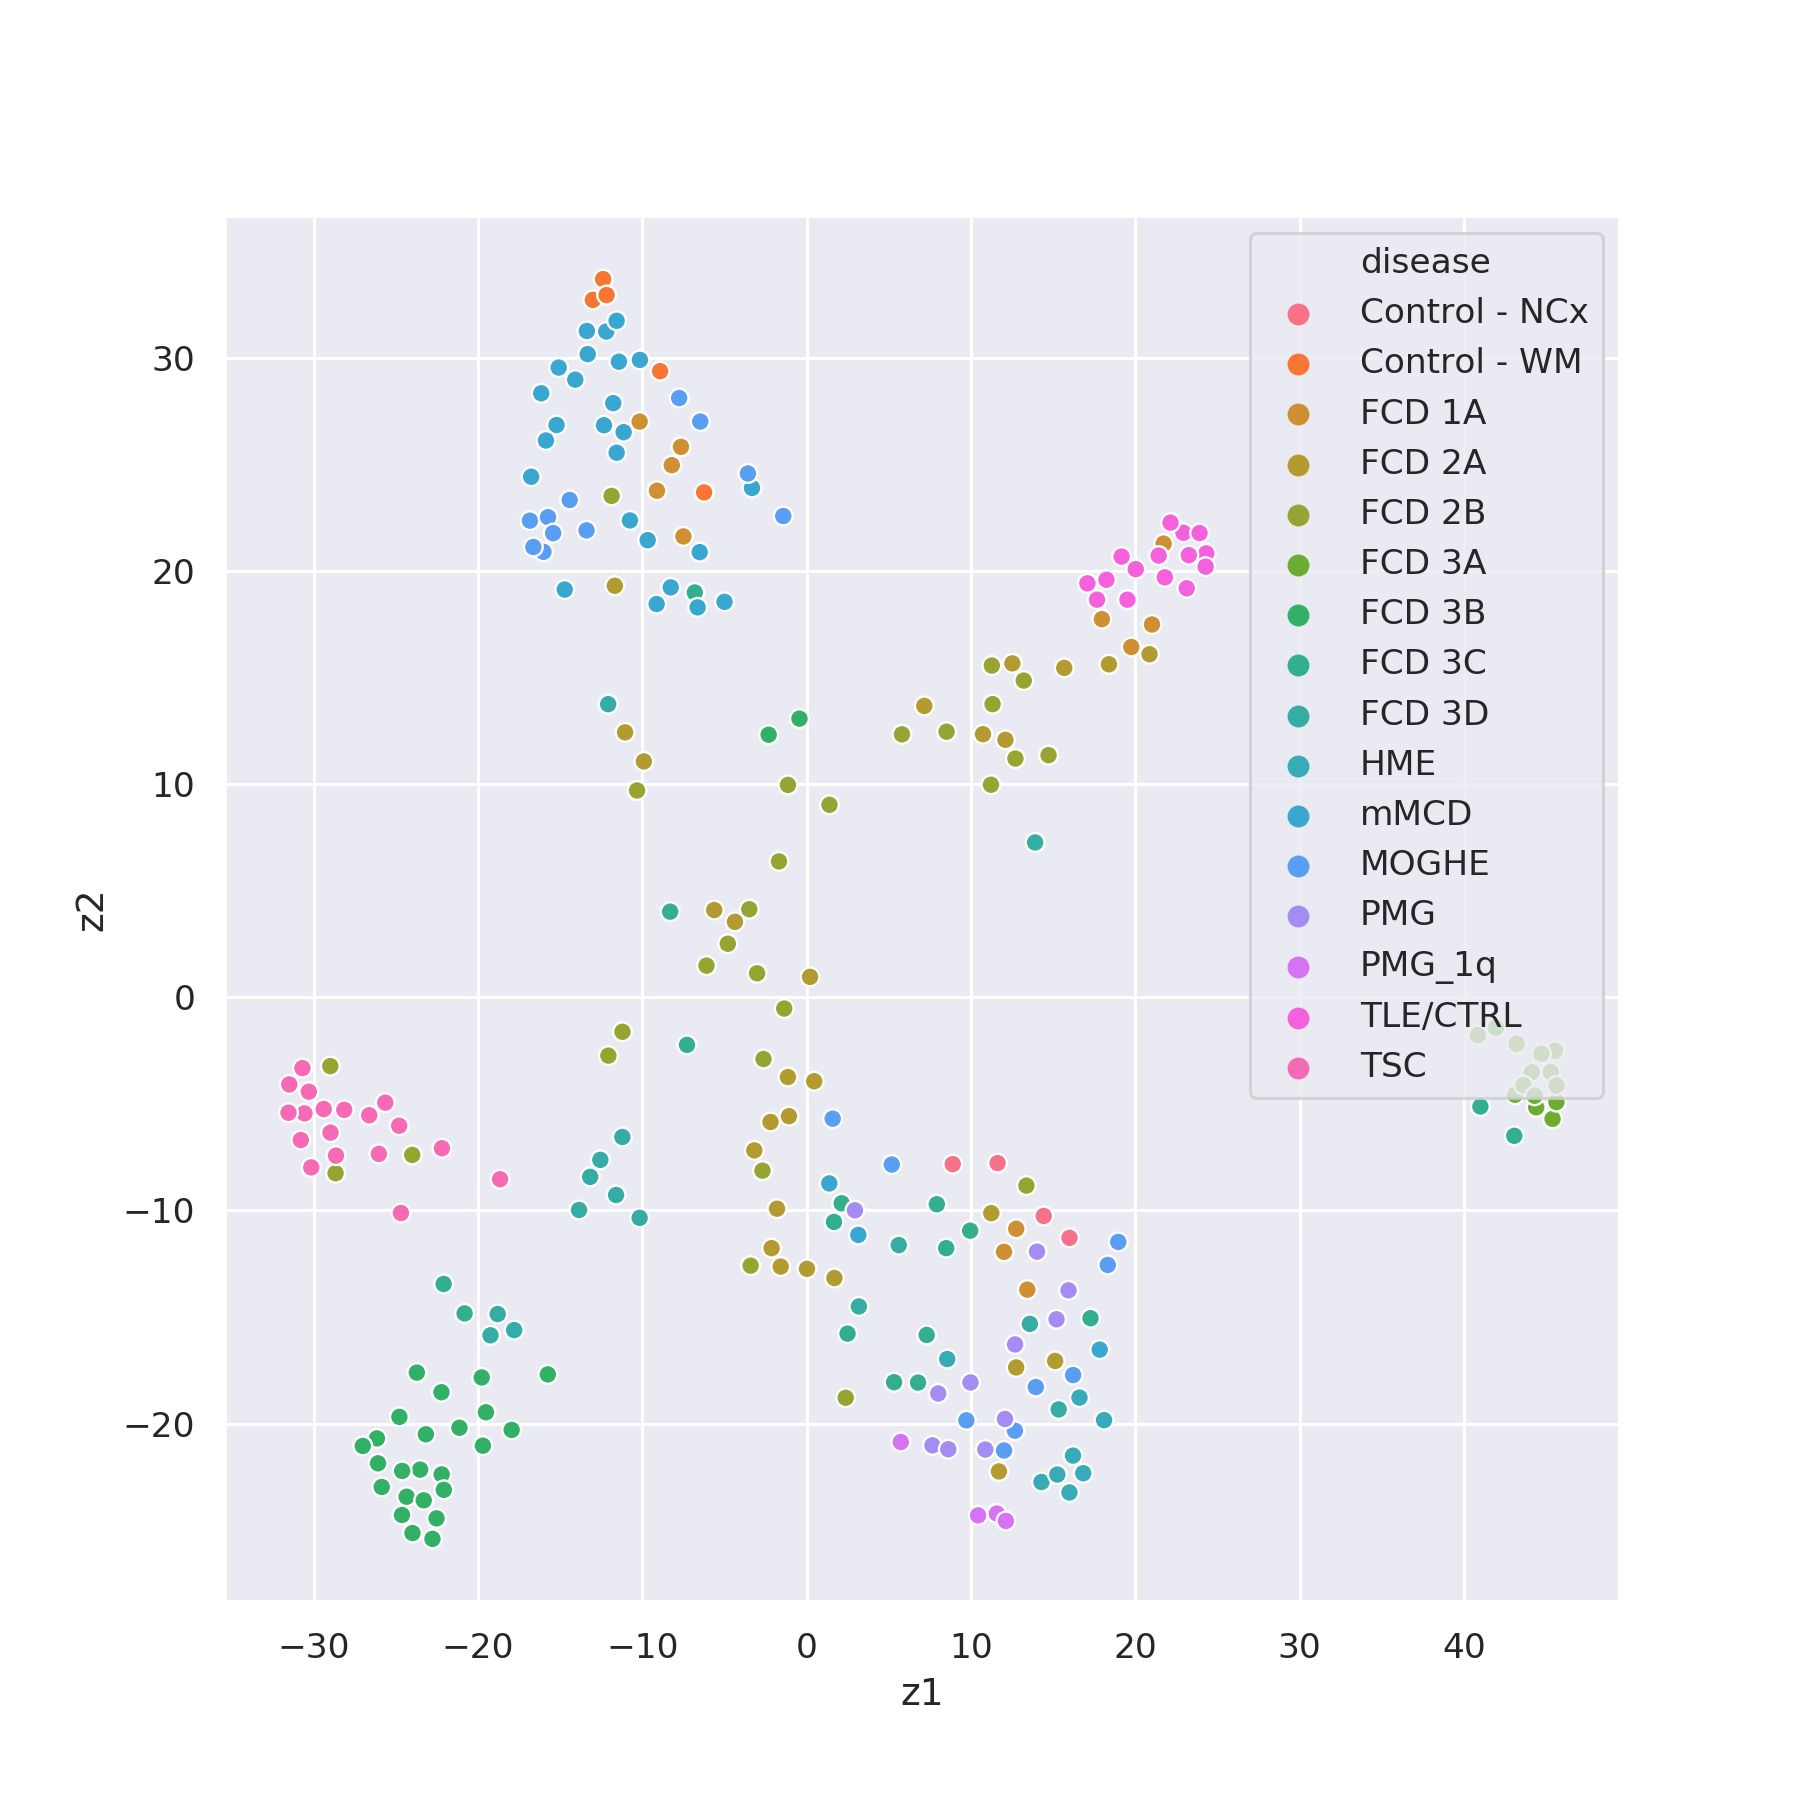

<IPython.core.display.Javascript object>


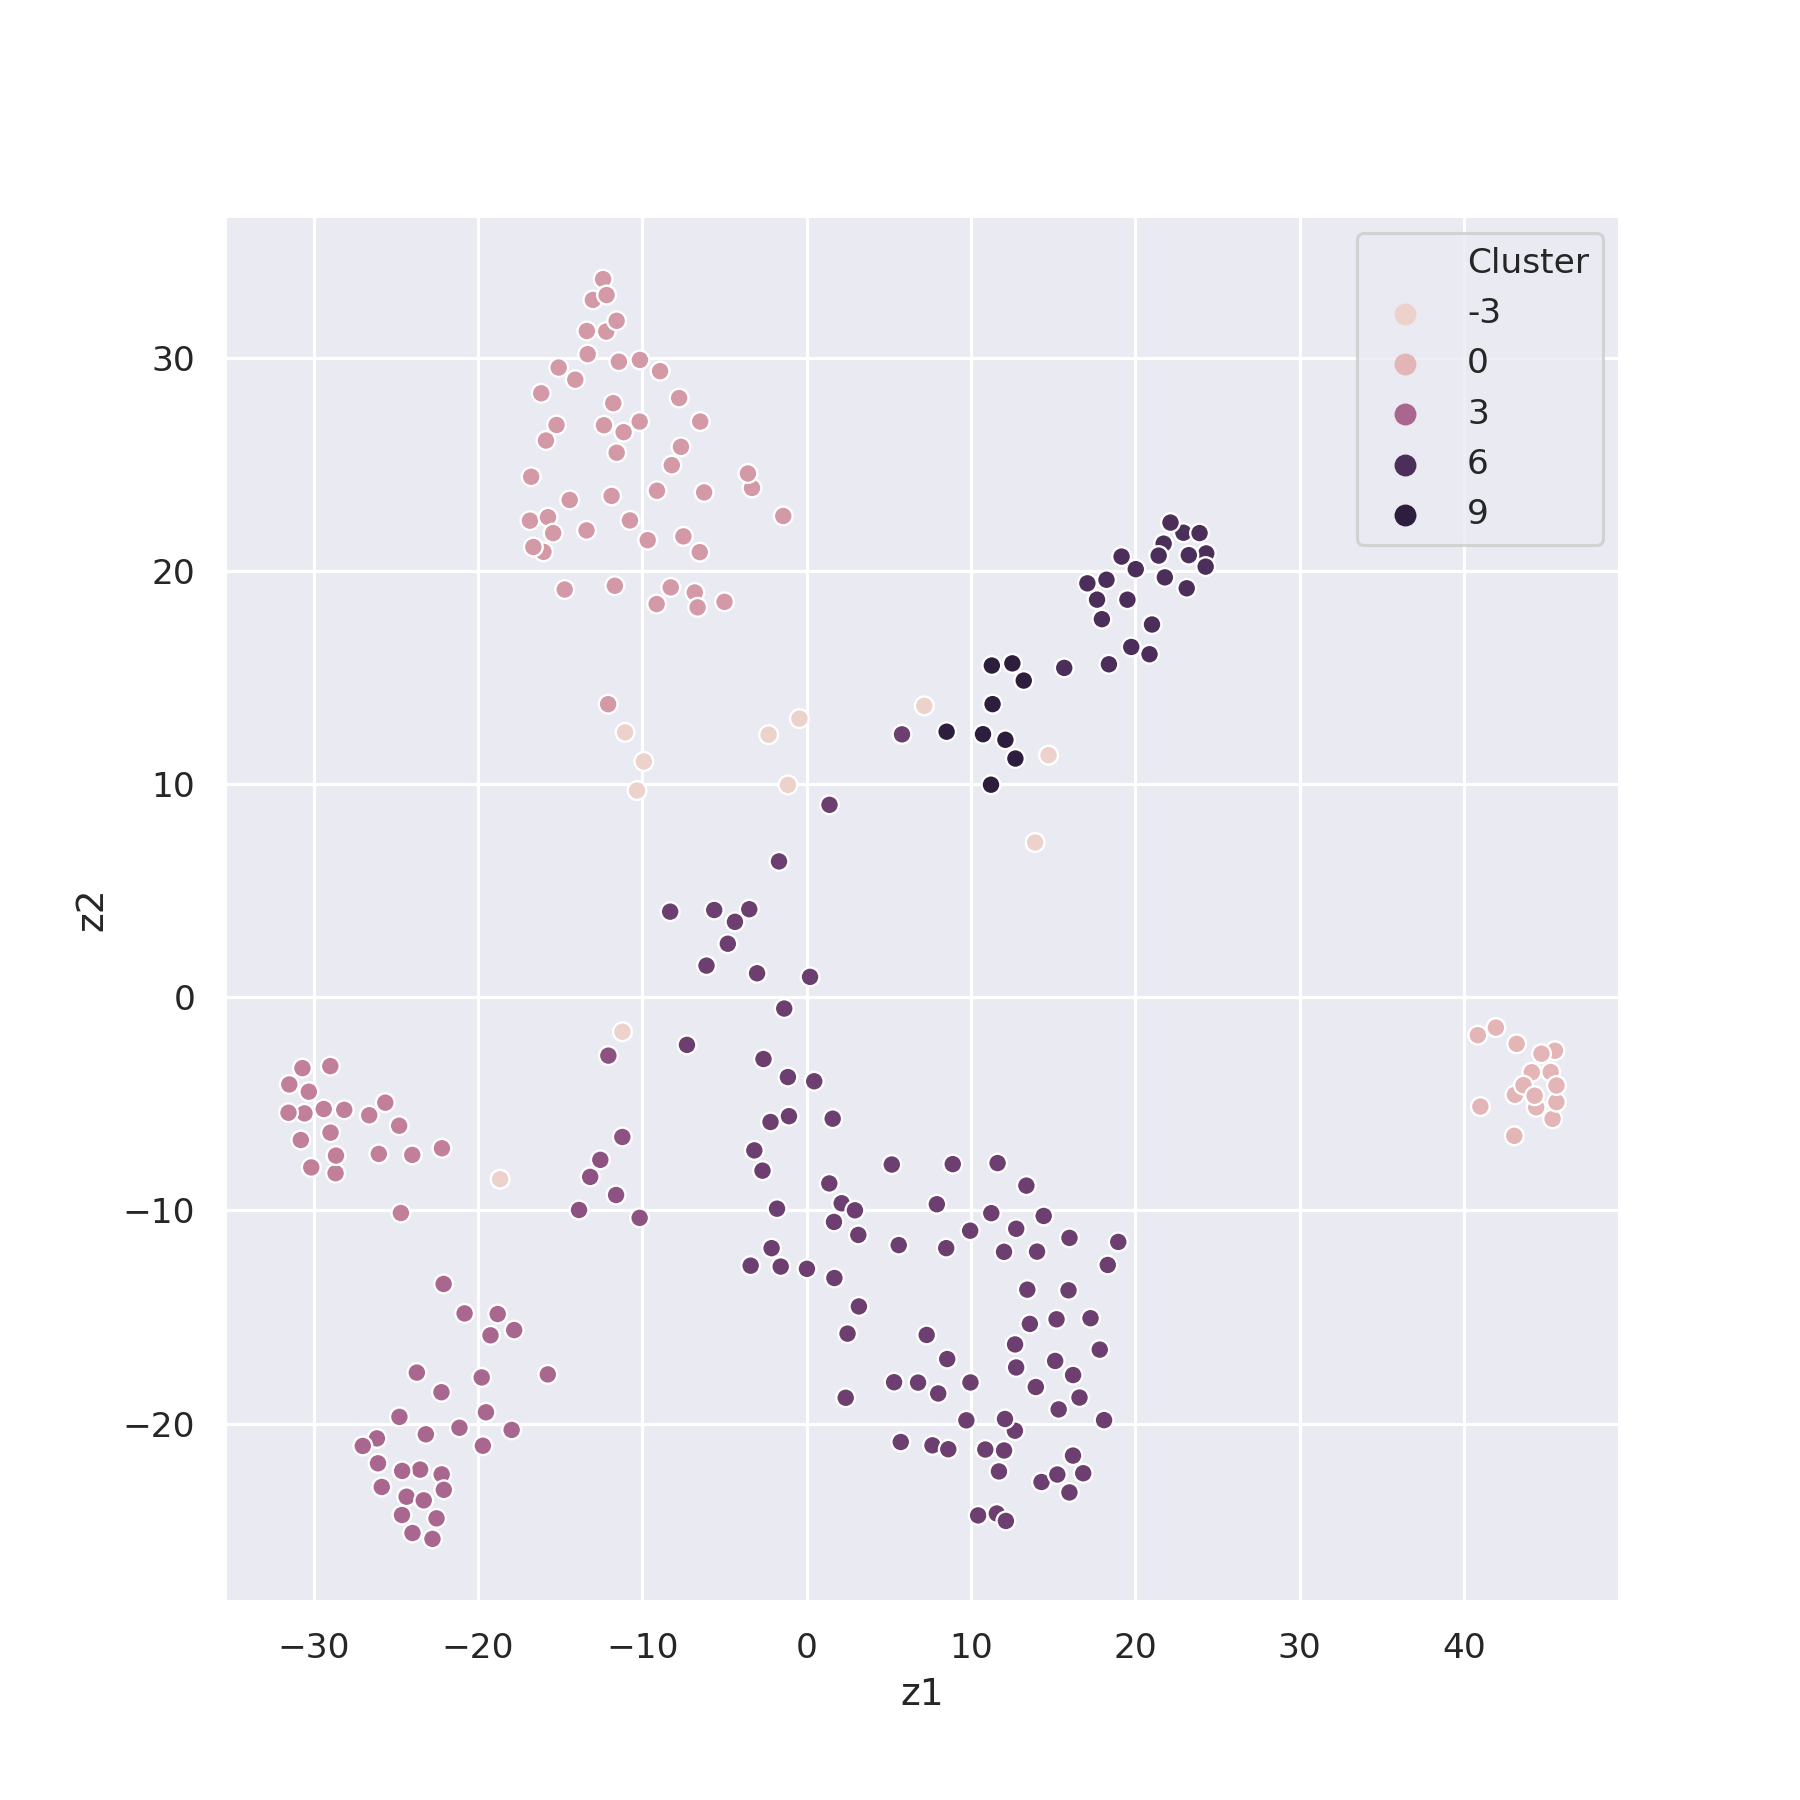

In [565]:
#mvalnoob_50000.transpose()
import hdbscan
from hdbscan import HDBSCAN
%matplotlib notebook
model = HDBSCAN(algorithm='best')
predicted_clusters = model.fit_predict(embedding.astype(np.float64))
reduce_plot(embedding, pheno_py['disease'].to_numpy(),'disease')
reduce_plot(embedding, predicted_clusters,'Cluster')

In [568]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=3,
).fit_predict(embedding)

<IPython.core.display.Javascript object>


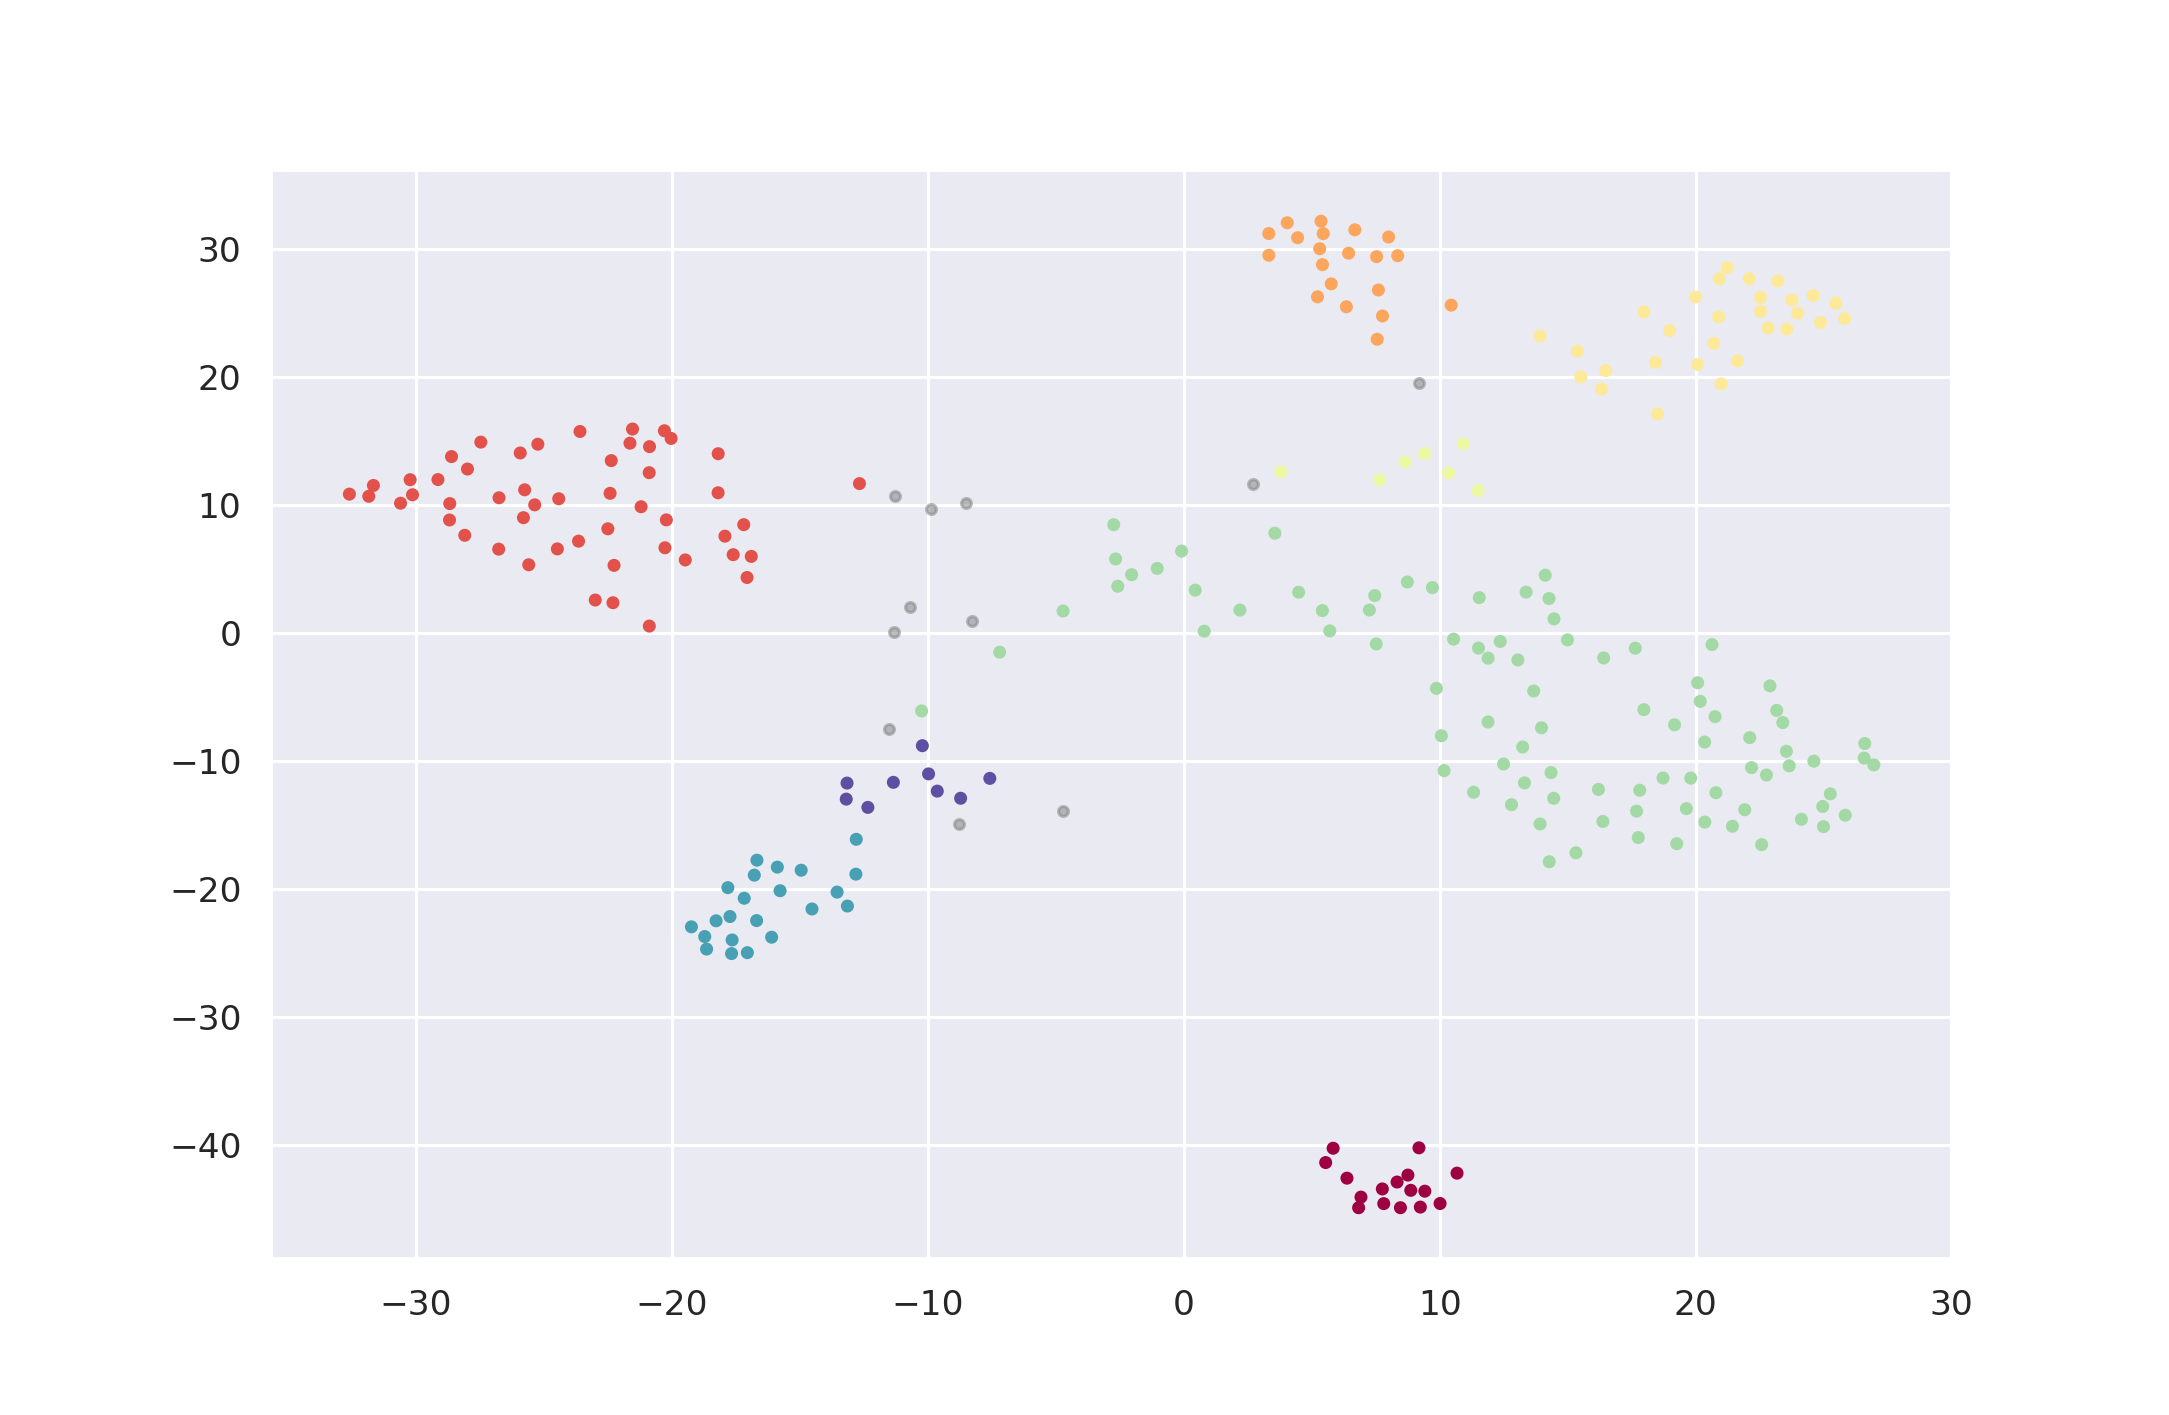

In [569]:
%matplotlib notebook
clustered = (labels >= 0)
plt.scatter(embedding[~clustered, 0],
            embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=10,
            alpha=0.5)
plt.scatter(embedding[clustered, 0],
            embedding[clustered, 1],
            c=labels[clustered],
            s=10,
            cmap='Spectral');

In [572]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(to_embed.transpose())
pca_df=pd.DataFrame(pca_result,)
print ('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)) )



Cumulative explained variation for 2 principal components: 0.4716997891374739


<IPython.core.display.Javascript object>


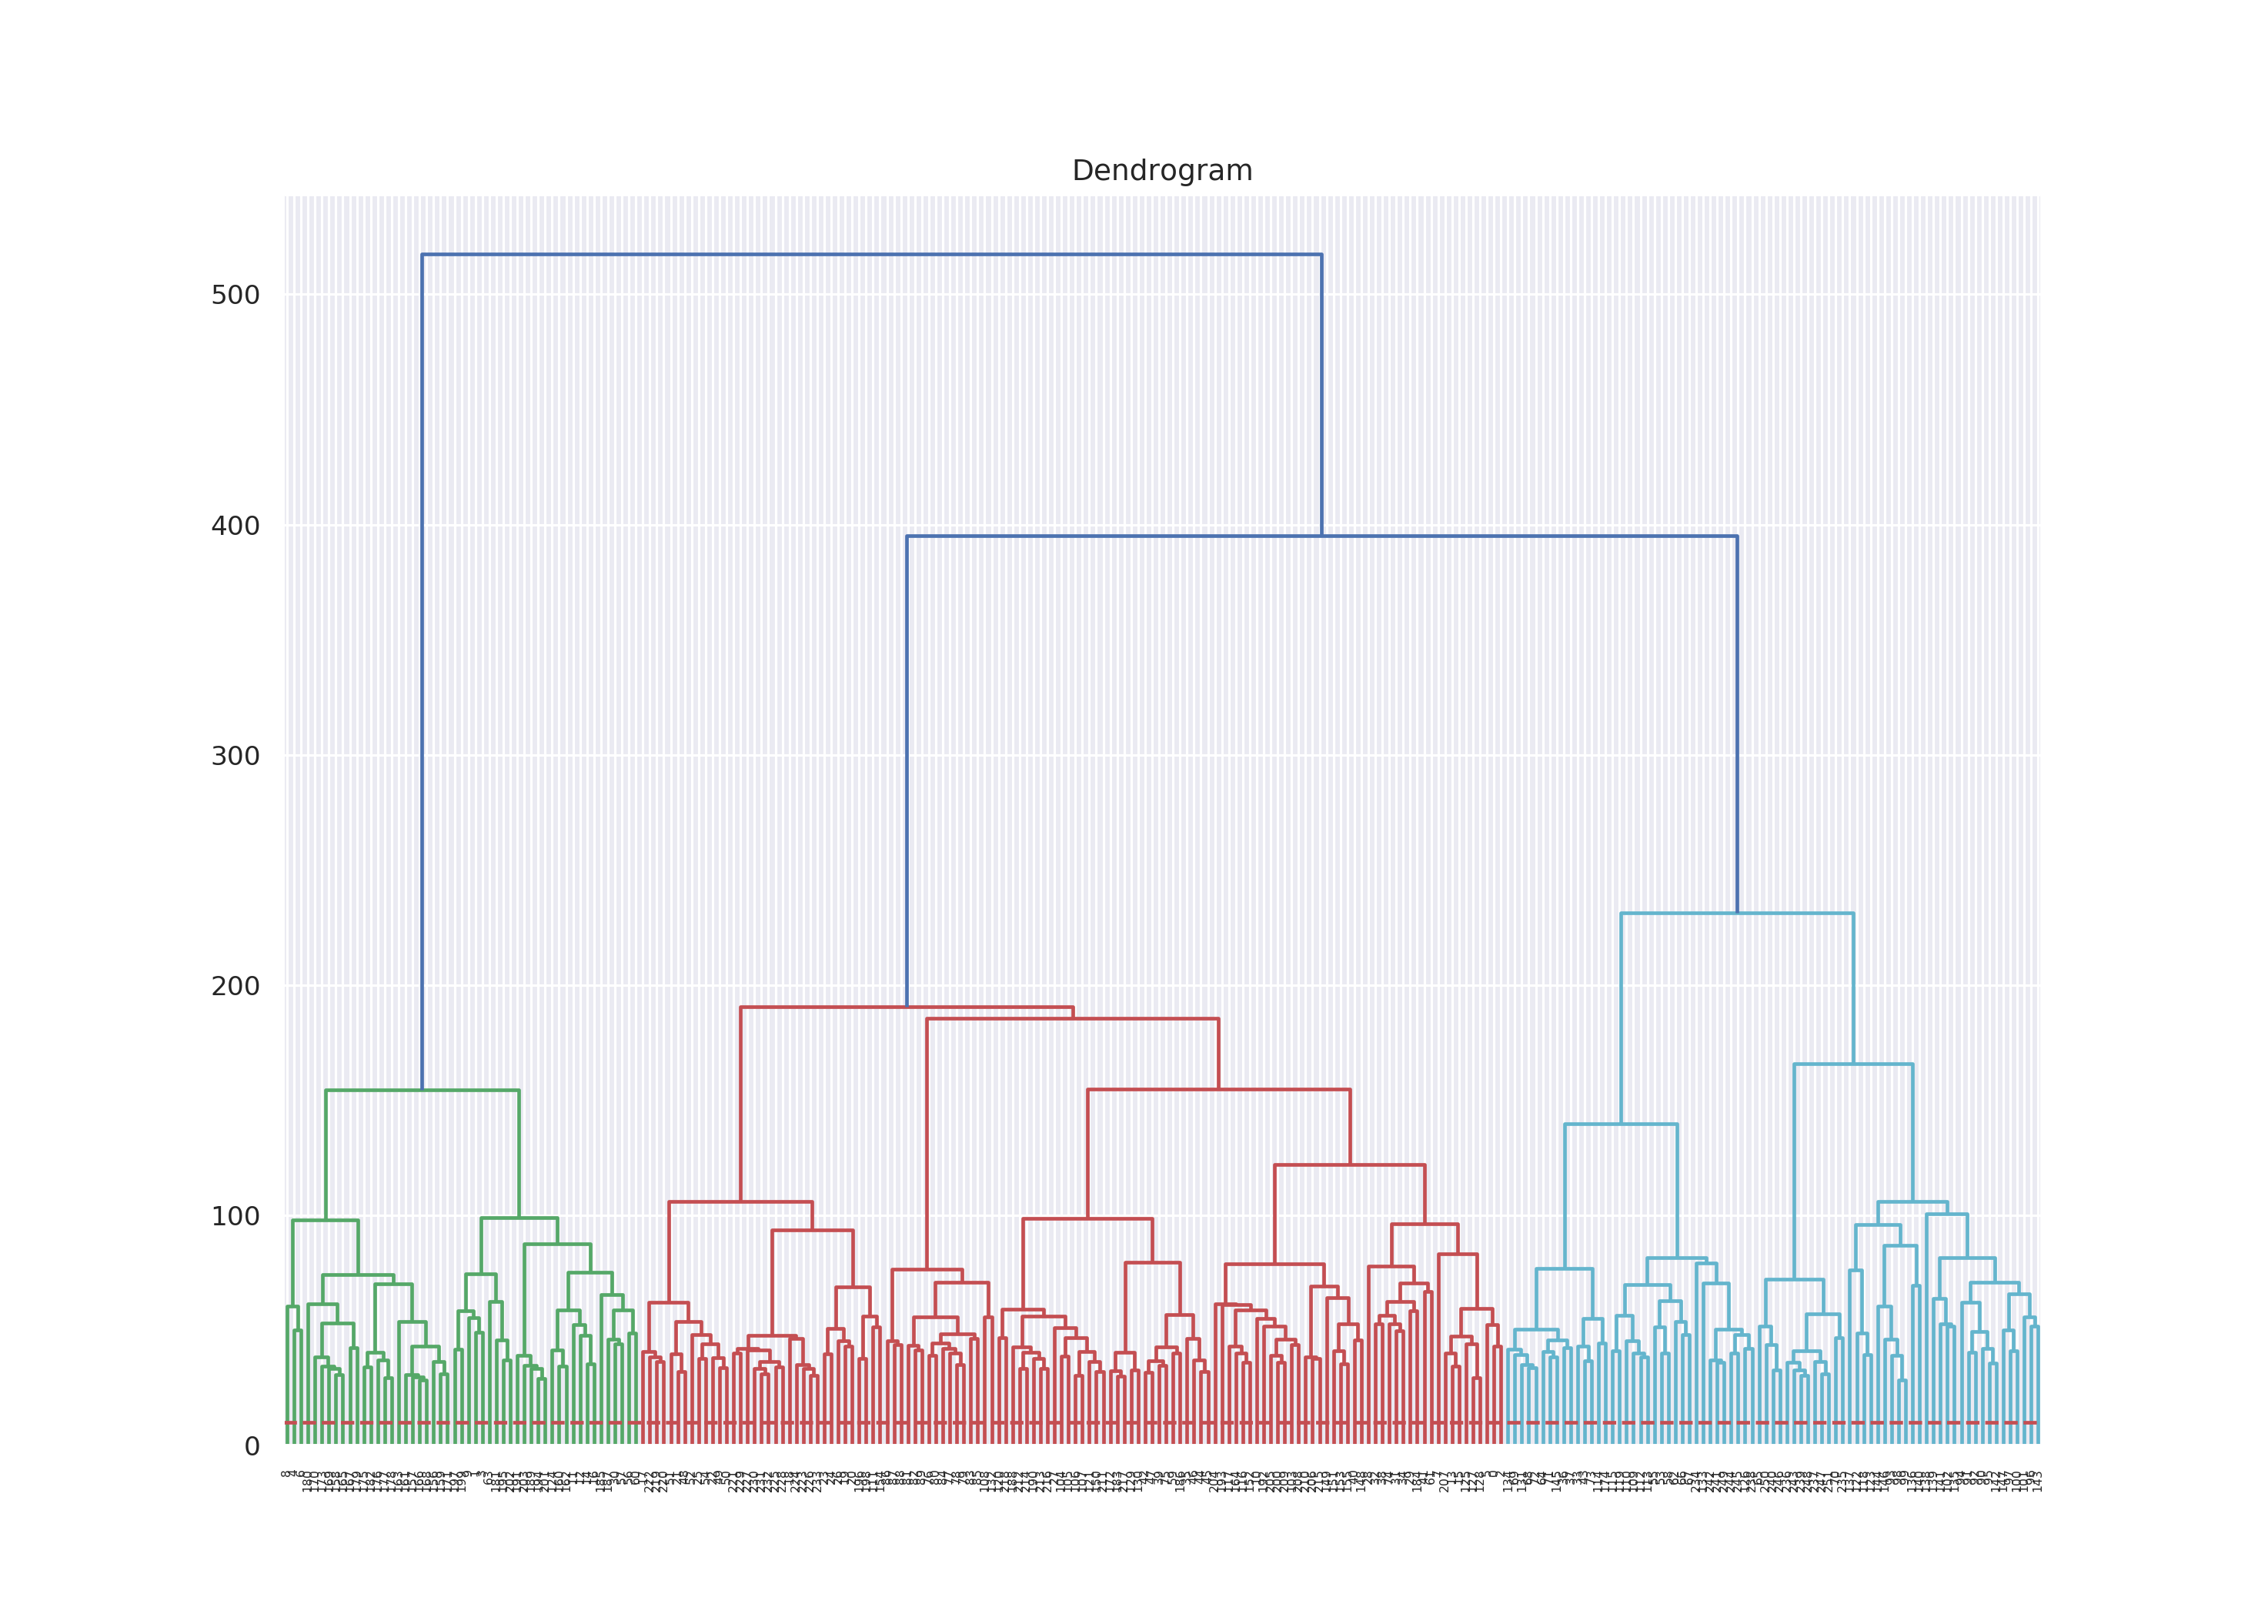

In [574]:
%matplotlib notebook
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(to_embed.transpose().to_numpy(), method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [576]:
betac=to_embed.transpose()#betaraw.transpose()#
betac
betac['disease']=pheno_py['disease'].to_numpy(); betac
betac=betac.set_index('disease').sort_index(); betac#index.tolist()#;betac

cg00290758  cg17291385  cg18286850  cg24960706  cg06758255  \
disease                                                                     
Control - NCx   -0.929024    1.143281   -0.989198    0.591336    0.647820   
Control - NCx   -1.189665    1.101751   -0.249793    0.645914    1.239018   
Control - NCx   -1.453724    0.555783   -0.910748    0.873484    0.115320   
Control - NCx   -0.862989    0.644643    0.583050    1.960602    0.301022   
Control - WM    -3.011793    2.325608   -2.312134   -1.622945   -2.021478   
...                   ...         ...         ...         ...         ...   
mMCD            -1.863520    1.825119   -1.869436    0.214991   -0.473958   
mMCD            -3.264627    2.378515   -2.178122   -0.540155   -2.536318   
mMCD            -2.487286    2.262894   -2.137946   -0.711206   -1.575960   
mMCD            -3.526476    2.617590   -2.678104   -0.818613   -2.473250   
mMCD            -2.211605    2.343909   -2.650612   -0.731612   -1.212163   

               cg22233757  cg26363759  cg06159394  cg09390001  cg11713310  \
disease                                                                     
Control - NCx    0.651081    0.514200   -0.752177   -0.050805    0.567208   
Control - NCx    0.822819    0.232687   -0.299200    0.176002    0.373214   
Control - NCx    0.587305    0.124806   -0.639629    0.056730    1.153384   
Control - NCx    1.287453    1.284609   -2.512179   -0.756364    0.831213   
Control - WM    -2.017002   -3.128054    1.930300    1.483564    2.652308   
...                   ...         ...         ...         ...         ...   
mMCD            -0.626379    0.229240    0.636390    0.890515    1.626853   
mMCD            -1.586626   -0.817292    1.193203    1.268465    2.435633   
mMCD            -1.198325   -0.664251    1.151793    1.923992    2.292869   
mMCD            -1.508674   -1.069493    1.855677    1.587342    2.167221   
mMCD            -2.421602   -0.647097    1.771366    1.960287    1.964269   

               ...  cg19229737  cg10695145  cg20533899  cg16238993  \
disease        ...                                                   
Control - NCx  ...   -0.058402   -0.719285    0.233410    0.088685   
Control - NCx  ...   -0.126053   -0.731984    0.696757   -0.026989   
Control - NCx  ...   -0.723427   -0.523491    0.133292   -0.082042   
Control - NCx  ...   -0.117858   -0.085501    1.093380   -0.416833   
Control - WM   ...   -0.034227   -0.143326   -0.293784    1.530732   
...            ...         ...         ...         ...         ...   
mMCD           ...   -0.827467   -0.666116   -0.511596   -0.200973   
mMCD           ...   -0.506190   -0.547123   -0.722521    0.743520   
mMCD           ...   -1.096653    0.024511   -0.769333    0.593246   
mMCD           ...   -0.479704   -0.233802   -1.108475    1.422749   
mMCD           ...   -0.756537   -0.374450   -1.282447    0.951763   

               cg27405731  cg09510077  cg12534813  cg11702456  cg23705098  \
disease                                                                     
Control - NCx    0.220200    0.396721    0.225884    0.842953    1.256425   
Control - NCx    0.190149    1.202406    0.717691    0.642190    0.977909   
Control - NCx    0.033831    0.882988    0.406948    0.189899    1.082199   
Control - NCx    0.460075    2.045433    0.639691    0.611483    0.697705   
Control - WM    -0.379531    0.346561    0.424121    0.486207    0.877652   
...                   ...         ...         ...         ...         ...   
mMCD            -0.232231    0.426342    0.207615   -0.286283    0.167737   
mMCD            -0.713617   -0.181531   -0.346810   -0.006844    0.204796   
mMCD            -0.925810   -0.484195    0.391448   -0.775808    0.599133   
mMCD            -0.265938   -0.310595    0.221610   -0.020597    0.919999   
mMCD            -1.269301    0.083740   -0.235201   -0.257248   -0.320404   

               cg06984463  
disease                    
Control - NCx    1.256403  
Control - NCx 

<IPython.core.display.Javascript object>


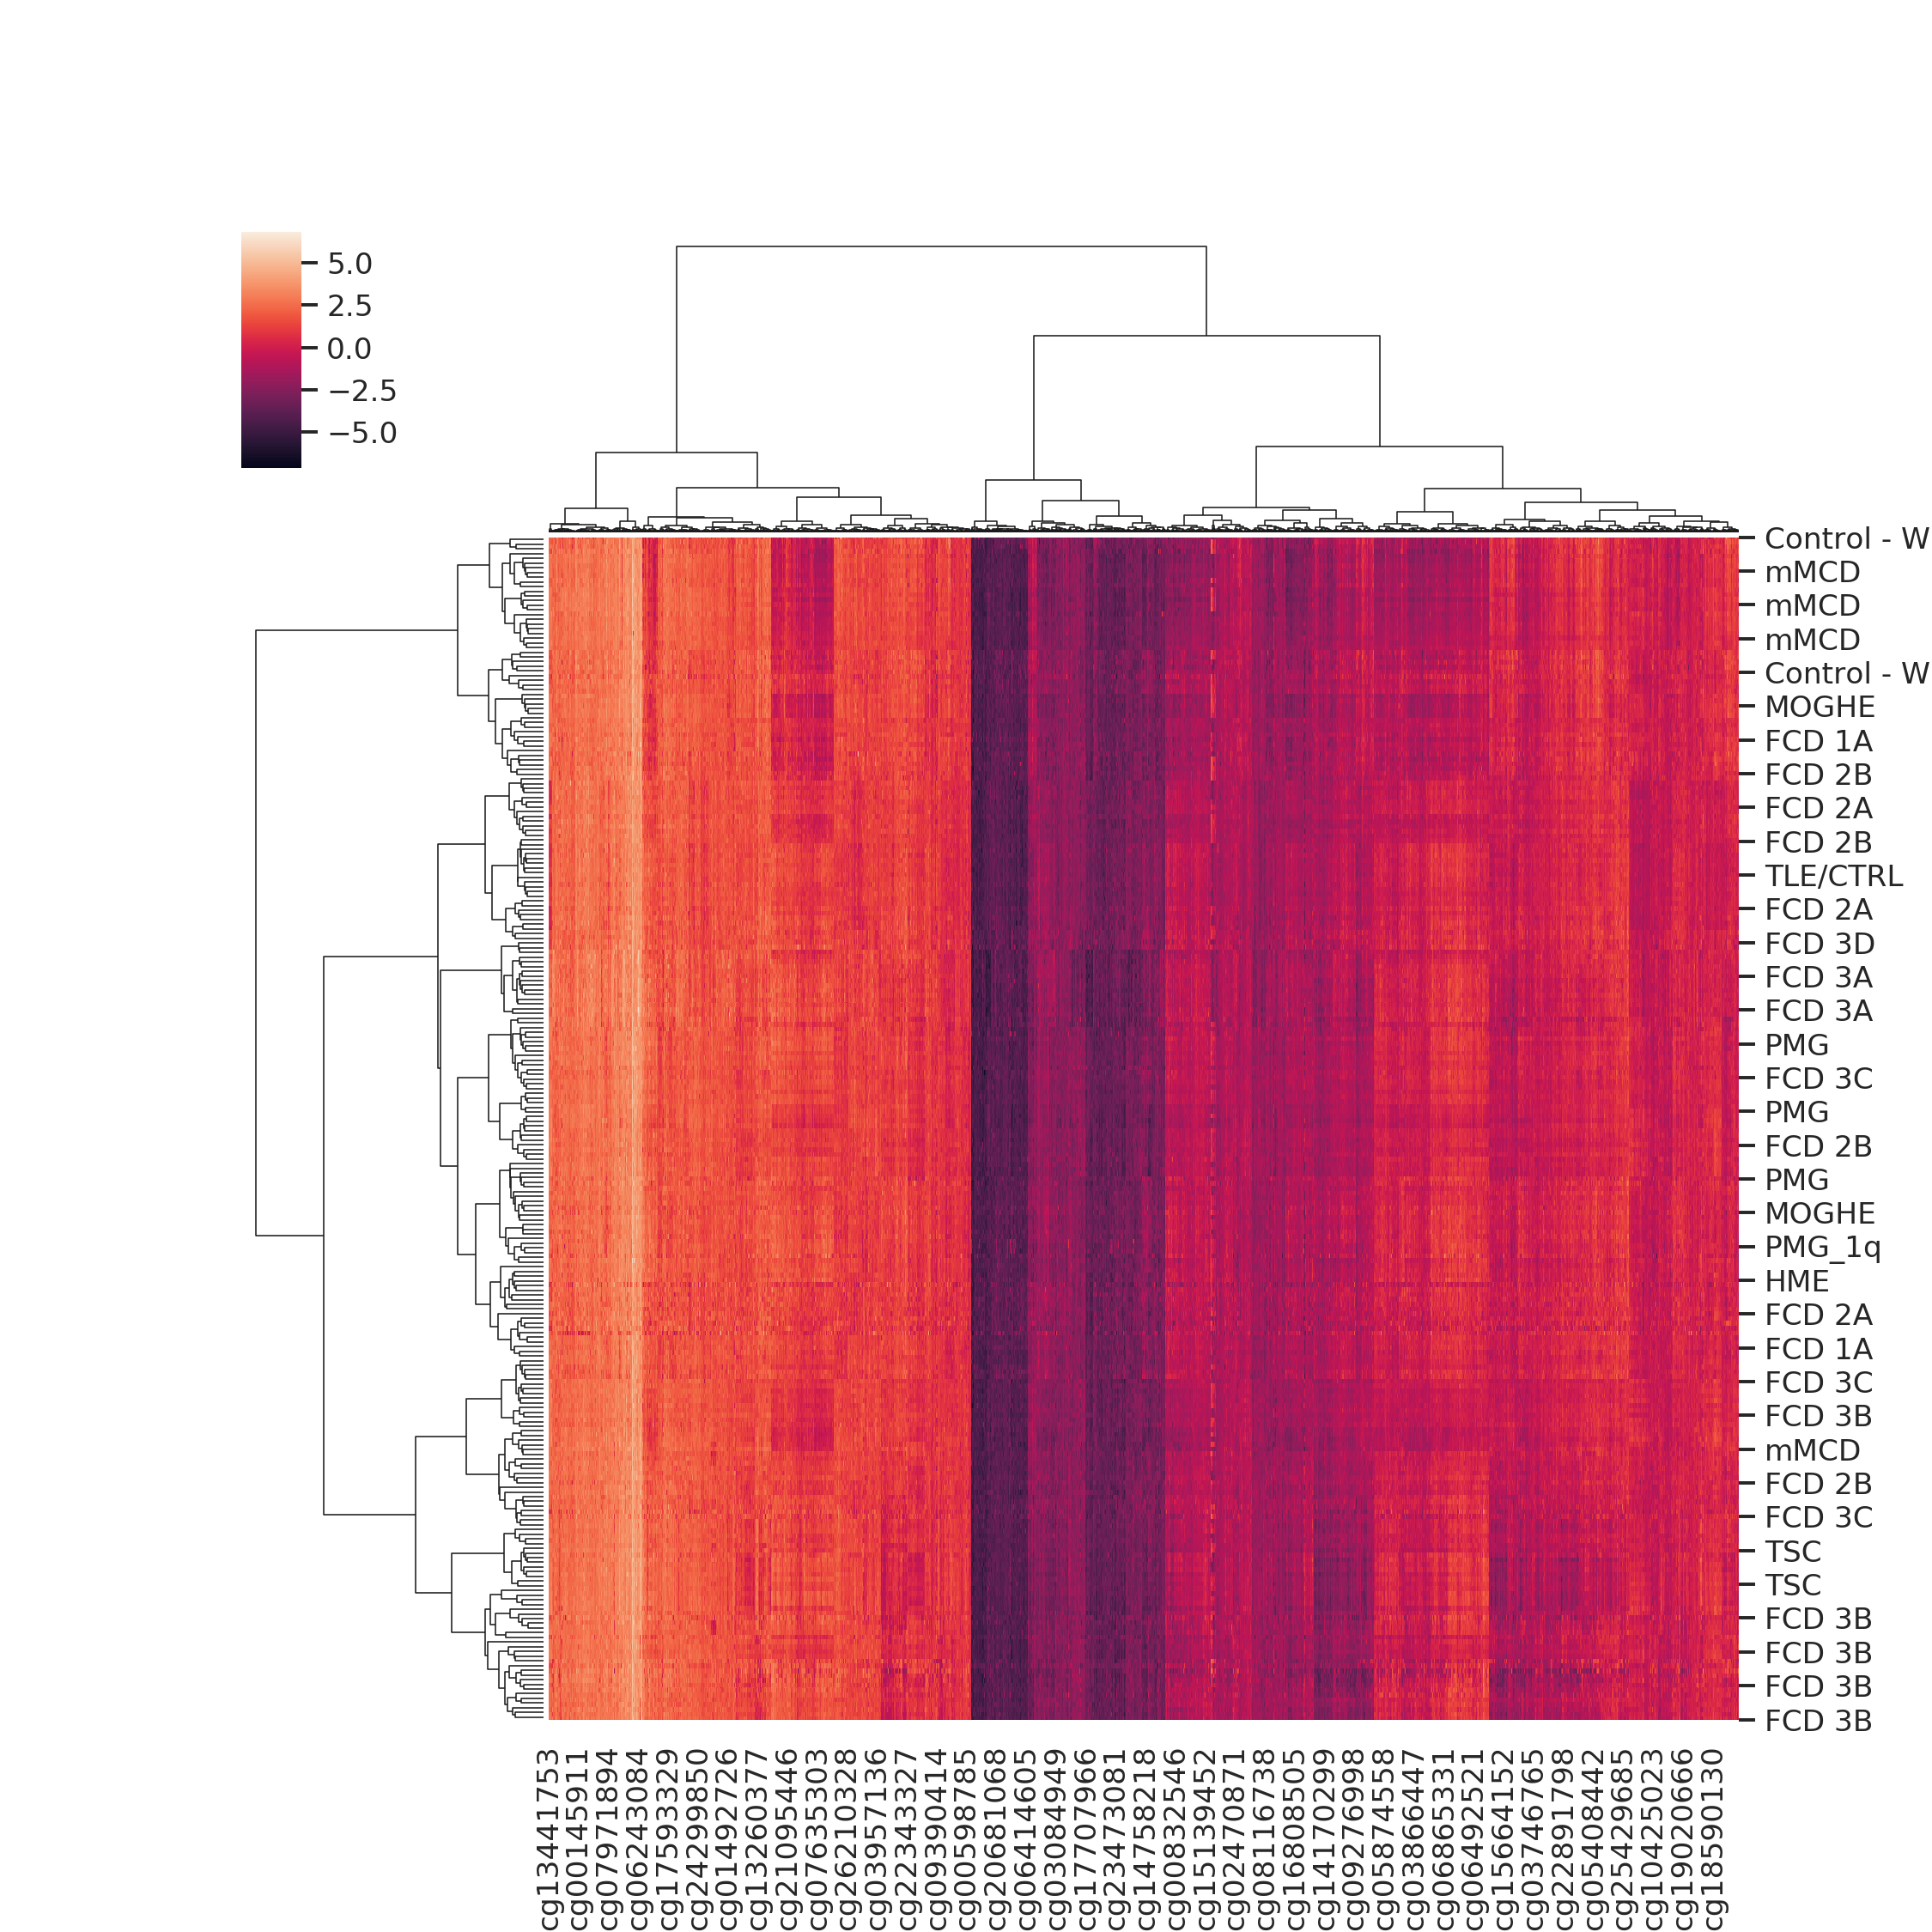

In [577]:
%matplotlib notebook
import seaborn as sns 
sns.set(color_codes=True)
#iris = sns.load_dataset("iris")
#species = iris.pop("species")
sns.clustermap(betac, method='ward', metric='euclidean')

### Champ Pipeline

In [28]:
beta_py,mval_py, pheno_py=preproidat.champ_processing(
                                                      pheno=preproidat.pheno_orig, GRset=GRset, RGset=preproidat.RGset_orig, 
                                                      beta=None, M=None, autoimpute=True, filterDetP=True, ProbeCutoff=0, 
                                                      SampleCutoff=0.03,filterBeads=True,beadCutoff=0.6,fixOutlier = True, 
                                                      dropSnPs=True, mask_probes=True,filterXY=True, filterNoCG=True, 
                                                      excludeXreactiveprobes=True, array_type='EPIC', verbose=True, 
                                                      badSampleCutoff=10,rm_badsamples=False,detPFilter=False, detPcut=0.01,
                                                      addQC=False, imputation_method="imputePCA"
                                                      )


 Now performing champ_filter function
[===========================]
<<<FILTER START>>> 
-----------------------------
 Section 1:  Check Input Start 
  You have inputed 
 
beta,M
 
 for Analysis.
 pd file provided, checking if it's in accord with Data Matrix...
    pd file check success.
  Parameter filterDetP is TRUE, checking if detP in accord with Data Matrix...
    !!! Your detP matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  Parameter filterBeads is TRUE, checking if beadcount in accord with Data Matrix...
    !!! Your  beadcount matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  parameter autoimpute is TRUE. Checking if the conditions are fulfilled...
    autoimpute check success.
 Section 2: Filtering Start >>
  Filtering Detect P value Start
    The fraction of failed positions per sample
    You may need to delete samples with high proportion of failed probes:

    The detSamplecut parameter is : 
 
0.03

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.




 Now removing specific probes for m-values
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
799
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
740090
 
 probes for the analysis before filtering.


 
343955
 
 probes have been removed from further analysis.

 In total there are
 
396135
 
 probes left for the analysis.

 In total there were 
 
96
 
 samples for the analysis before filtering.


 
0
 
 samples have been removed from further analysis.

 In total there are
 
96
 
 samples left for the analysis.

 Now removing specific probes for beta-values 
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
799
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
740090
 
 probes for the analysis before filtering.


 
343955
 
 probes have been removed from

In [29]:
preproidat.pheno_py

age_onset  age_surgery                                           Basename  \
0         0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1         0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         0.0         49.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3         0.0         49.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         0.0         52.0  /home/Deep_Learner/private/network/Methyl_Arra...   
..        ...          ...                                                ...   
91        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
92        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
93        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
94        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
95        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  duration duration_group      diagnosis center  \
0   b202931510124       0.0              0  Control - NCx   UKER   
1   b202931510124       0.0              0   Control - WM   UKER   
2   b202931510124       0.0              0   Control - WM   UKER   
3   b202939390010       0.0              0   Control - WM   UKER   
4   b202939390010       0.0              0  Control - NCx   UKER   
..            ...       ...            ...            ...    ...   
91  b203220070086       1.0            1-5         TSC na   Mara   
92  b203220070086       3.0            1-5         TSC na   Mara   
93  b203220070058       1.0            1-5         TSC na   Mara   
94  b203220070058       1.0            1-5         TSC na   Mara   
95  b203220070058       1.0            1-5         TSC na    VGT   

   location_region location_wm_cx  ...        case_ID        disease  \
0         temporal         Cortex  ...  SN 173/09 III  Control - NCx   
1         temporal      Marklager  ...  SN 173/09 III   Control - WM   
2         temporal      Marklager  ...   SN 80/16 III   Control - WM   
3          frontal      Marklager  ...     SN 80/16 I   Control - WM   
4          frontal         Cortex  ...     SN 81/16 I  Control - NCx   
..             ...            ...  ...            ...            ...   
91         frontal       gemischt  ...    1467/16 III            TSC   
92         frontal       gemischt  ...      1061/17 7            TSC   
93         frontal       gemischt  ...    1714/17 II2            TSC   
94         frontal       gemischt  ...     182/18 IV1            TSC   
95         frontal       gemischt  ...      1909/17 6            TSC   

             identifier                                 ID  \
0   202931510124_R04C01  Control - NCx.202931510124_R04C01   
1   202931510124_R05C01   Control - WM.202931510124_R05C01   
2   202931510124_R07C01   Control - WM.202931510124_R07C01   
3   202939390010_R06C01   Control - WM.202939390010_R06C01   
4   202939390010_R07C01  Control - NCx.202939390010_R07C01   
..                  ...                                ...   
91  203220070086_R07C01            TSC.203220070086_R07C01   
92  203220070086_R08C01            TSC.203220070086_R08C01   
93  203220070058_R01C01            TSC.203220070058_R01C01   
94  203220070058_R02C01            TSC.203220070058_R02C01   
95  203220070058_R03C01            TSC.203220070058_R03C01   

                                            filenames       xMed       yMed  \
0   /home/Deep_Learner/private/network/Methyl_Arra...  11.602235   9.108524   
1   /home/Deep_Learner/private/network/Methyl_Arra...  11.396070   9.092757   
2   /home/Deep_Learner/private/network/Methyl_Arra...  11.813781   9.366322   
3   /home/Deep_Learner/private/network/Methyl_Arra...  11.140191   8.531381   
4   /home/Deep_Learner/private/network/Methyl_Arra...  11.113091  11.747354   
..                                                ...        ...        ...   
91  /home/Deep_Learner/private/network/Methyl_Arra.

In [30]:
preproidat.beta_py

Control - NCx.202931510124_R04C01  \
cg09499020                           0.322238   
cg16535257                           0.476165   
cg16619049                           0.087168   
cg18147296                           0.588984   
cg12445832                           0.653033   
...                                       ...   
cg25232725                           0.710787   
cg05615487                           0.748360   
cg22122449                           0.801904   
cg08423507                           0.786776   
cg19565306                           0.048351   

            Control - WM.202931510124_R05C01  \
cg09499020                          0.387505   
cg16535257                          0.417049   
cg16619049                          0.113861   
cg18147296                          0.749364   
cg12445832                          0.615029   
...                                      ...   
cg25232725                          0.750293   
cg05615487                          0.898628   
cg22122449                          0.819229   
cg08423507                          0.778016   
cg19565306                          0.034095   

            Control - WM.202931510124_R07C01  \
cg09499020                          0.324229   
cg16535257                          0.409451   
cg16619049                          0.143700   
cg18147296                          0.726841   
cg12445832                          0.648913   
...                                      ...   
cg25232725                          0.801430   
cg05615487                          0.799569   
cg22122449                          0.856201   
cg08423507                          0.763425   
cg19565306                          0.066554   

            Control - WM.202939390010_R06C01  \
cg09499020                          0.403697   
cg16535257                          0.408789   
cg16619049                          0.209035   
cg18147296                          0.634645   
cg12445832                          0.709656   
...                                      ...   
cg25232725                          0.791033   
cg05615487                          0.830319   
cg22122449                          0.838785   
cg08423507                          0.791970   
cg19565306                          0.042491   

            Control - NCx.202939390010_R07C01  \
cg09499020                           0.348591   
cg16535257                           0.402487   
cg16619049                           0.098706   
cg18147296                           0.612799   
cg12445832                           0.646475   
...                                       ...   
cg25232725                           0.798196   
cg05615487                           0.824150   
cg22122449                           0.741276   
cg08423507                           0.805709   
cg19565306                           0.056451   

            Control - WM.202939390010_R08C01  \
cg09499020                          0.167137   
cg16535257                          0.149549   
cg16619049                          0.266222   
cg18147296                          0.698973   
cg12445832                          0.592308   
...                                      ...   
cg25232725                          0.761383   
cg05615487                          0.847711   
cg22122449                          0.817057   
cg08423507                          0.798542   
cg19565306                          0.071312   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg09499020                          0.120266                    0.251468   
cg16535257                          0.155528                    0.325832   
cg16619049                          0.173798                    0.197719   
cg18147296                          0.755640                    0.699999   
cg12445832                          0.794071                    0.629725   
...                                      ...                         .

In [31]:
#without removal of cpgs
preproidat.mval_py

Control - NCx.202931510124_R04C01  \
cg09499020                          -1.072654   
cg16535257                          -0.137652   
cg16619049                          -3.388477   
cg18147296                           0.519036   
cg12445832                           0.912356   
...                                       ...   
cg25232725                           1.297288   
cg05615487                           1.572368   
cg22122449                           2.017232   
cg08423507                           1.883579   
cg19565306                          -4.298811   

            Control - WM.202931510124_R05C01  \
cg09499020                         -0.660480   
cg16535257                         -0.483160   
cg16619049                         -2.960255   
cg18147296                          1.580070   
cg12445832                          0.675907   
...                                      ...   
cg25232725                          1.587218   
cg05615487                          3.148072   
cg22122449                          2.180107   
cg08423507                          1.809340   
cg19565306                         -4.824265   

            Control - WM.202931510124_R07C01  \
cg09499020                         -1.059521   
cg16535257                         -0.528368   
cg16619049                         -2.575051   
cg18147296                          1.411900   
cg12445832                          0.886194   
...                                      ...   
cg25232725                          2.012933   
cg05615487                          1.996113   
cg22122449                          2.573891   
cg08423507                          1.690189   
cg19565306                         -3.809962   

            Control - WM.202939390010_R06C01  \
cg09499020                         -0.562771   
cg16535257                         -0.532319   
cg16619049                         -1.919868   
cg18147296                          0.796654   
cg12445832                          1.289357   
...                                      ...   
cg25232725                          1.920463   
cg05615487                          2.290843   
cg22122449                          2.379315   
cg08423507                          1.928656   
cg19565306                         -4.494052   

            Control - NCx.202939390010_R07C01  \
cg09499020                          -0.902025   
cg16535257                          -0.570026   
cg16619049                          -3.190782   
cg18147296                           0.662331   
cg12445832                           0.870782   
...                                       ...   
cg25232725                           1.983791   
cg05615487                           2.228558   
cg22122449                           1.518595   
cg08423507                           2.052038   
cg19565306                          -4.063029   

            Control - WM.202939390010_R08C01  \
cg09499020                         -2.317051   
cg16535257                         -2.507604   
cg16619049                         -1.462712   
cg18147296                          1.215343   
cg12445832                          0.538865   
...                                      ...   
cg25232725                          1.673926   
cg05615487                          2.476764   
cg22122449                          2.159038   
cg08423507                          1.986887   
cg19565306                         -3.702967   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg09499020                         -2.870843                   -1.573693   
cg16535257                         -2.440871                   -1.048980   
cg16619049                         -2.249078                   -2.020659   
cg18147296                          1.628694                    1.222384   
cg12445832                          1.947118                    0.766128   
...                                      ...                         .

<IPython.core.display.Javascript object>


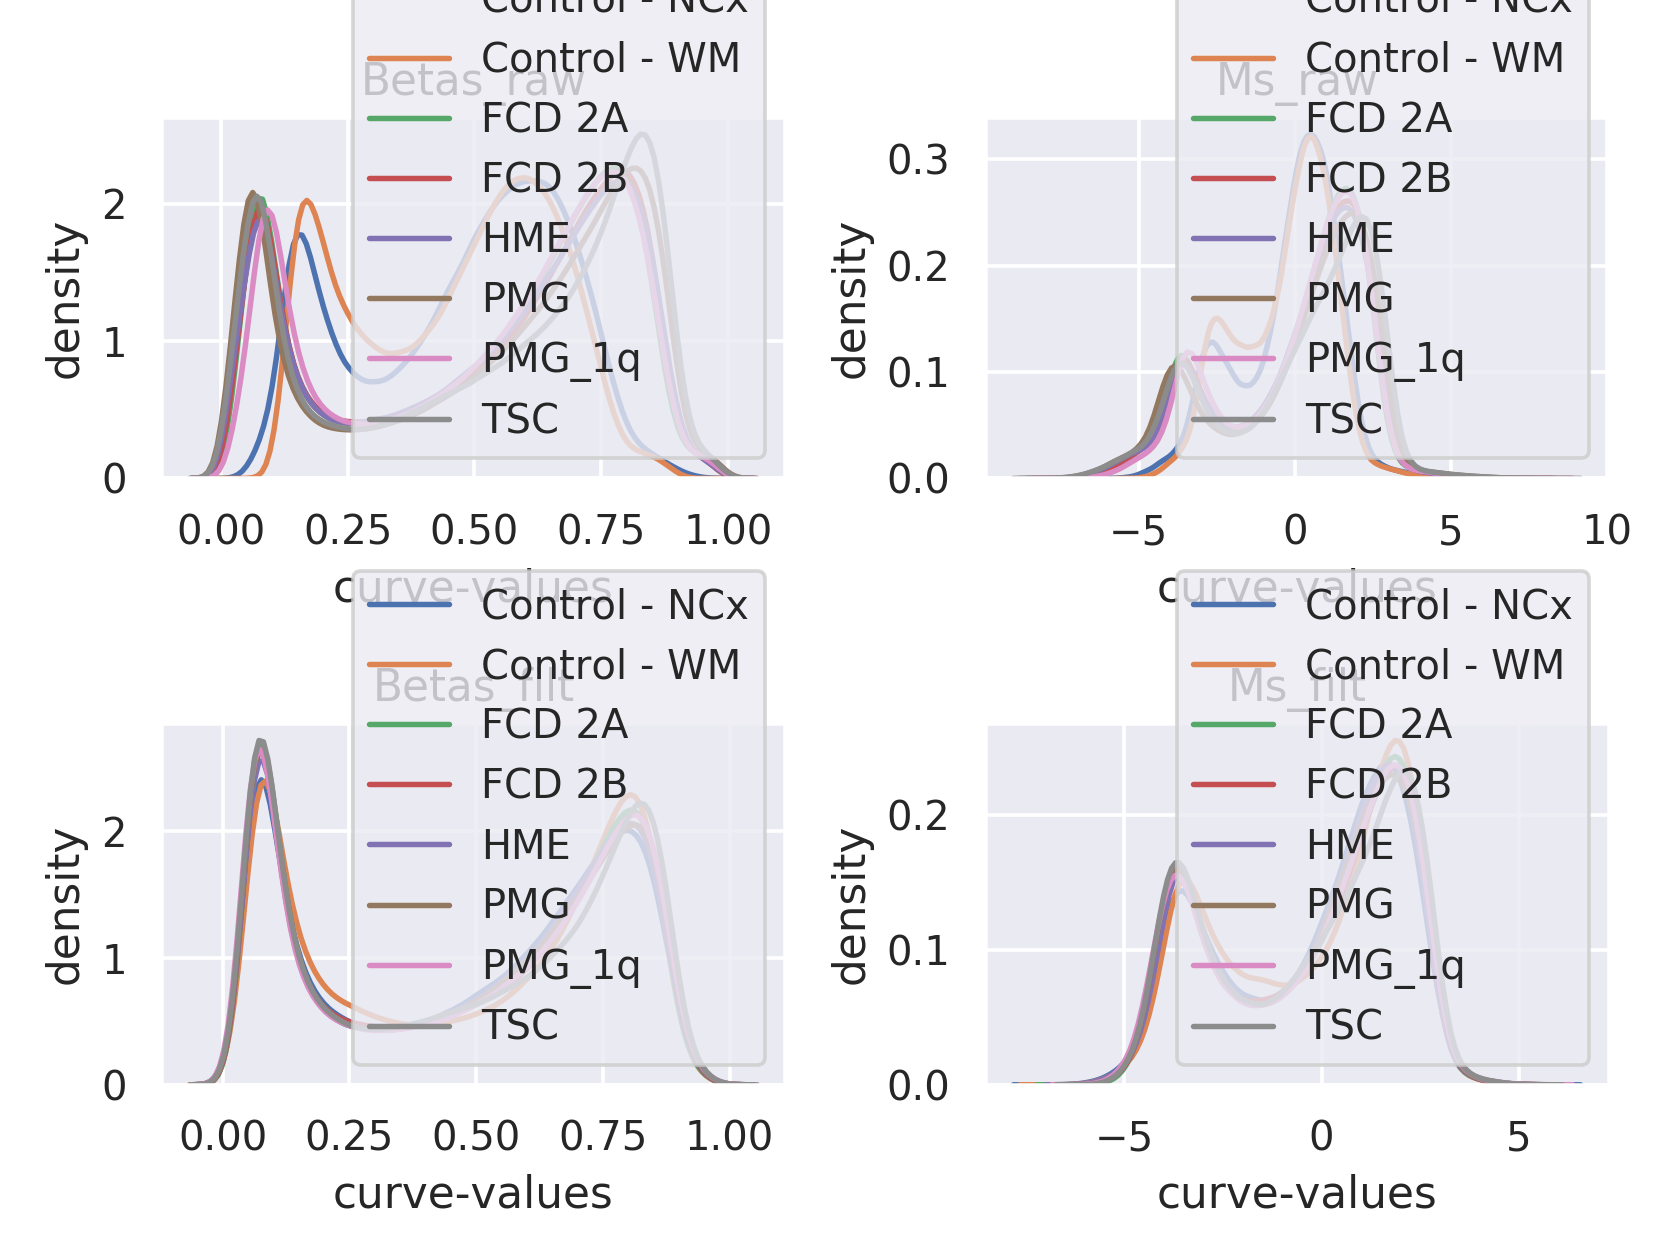

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [32]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


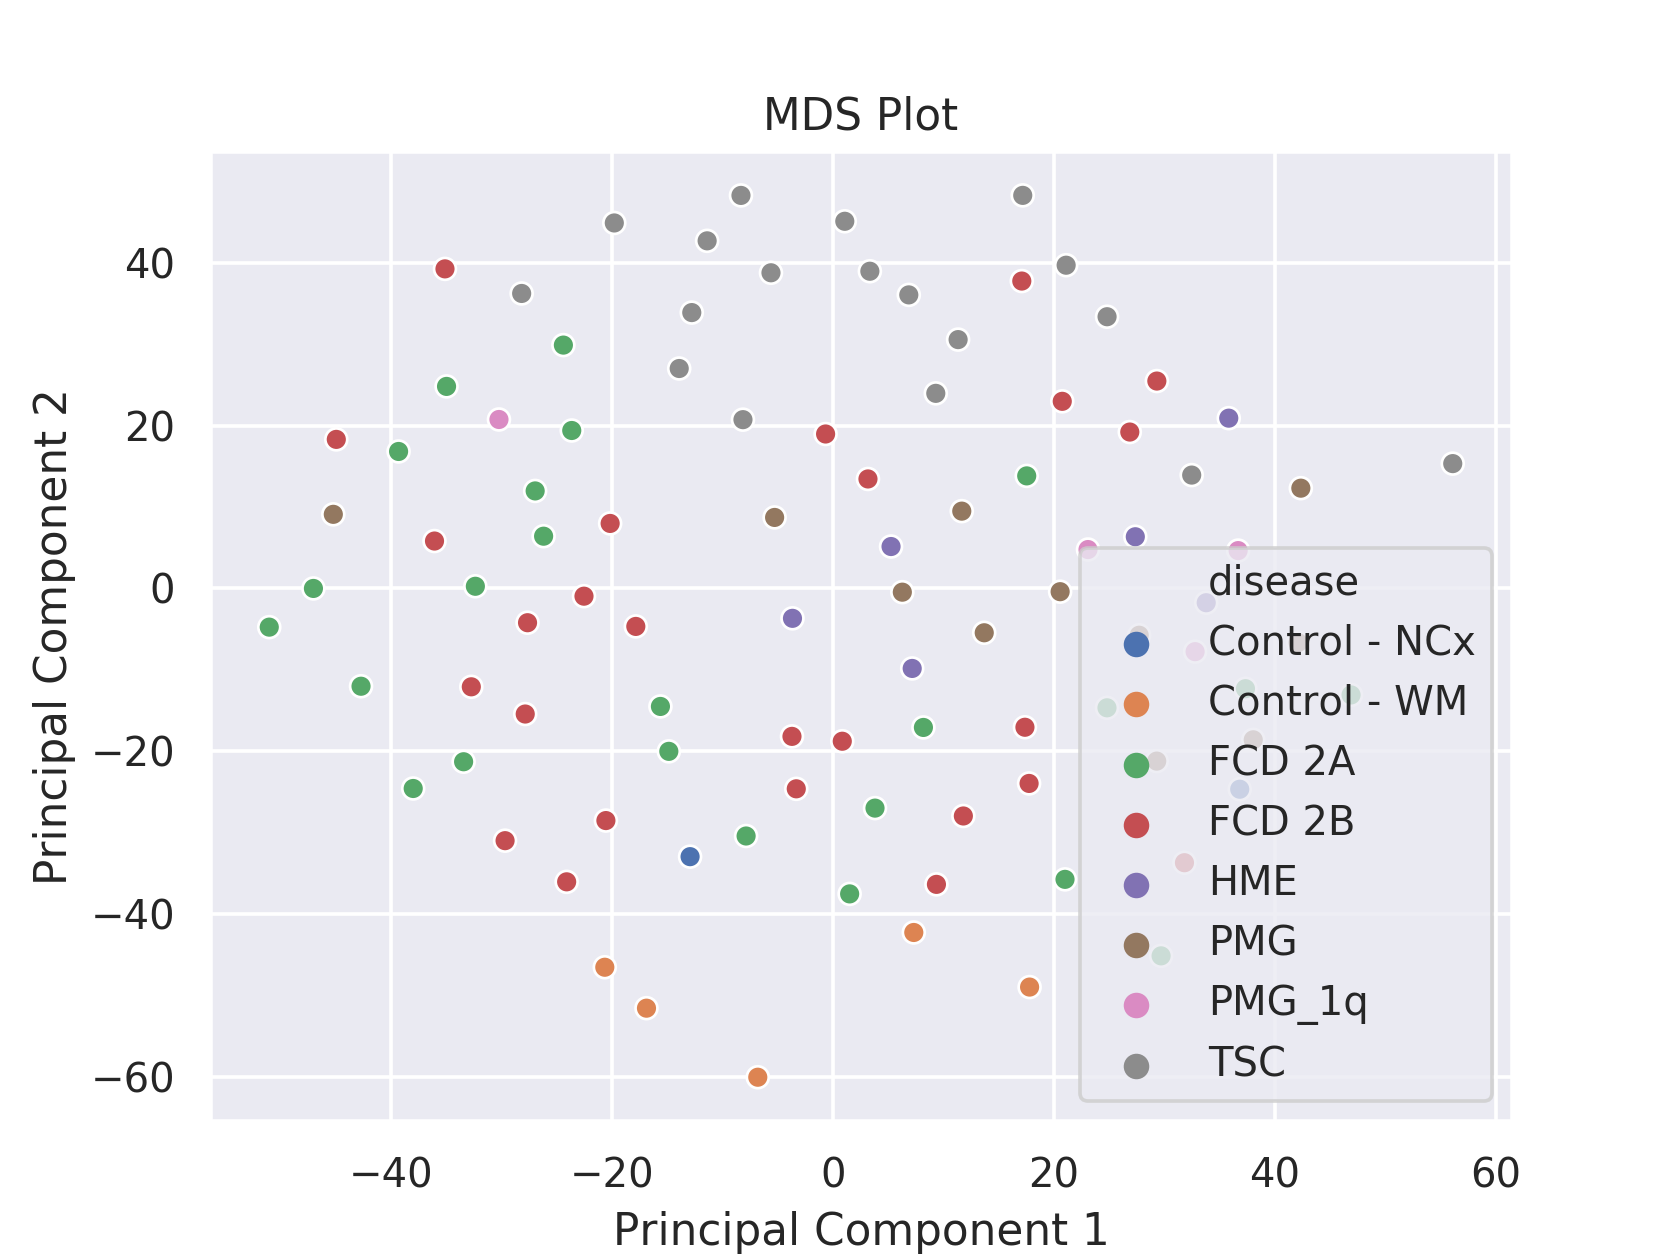

In [33]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


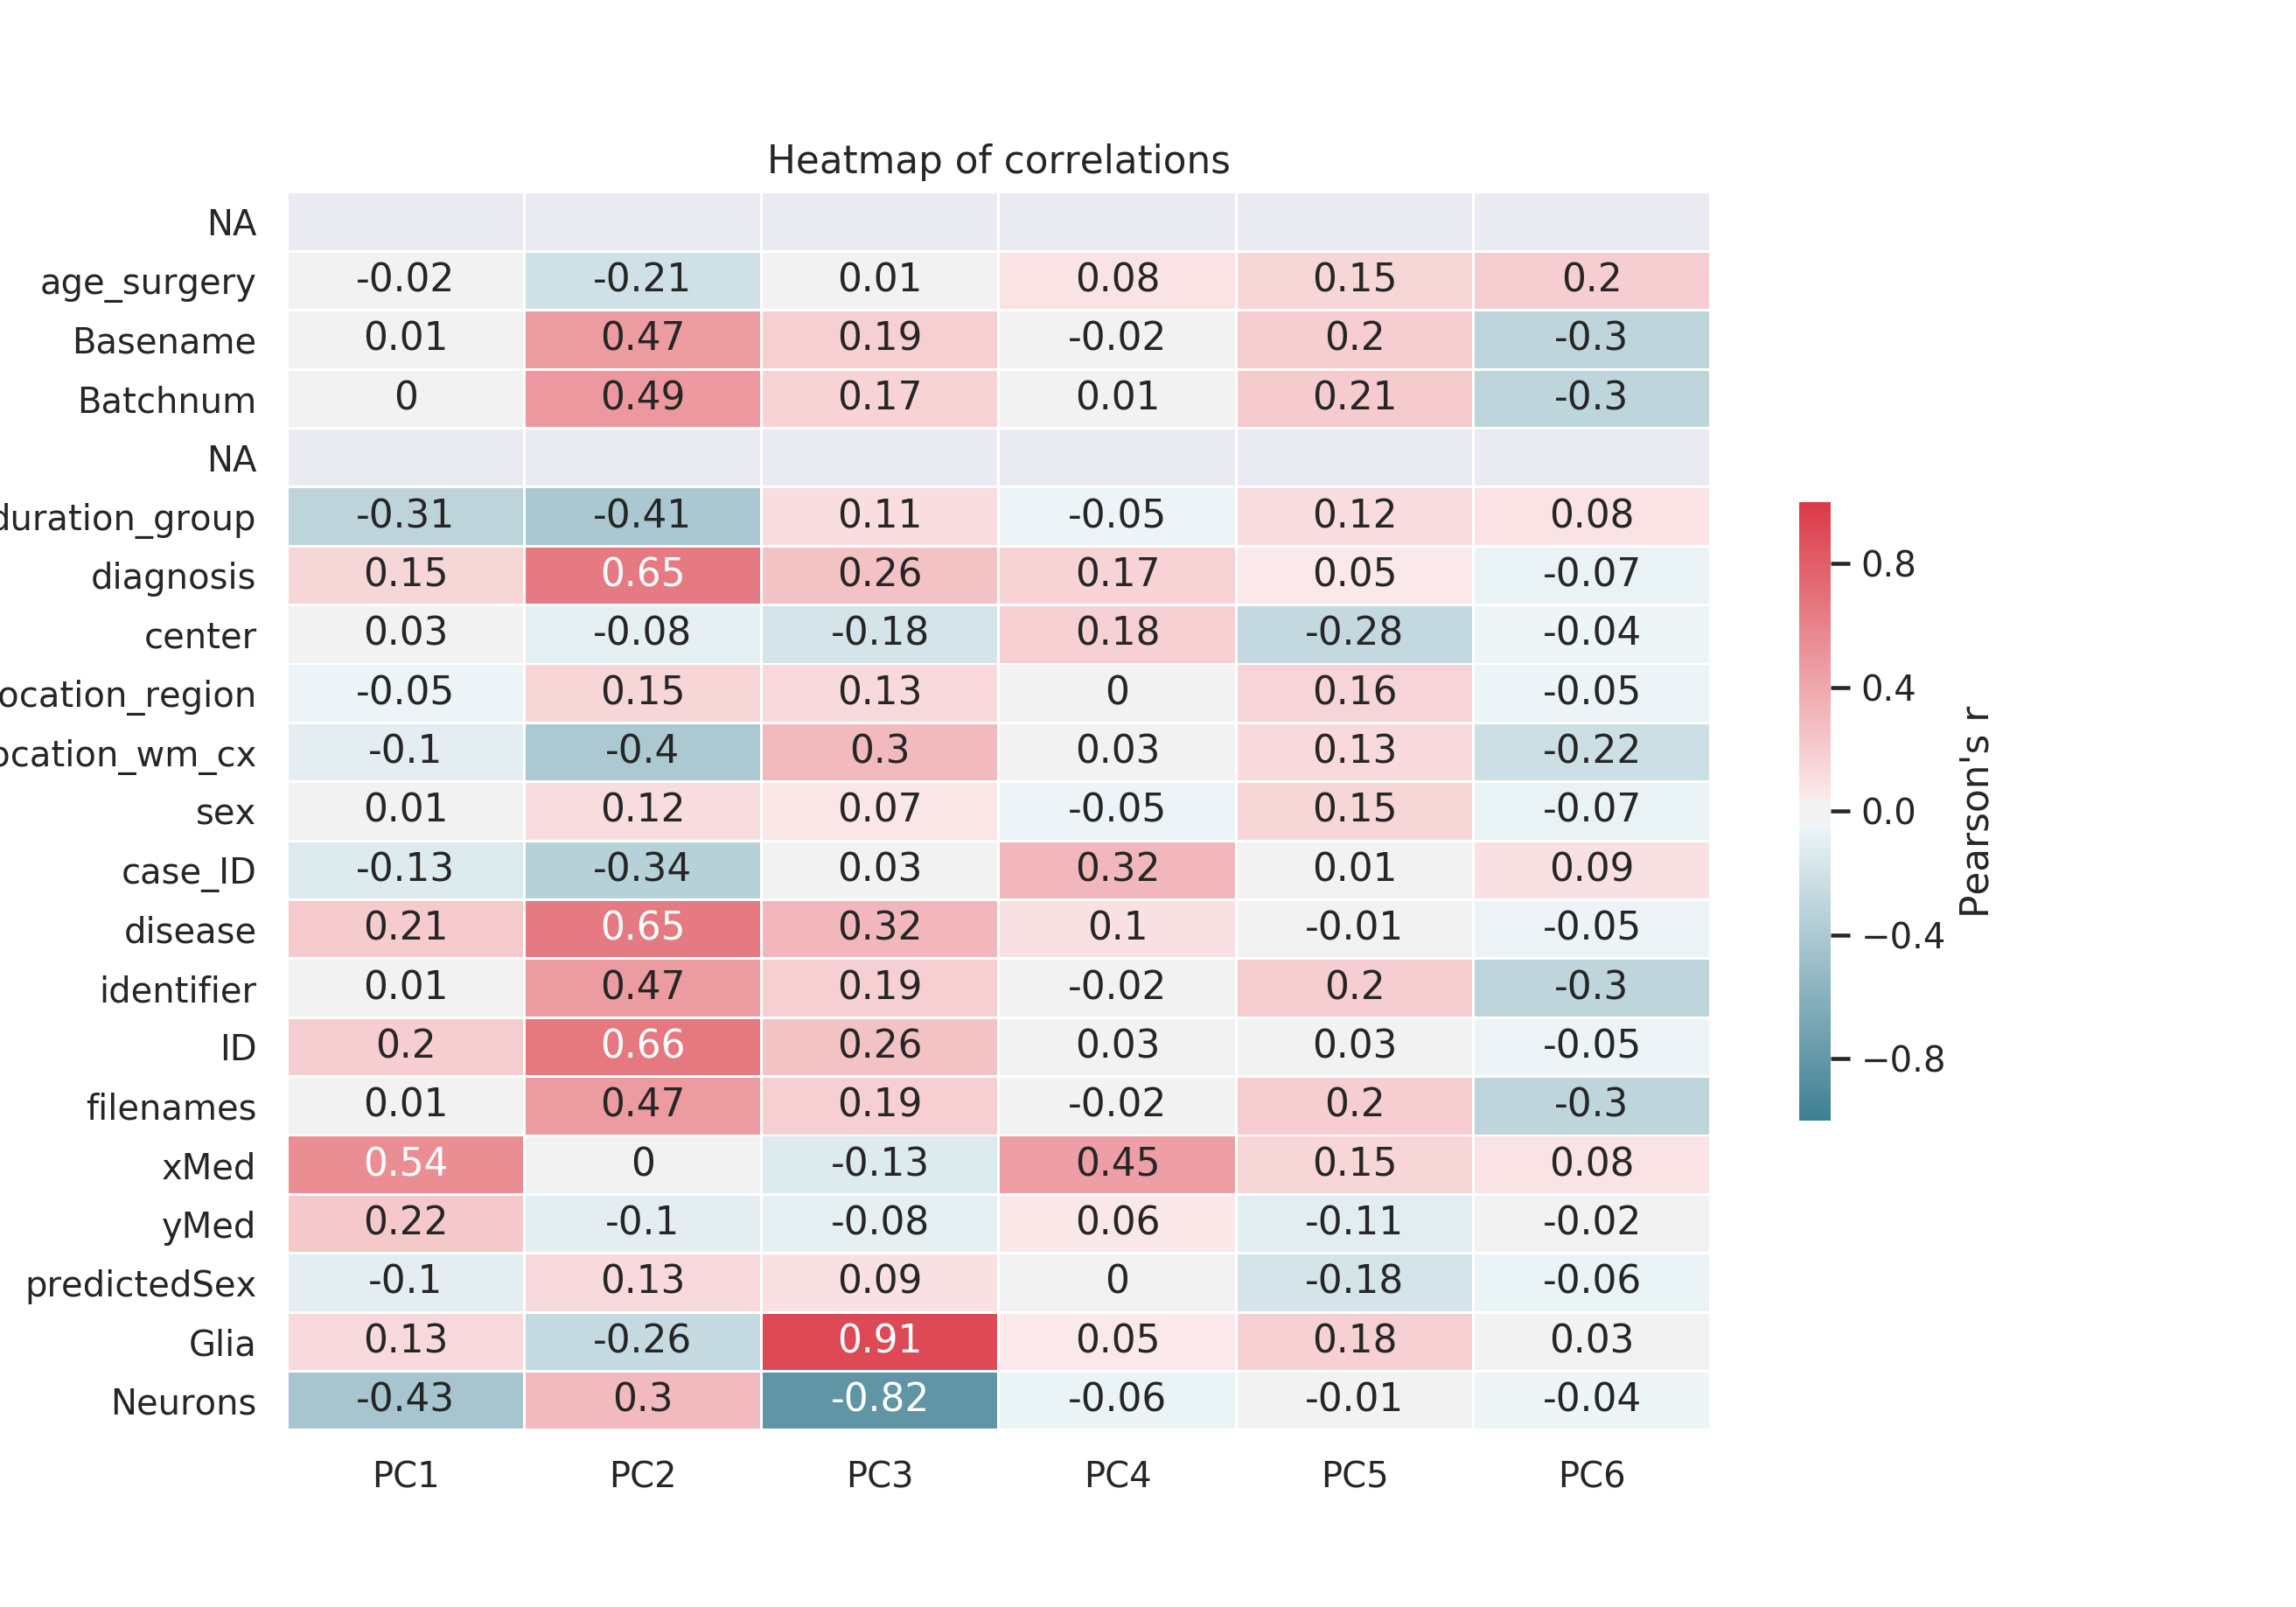

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [34]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [35]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['age_surgery'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=50, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'Control - NCx-Control - WM', 2: 'Control - NCx-FCD 2A', 3: 'Control - NCx-FCD 2B', 4: 'Control - NCx-HME', 5: 'Control - NCx-PMG', 6: 'Control - NCx-PMG_1q', 7: 'Control - NCx-TSC', 8: 'Control - WM-FCD 2A', 9: 'Control - WM-FCD 2B', 10: 'Control - WM-HME', 11: 'Control - WM-PMG', 12: 'Control - WM-PMG_1q', 13: 'Control - WM-TSC', 14: 'FCD 2A-FCD 2B', 15: 'FCD 2A-HME', 16: 'FCD 2A-PMG', 17: 'FCD 2A-PMG_1q', 18: 'FCD 2A-TSC', 19: 'FCD 2B-HME', 20: 'FCD 2B-PMG', 21: 'FCD 2B-PMG_1q', 22: 'FCD 2B-TSC', 23: 'HME-PMG', 24: 'HME-PMG_1q', 25: 'HME-TSC', 26: 'PMG-PMG_1q', 27: 'PMG-TSC', 28: 'PMG_1q-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x55a48cf1a848>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation

In [36]:
len(preproidat.dmps)

813

In [37]:
preproidat.dectest

diseaseControl...NCx-diseaseControl...WM  \
Down                                       403.0   
NotSig                                  394891.0   
Up                                         841.0   

        diseaseControl...NCx-diseaseFCD.2A  \
Down                                  12.0   
NotSig                            396079.0   
Up                                    44.0   

        diseaseControl...NCx-diseaseFCD.2B  diseaseControl...NCx-diseaseHME  \
Down                                  23.0                              1.0   
NotSig                            396064.0                         396122.0   
Up                                    48.0                             12.0   

        diseaseControl...NCx-diseasePMG  diseaseControl...NCx-diseasePMG_1q  \
Down                                3.0                                 7.0   
NotSig                         396111.0                            396117.0   
Up                                 21.0                                11.0   

        diseaseControl...NCx-diseaseTSC  diseaseControl...WM-diseaseFCD.2A  \
Down                             1908.0                            15177.0   
NotSig                         388916.0                           361847.0   
Up                               5311.0                            19111.0   

        diseaseControl...WM-diseaseFCD.2B  diseaseControl...WM-diseaseHME  \
Down                              10083.0                         15474.0   
NotSig                           374795.0                        371682.0   
Up                                11257.0                          8979.0   

        ...  diseaseFCD.2B-diseaseHME  diseaseFCD.2B-diseasePMG  \
Down    ...                    1130.0                   10165.0   
NotSig  ...                  394850.0                  376915.0   
Up      ...                     155.0                    9055.0   

        diseaseFCD.2B-diseasePMG_1q  diseaseFCD.2B-diseaseTSC  \
Down                         2440.0                   15120.0   
NotSig                     391949.0                  356625.0   
Up                           1746.0                   24390.0   

        diseaseHME-diseasePMG  diseaseHME-diseasePMG_1q  \
Down                      0.0                      26.0   
NotSig               396135.0                  396103.0   
Up                        0.0                       6.0   

        diseaseHME-diseaseTSC  diseasePMG-diseasePMG_1q  \
Down                   3931.0                      41.0   
NotSig               381711.0                  396087.0   
Up                    10493.0                       7.0   

        diseasePMG-diseaseTSC  diseasePMG_1q-diseaseTSC  
Down                  21301.0                    7453.0  
NotSig               346193.0                  378189.0  
Up                    28641.0                   10493.0  

[3 rows x 28 columns]

In [38]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

Control - NCx.202931510124_R04C01  \
cg26854931                           1.521746   
cg22217158                          -2.230019   
cg09529454                           2.321832   
cg02190038                          -1.412642   
cg21777343                          -0.822186   
...                                       ...   
cg01203443                          -3.679606   
cg18494272                          -3.256715   
cg03673894                          -0.124559   
cg20013942                           2.491505   
cg01207974                           2.022817   

            Control - WM.202931510124_R05C01  \
cg26854931                          1.661837   
cg22217158                         -0.714228   
cg09529454                          1.743399   
cg02190038                         -0.359849   
cg21777343                         -0.230617   
...                                      ...   
cg01203443                         -2.910007   
cg18494272                         -3.023836   
cg03673894                         -1.733069   
cg20013942                          2.293782   
cg01207974                          2.380850   

            Control - WM.202931510124_R07C01  \
cg26854931                          1.983278   
cg22217158                         -1.477348   
cg09529454                          2.699640   
cg02190038                         -0.794367   
cg21777343                         -0.229831   
...                                      ...   
cg01203443                         -3.305560   
cg18494272                         -3.872426   
cg03673894                         -0.613224   
cg20013942                          2.578793   
cg01207974                          1.595080   

            Control - WM.202939390010_R06C01  \
cg26854931                          2.608752   
cg22217158                         -1.479045   
cg09529454                          1.883815   
cg02190038                         -1.561884   
cg21777343                          0.043209   
...                                      ...   
cg01203443                         -3.572428   
cg18494272                         -4.210558   
cg03673894                         -2.399731   
cg20013942                          3.520303   
cg01207974                          1.440814   

            Control - NCx.202939390010_R07C01  \
cg26854931                           1.780690   
cg22217158                          -1.251389   
cg09529454                           1.847957   
cg02190038                          -1.085357   
cg21777343                          -0.278105   
...                                       ...   
cg01203443                          -3.680113   
cg18494272                          -3.195407   
cg03673894                          -0.165144   
cg20013942                           1.980891   
cg01207974                           1.534466   

            Control - WM.202939390010_R08C01  \
cg26854931                          2.052878   
cg22217158                         -2.228581   
cg09529454                          2.508901   
cg02190038                         -0.740794   
cg21777343                          0.137798   
...                                      ...   
cg01203443                         -3.291872   
cg18494272                         -4.322451   
cg03673894                         -2.055609   
cg20013942                          3.016816   
cg01207974                          2.518568   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg26854931                          1.874054                    2.044159   
cg22217158                         -1.234820                   -1.769573   
cg09529454                          2.712956                    2.036223   
cg02190038                         -0.394274                   -0.555162   
cg21777343                          0.076816                   -0.671699   
...                                      ...                         .

In [39]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

Control - NCx.202931510124_R04C01  \
cg26854931                           0.741694   
cg22217158                           0.175704   
cg09529454                           0.833324   
cg02190038                           0.273057   
cg21777343                           0.361261   
...                                       ...   
cg01203443                           0.072392   
cg18494272                           0.094715   
cg03673894                           0.478429   
cg20013942                           0.849026   
cg01207974                           0.802518   

            Control - WM.202931510124_R05C01  \
cg26854931                          0.759857   
cg22217158                          0.378701   
cg09529454                          0.770021   
cg02190038                          0.437964   
cg21777343                          0.460122   
...                                      ...   
cg01203443                          0.117423   
cg18494272                          0.109490   
cg03673894                          0.231249   
cg20013942                          0.830606   
cg01207974                          0.838929   

            Control - WM.202931510124_R07C01  \
cg26854931                          0.798139   
cg22217158                          0.264245   
cg09529454                          0.866603   
cg02190038                          0.365722   
cg21777343                          0.460257   
...                                      ...   
cg01203443                          0.091851   
cg18494272                          0.063914   
cg03673894                          0.395308   
cg20013942                          0.856618   
cg01207974                          0.751313   

            Control - WM.202939390010_R06C01  \
cg26854931                          0.859150   
cg22217158                          0.264017   
cg09529454                          0.786803   
cg02190038                          0.253011   
cg21777343                          0.507487   
...                                      ...   
cg01203443                          0.077542   
cg18494272                          0.051245   
cg03673894                          0.159311   
cg20013942                          0.919834   
cg01207974                          0.730802   

            Control - NCx.202939390010_R07C01  \
cg26854931                           0.774567   
cg22217158                           0.295796   
cg09529454                           0.782604   
cg02190038                           0.320318   
cg21777343                           0.451957   
...                                       ...   
cg01203443                           0.072369   
cg18494272                           0.098422   
cg03673894                           0.471414   
cg20013942                           0.797872   
cg01207974                           0.743380   

            Control - WM.202939390010_R08C01  \
cg26854931                          0.805800   
cg22217158                          0.175848   
cg09529454                          0.850565   
cg02190038                          0.374378   
cg21777343                          0.523860   
...                                      ...   
cg01203443                          0.092646   
cg18494272                          0.047603   
cg03673894                          0.193904   
cg20013942                          0.890035   
cg01207974                          0.851414   

            Control - WM.202944920003_R06C01  FCD 2A.202093110108_R07C01  \
cg26854931                          0.785666                    0.804852   
cg22217158                          0.298194                    0.226781   
cg09529454                          0.867666                    0.803987   
cg02190038                          0.432100                    0.404968   
cg21777343                          0.513308                    0.385661   
...                                      ...                         .

<IPython.core.display.Javascript object>


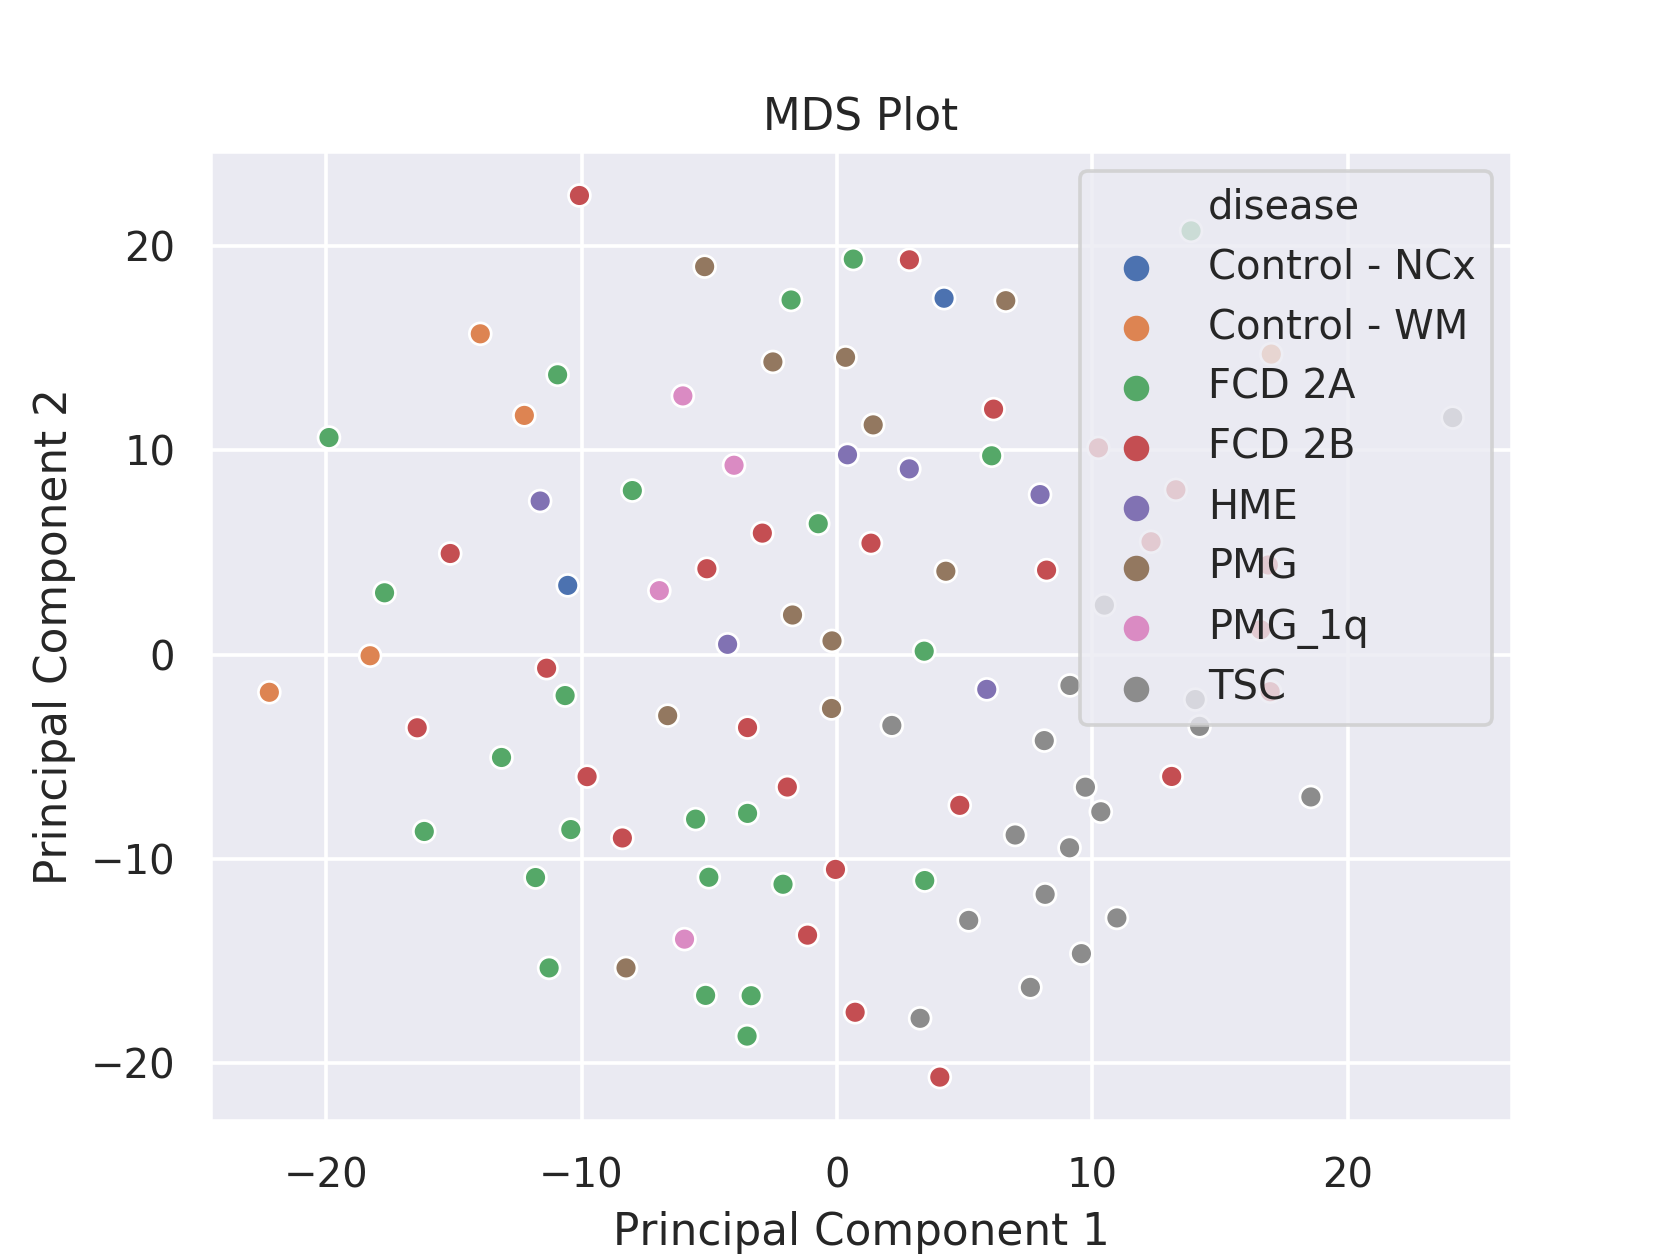

In [40]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

In [41]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.20003461837768555 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [42]:
embedding.shape

(96, 2)

In [43]:
preproidat.pheno_py[group].unique()

array(['Control - NCx', 'Control - WM', 'FCD 2A', 'FCD 2B', 'HME', 'PMG',
       'PMG_1q', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


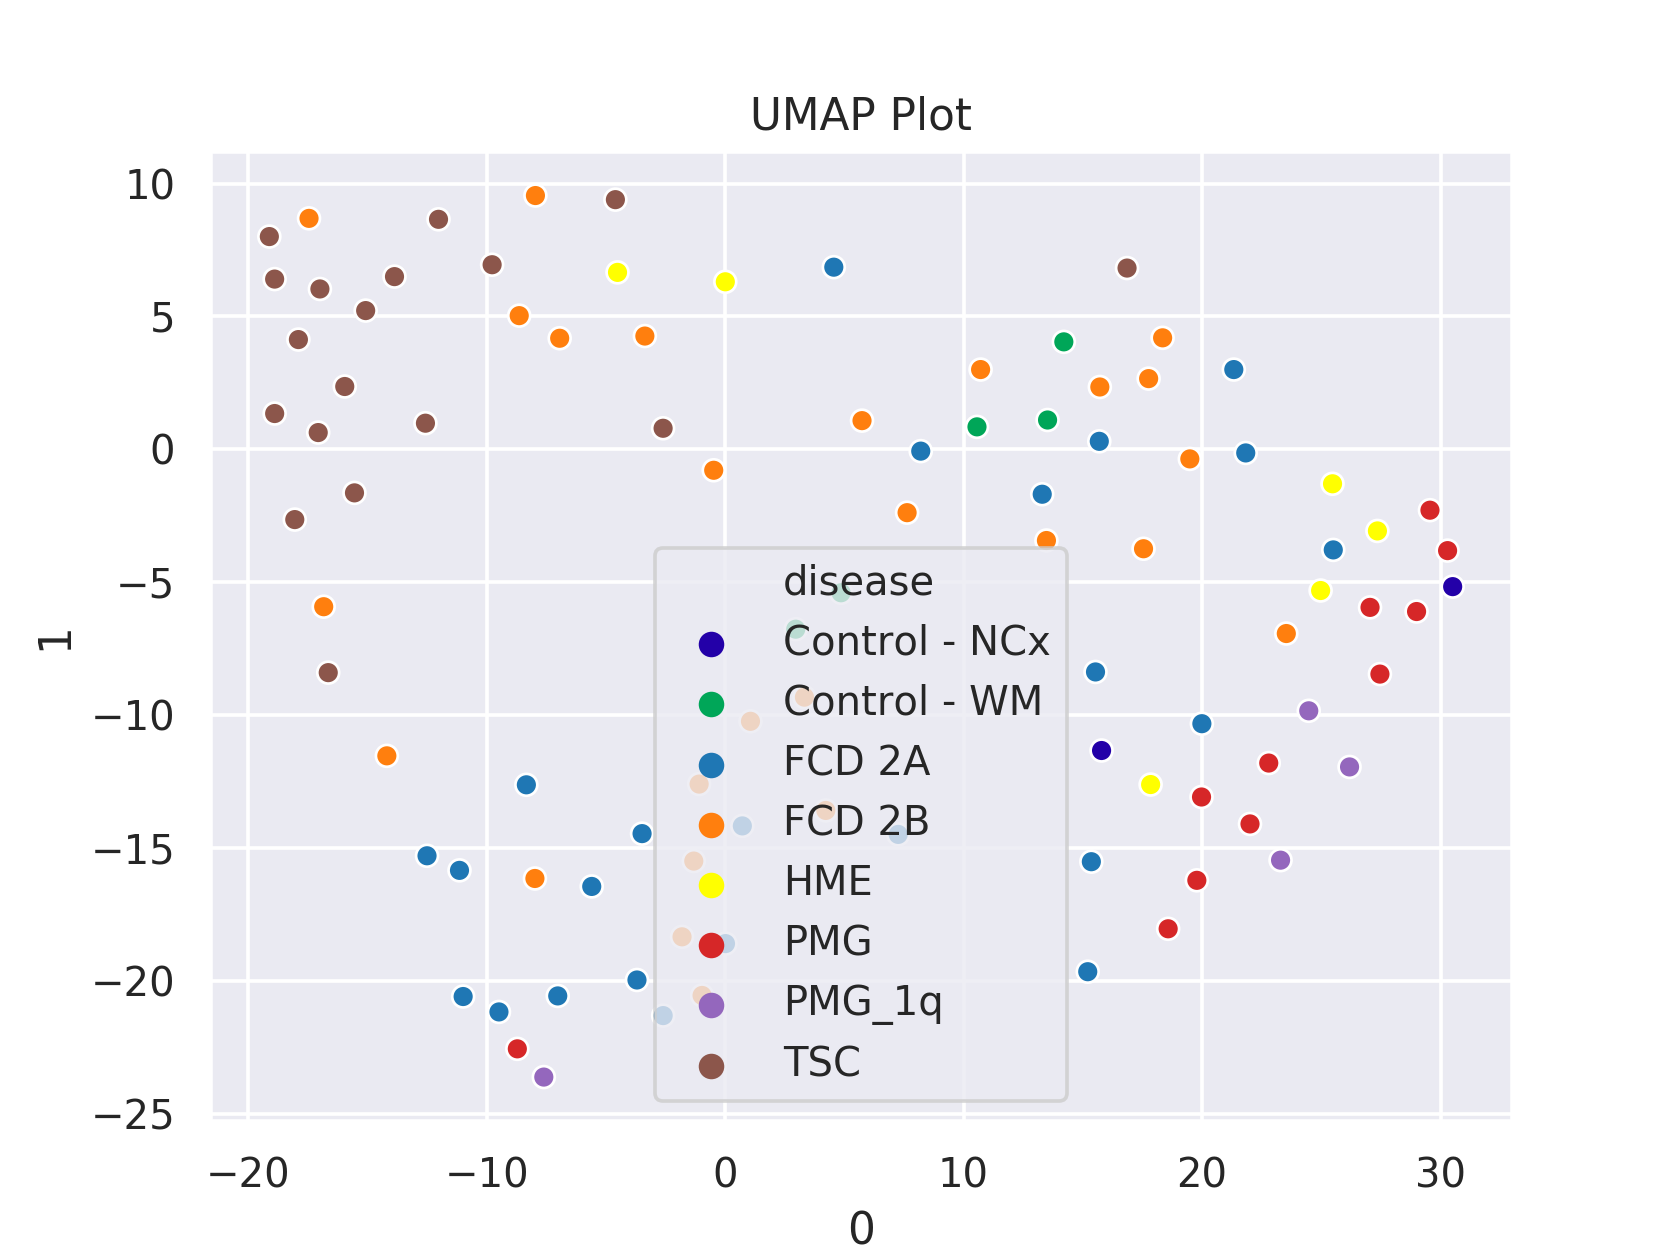

In [44]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [105]:
mval_10000.to_csv('mval_10000.csv', index=False)
beta_10000.to_csv('beta_10000.csv', index=False)
pheno.to_csv('pheno.csv', index=False)

In [66]:
mval_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg13211021                  2.134935                 -0.267658   
cg21099767                  1.286169                  1.470445   
cg07872854                  2.509267                  2.686531   
cg02510381                  2.442296                 -0.267658   
cg19866944                  2.185841                 -0.267658   
...                              ...                       ...   
cg26340968                  2.359707                  1.766196   
cg22498143                  1.395750                  1.123513   
cg07435331                  0.147186                  0.028006   
cg23401282                  1.274249                  0.996342   
cg07732348                  0.703665                  0.174892   

            CTRL.202818860053_R06C01  CTRL.202818860053_R07C01  \
cg13211021                  1.108773                  1.689598   
cg21099767                  3.140734                  0.476749   
cg07872854                  2.683560                 -0.362464   
cg02510381                  2.463107                 -0.362464   
cg19866944                 -0.218542                 -0.362464   
...                              ...                       ...   
cg26340968                  2.405455                  0.207839   
cg22498143                  1.999160                  0.801021   
cg07435331                  0.395173                  0.102514   
cg23401282                  1.826537                  0.856264   
cg07732348                 -0.056589                 -0.657828   

            CTRL.202818860053_R08C01  CTRL.202931510124_R01C01  \
cg13211021                  1.492799                  0.993806   
cg21099767                  2.197652                  1.445300   
cg07872854                  1.281631                  1.942652   
cg02510381                  1.147157                  2.438683   
cg19866944                 -0.232936                 -0.226156   
...                              ...                       ...   
cg26340968                  1.914919                  0.545024   
cg22498143                  2.126898                  0.757936   
cg07435331                  1.110374                 -0.403649   
cg23401282                  1.410207                  1.195406   
cg07732348                  0.391310                 -0.982195   

            CTRL.202931510124_R02C01  CTRL.202931510124_R03C01  \
cg13211021                 -0.467027                 -0.414829   
cg21099767                 -0.467027                 -0.414829   
cg07872854                 -0.467027                 -0.414829   
cg02510381                 -0.467027                 -0.414829   
cg19866944                 -0.467027                 -0.414829   
...                              ...                       ...   
cg26340968                  2.543218                  0.958906   
cg22498143                  0.964945                  0.030419   
cg07435331                  0.802401                  0.508018   
cg23401282                  1.386009                  1.000983   
cg07732348                  0.594276                  0.040423   

            CTRL.202931510124_R04C01  CTRL.202931510124_R05C01  ...  \
cg13211021                  2.940701                  2.545059  ...   
cg21099767                  2.174476                  1.176167  ...   
cg07872854                  3.270340                  0.023084  ...   
cg02510381                  2.548559                  2.055397  ...   
cg19866944                  2.043431                  1.995368  ...   
...                              ...                       ...  ...   
cg26340968                  1.507324                  1.250853  ...   
cg22498143                  1.567181                  1.129651  ...   
cg07435331                  0.582869                 -0.811750  ...   
cg23401282                  1.285192                  0.878997  ...   
cg07732348                 -0.510107                 -0.901

In [106]:
embedding_encods=pd.DataFrame(embedding, index=mval_10000.transpose().index)

In [107]:
embedding_encods.to_csv('embeddings.csv')

### MVR

In [27]:
beta_py.to_csv('betas.csv')
#mval_py.to_csv('mvals.csv')

In [32]:
pd.read_csv('mvals.csv',index_col='Unnamed: 0')

Control - NCx.202931510124_R04C01  \
cg18478105                          -3.588483   
cg14361672                           2.065560   
cg01763666                           2.215241   
cg02115394                          -2.374603   
cg13417420                          -2.325150   
...                                       ...   
cg21822051                           0.477240   
cg10615271                           1.573155   
cg16818145                           1.846096   
cg10633746                          -3.745734   
cg12623625                           1.617444   

            Control - WM.202931510124_R05C01  \
cg18478105                         -3.651908   
cg14361672                          1.692617   
cg01763666                          1.877280   
cg02115394                         -1.901868   
cg13417420                         -3.816103   
...                                      ...   
cg21822051                          0.720331   
cg10615271                          1.968586   
cg16818145                          1.427657   
cg10633746                         -3.988691   
cg12623625                          2.775631   

            Control - NCx.202931510124_R06C01  \
cg18478105                          -3.666338   
cg14361672                           2.109809   
cg01763666                           2.396473   
cg02115394                          -2.251848   
cg13417420                          -3.536178   
...                                       ...   
cg21822051                           0.758857   
cg10615271                           1.258941   
cg16818145                           1.812073   
cg10633746                          -3.768893   
cg12623625                           1.875938   

            Control - WM.202931510124_R07C01  \
cg18478105                         -3.636590   
cg14361672                          3.130592   
cg01763666                          2.154751   
cg02115394                         -2.157058   
cg13417420                         -3.321906   
...                                      ...   
cg21822051                          0.475766   
cg10615271                          1.637293   
cg16818145                          1.405324   
cg10633746                         -3.018798   
cg12623625                          2.307008   

            Control - WM.202939390010_R06C01  \
cg18478105                         -4.235047   
cg14361672                          2.273489   
cg01763666                          2.397979   
cg02115394                         -2.441077   
cg13417420                         -2.339920   
...                                      ...   
cg21822051                          1.169635   
cg10615271                          1.512668   
cg16818145                          1.872907   
cg10633746                         -1.451172   
cg12623625                          1.586314   

            Control - NCx.202939390010_R07C01  \
cg18478105                          -4.371998   
cg14361672                           1.871846   
cg01763666                           2.175488   
cg02115394                          -2.634036   
cg13417420                          -2.844664   
...                                       ...   
cg21822051                           1.040564   
cg10615271                           1.472743   
cg16818145                           1.502843   
cg10633746                          -3.481538   
cg12623625                           1.426910   

            Control - WM.202939390010_R08C01  \
cg18478105                         -4.617931   
cg14361672                          2.005398   
cg01763666                          2.028384   
cg02115394                         -2.398993   
cg13417420                         -2.460979   
...                                      ...   
cg21822051                          0.979415   
cg10615271                          1.643221   
cg16818145                          1.634138   
cg10633746                        

In [365]:
#sorter=
dataframe=mval_py
sorter=dataframe.var(axis=1).sort_values(ascending=False)[:32000]
#dataframe=dataframe.transpose().reindex(sorter.index).transpose()

In [366]:
sorter.index

Index(['mMCD.203273630036_R05C01', 'mMCD.203273630036_R04C01',
       'mMCD.203273200231_R08C01', 'FCD 3B.203189480060_R06C01',
       'FCD 3B.203257030151_R03C01', 'mMCD.203273630036_R07C01',
       'FCD 3B.203257030151_R08C01', 'FCD 3B.203257030151_R07C01',
       'FCD 3C.203219640200_R07C01', 'mMCD.203273200229_R07C01',
       ...
       'Control - NCx.202931510124_R06C01', 'FCD 2A.202093110113_R02C01',
       'FCD 3C.203219640218_R04C01', 'FCD 1A.202818860046_R04C01',
       'MOGHE.203041550107_R03C01', 'MOGHE.202818860018_R07C01',
       'FCD 3D.203219640218_R01C01', 'HME.203197470164_R08C01',
       'MOGHE.203041550107_R04C01', 'MOGHE.203041550107_R06C01'],
      dtype='object', length=252)

In [367]:
dataframe=dataframe.transpose().reindex(sorter.index)#.transpose()

In [368]:
dataframe

cg18478105  cg14361672  cg01763666  cg02115394  \
mMCD.203273630036_R05C01     -4.081281    2.277034    2.335302   -2.399247   
mMCD.203273630036_R04C01     -3.574073    2.457774    1.821589   -2.397168   
mMCD.203273200231_R08C01     -4.240443    2.155467    2.120412   -4.002412   
FCD 3B.203189480060_R06C01   -4.182902    2.540757    2.051133   -2.208281   
FCD 3B.203257030151_R03C01   -3.404065    1.895672    2.071295   -2.107137   
...                                ...         ...         ...         ...   
MOGHE.202818860018_R07C01    -4.367308    1.936631    2.222490   -2.066645   
FCD 3D.203219640218_R01C01   -3.125764    1.830335    1.803225   -1.639044   
HME.203197470164_R08C01      -3.469271    1.501850    1.420308   -2.015411   
MOGHE.203041550107_R04C01    -3.654602    1.976605    1.767108   -2.216196   
MOGHE.203041550107_R06C01    -3.071583    1.877392    1.654921   -2.189690   

                            cg13417420  cg26724186  cg24133276  cg13773083  \
mMCD.203273630036_R05C01     -3.508198    3.515705   -1.540102   -1.454200   
mMCD.203273630036_R04C01     -3.412476    3.364385   -1.795982   -1.563537   
mMCD.203273200231_R08C01     -3.700319    3.576608   -1.708335   -1.542216   
FCD 3B.203189480060_R06C01   -3.846532    3.230470   -1.844303   -1.457989   
FCD 3B.203257030151_R03C01   -3.983348    3.053759   -3.252729   -1.778458   
...                                ...         ...         ...         ...   
MOGHE.202818860018_R07C01    -4.046871    3.305506   -3.484120   -1.319799   
FCD 3D.203219640218_R01C01   -3.641650    3.025508   -4.232752   -1.200684   
HME.203197470164_R08C01      -4.795750    2.934822   -3.724810   -1.832524   
MOGHE.203041550107_R04C01    -4.014033    3.530068   -3.844893   -1.501451   
MOGHE.203041550107_R06C01    -4.304851    3.099115   -4.061453   -1.881636   

                            cg17236668  cg19607165  ...  cg16488035  \
mMCD.203273630036_R05C01      2.823787   -2.250544  ...    2.751255   
mMCD.203273630036_R04C01      2.962470   -1.799190  ...    2.609349   
mMCD.203273200231_R08C01      3.049158   -1.391774  ...    2.653550   
FCD 3B.203189480060_R06C01    3.764994   -1.095151  ...    2.726248   
FCD 3B.203257030151_R03C01    4.280546   -1.406023  ...    2.662019   
...                                ...         ...  ...         ...   
MOGHE.202818860018_R07C01     2.710537   -1.739874  ...    2.190512   
FCD 3D.203219640218_R01C01    4.140509   -2.758169  ...    1.957493   
HME.203197470164_R08C01       3.003956   -2.270442  ...    2.461159   
MOGHE.203041550107_R04C01     3.178012   -1.894321  ...    2.009487   
MOGHE.203041550107_R06C01     2.643549   -1.858779  ...    2.209825   

                            cg05087982  cg27337209  cg06889756  cg02455706  \
mMCD.203273630036_R05C01      2.172605    2.583593    1.769991   -3.041479   
mMCD.203273630036_R04C01      2.257051    3.096771    1.708481   -2.637388   
mMCD.203273200231_R08C01      2.983355    2.919810    1.256125   -2.479305   
FCD 3B.203189480060_R06C01    2.459029    2.596303    1.585828   -2.532478   
FCD 3B.203257030151_R03C01    2.101139    2.611883    1.147573   -2.321943   
...                                ...         ...         ...         ...   
MOGHE.202818860018_R07C01     0.427789    2.180862    1.863747   -0.137030   
FCD 3D.203219640218_R01C01    1.508911    1.639117    1.863499    0.692065   
HME.203197470164_R08C01       0.985959    1.799900    1.221852    0.246084   
MOGHE.203041550107_R04C01     1.386524    2.062057    1.795721    0.364529   
MOGHE.203041550107_R06C01     0.635488    1.696263    1.837005    0.271356   

                            cg21822051  cg10615271  cg16818145  cg10633746  \
mMCD.203273630036_R05C01      1.272821    2.438699    2.150045   -3.202756   
mMCD.203273630036_R04C01      1.228822    2.571262    2.244928   -2.928507   
mMCD.203273200231_R08C01      1.765400    2.565826    1.970632    0.689815   
FCD 3B.203189480060_R06C01    1.366587    2.235552  

In [369]:
np.cov(dataframe.to_numpy()).shape

(252, 252)

In [370]:
eigvals=np.linalg.eigvals(np.cov(dataframe.to_numpy()));
eigvals.shape

(252,)

In [371]:
eig_pd=pd.DataFrame(eigvals, index=dataframe.index.tolist());eig_pd.values

array([[1.30781232e+03],
       [1.20201373e+01],
       [7.01265406e+00],
       [4.07921701e+00],
       [2.61417409e+00],
       [1.52954377e+00],
       [1.29734722e+00],
       [1.14076966e+00],
       [9.67723081e-01],
       [7.76656990e-01],
       [6.52728271e-01],
       [5.97106377e-01],
       [5.33249977e-01],
       [5.17461260e-01],
       [4.54707815e-01],
       [4.45240169e-01],
       [4.30801383e-01],
       [3.91800951e-01],
       [3.74479757e-01],
       [3.61038662e-01],
       [3.51868534e-01],
       [3.50290704e-01],
       [3.43306653e-01],
       [3.37393157e-01],
       [3.28134388e-01],
       [3.14588006e-01],
       [3.05987609e-01],
       [2.98209965e-01],
       [2.96525992e-01],
       [2.89827128e-01],
       [2.82860160e-01],
       [2.85653434e-01],
       [2.81015282e-01],
       [2.74076393e-01],
       [2.71401217e-01],
       [2.68409870e-01],
       [2.64489509e-01],
       [2.61953142e-01],
       [2.57426017e-01],
       [2.55675149e-01],


In [372]:
eig_pd=eig_pd.sort_values(by=[0], ascending=False)

In [373]:
eig_pd.describe()

0
count   252.000000
mean      5.462477
std      82.372337
min       0.054618
25%       0.093632
50%       0.129412
75%       0.194783
max    1307.812323

In [374]:
dataframe.to_numpy().shape

(252, 579535)

In [375]:
df=dataframe.transpose()

In [389]:
import sklearn
pca=sklearn.decomposition.PCA(svd_solver='randomized')

In [390]:
pc=pca.fit_transform(df.to_numpy())

In [391]:
print(pca.explained_variance_ratio_)

[9.50069248e-01 8.73211132e-03 5.09439073e-03 2.96337523e-03
 1.89908473e-03 1.11114758e-03 9.42466800e-04 8.28719957e-04
 7.03009082e-04 5.64207806e-04 4.74178937e-04 4.33772030e-04
 3.87383110e-04 3.75913288e-04 3.30325616e-04 3.23447780e-04
 3.12958625e-04 2.84626493e-04 2.72043393e-04 2.62279017e-04
 2.55617314e-04 2.54471089e-04 2.49397477e-04 2.45101577e-04
 2.38375481e-04 2.28534619e-04 2.22286801e-04 2.16636678e-04
 2.15413345e-04 2.10546908e-04 2.07514900e-04 2.05485707e-04
 2.04145482e-04 1.99104679e-04 1.97161279e-04 1.94988194e-04
 1.92140221e-04 1.90297660e-04 1.87008899e-04 1.85736969e-04
 1.84154601e-04 1.77484293e-04 1.75375316e-04 1.72394505e-04
 1.71567567e-04 1.71286497e-04 1.66921303e-04 1.65326468e-04
 1.64402107e-04 1.63707375e-04 1.61404231e-04 1.60289374e-04
 1.57538098e-04 1.56003119e-04 1.53736442e-04 1.52690236e-04
 1.50662334e-04 1.50015454e-04 1.47323166e-04 1.46324133e-04
 1.45789378e-04 1.43544607e-04 1.42773091e-04 1.41077111e-04
 1.39260023e-04 1.383481

<IPython.core.display.Javascript object>


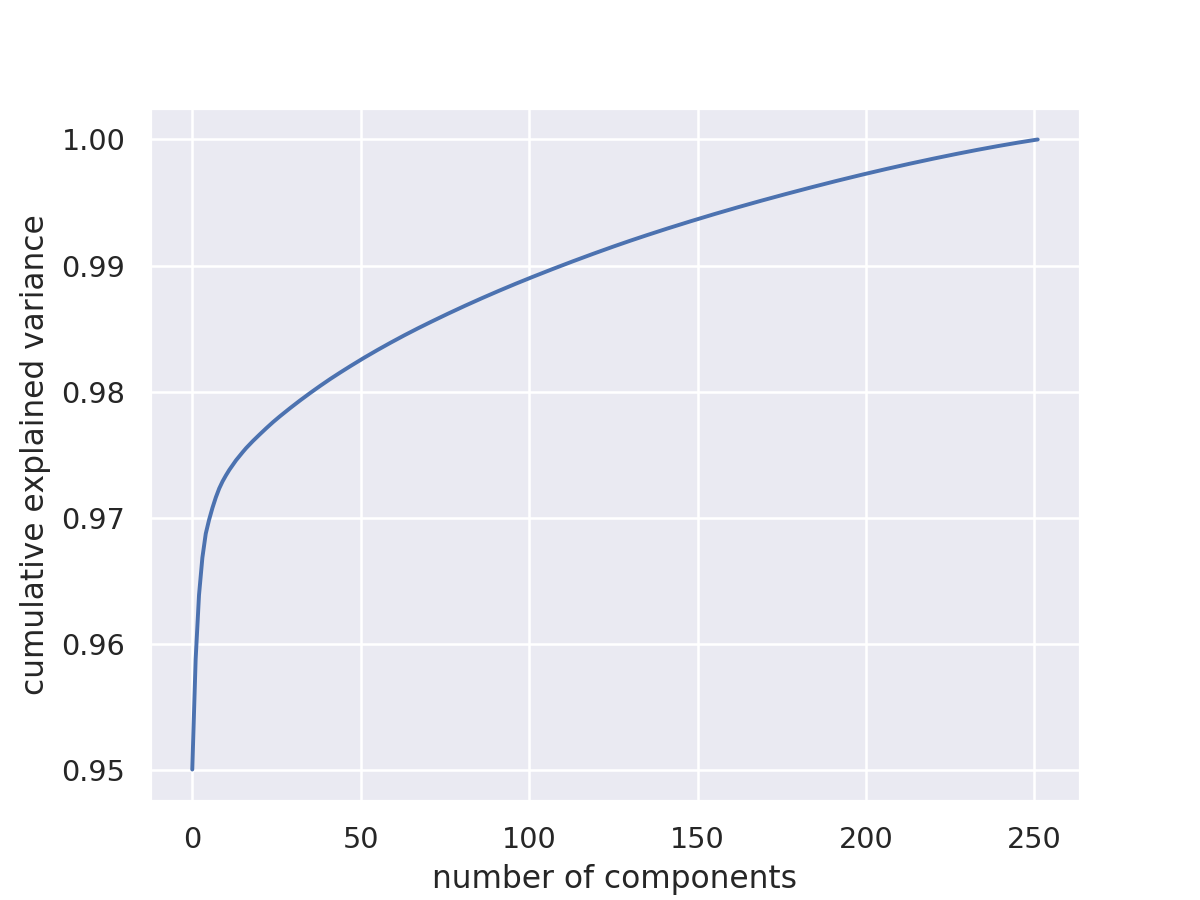

In [392]:
%matplotlib notebook
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#np.cumsum(pca.explained_variance_ratio_)

In [432]:
print(pca.singular_values_.mean())

155.37840216916774


In [394]:
print(pca.components_)

[[-0.06804927 -0.06831752 -0.06631417 ... -0.056798   -0.05717172
  -0.0558348 ]
 [ 0.12627125  0.12837296  0.13169832 ... -0.1378451  -0.12690201
  -0.14284912]
 [-0.11213492 -0.05817975 -0.08675458 ... -0.03078374 -0.04769089
  -0.02924847]
 ...
 [-0.15602384  0.1750584   0.0057688  ... -0.00388333 -0.00134714
   0.00356826]
 [-0.0328131   0.20010161  0.00378904 ...  0.00197344 -0.00236518
  -0.00190059]
 [ 0.03910857  0.04023113  0.00305815 ... -0.00065955 -0.00795723
  -0.00480562]]


In [398]:
pd.DataFrame(pca.components_,columns=df.columns)

In [433]:
dff[dff[0]>=155].index.tolist()

['mMCD.203273630036_R05C01',
 'mMCD.203273630036_R04C01',
 'mMCD.203273200231_R08C01',
 'FCD 3B.203189480060_R06C01',
 'FCD 3B.203257030151_R03C01',
 'mMCD.203273630036_R07C01',
 'FCD 3B.203257030151_R08C01',
 'FCD 3B.203257030151_R07C01',
 'FCD 3C.203219640200_R07C01',
 'mMCD.203273200229_R07C01',
 'FCD 2B.202822930161_R03C01',
 'mMCD.203273200108_R05C01',
 'FCD 3B.203189480060_R05C01',
 'mMCD.203273630036_R03C01',
 'FCD 3B.203189480060_R07C01',
 'MOGHE.202818860018_R05C01',
 'mMCD.203273630036_R02C01',
 'FCD 3B.203189480071_R02C01',
 'FCD 3C.203219640200_R08C01',
 'FCD 3D.203219730055_R08C01',
 'mMCD.203273200108_R06C01',
 'TSC.203220070086_R07C01',
 'FCD 3B.203189480017_R01C01',
 'mMCD.203273630036_R06C01',
 'mMCD.203273200229_R08C01',
 'TSC.203220070058_R03C01',
 'FCD 3B.203257030151_R02C01',
 'FCD 3B.203189480060_R08C01',
 'FCD 2A.202827620174_R02C01',
 'PMG_1q.203219730055_R06C01',
 'mMCD.203273630036_R01C01',
 'PMG.203219730055_R05C01',
 'FCD 2A.202827620174_R03C01',
 'FCD 2B.20

In [434]:
pca_comp=pd.DataFrame(pc, index=df.index.tolist())

ValueError: Shape of passed values is (158, 50), indices imply (579535, 50)

In [382]:
pca_comp

0         1         2         3         4         5    \
cg18478105  57.706851  1.142252  0.169771 -2.069029  2.446244 -2.205522   
cg14361672 -30.832907  0.938438 -2.847743  0.677509 -0.505487  1.788034   
cg01763666 -34.310101 -1.243259 -0.659125  0.732251 -1.228584  0.540774   
cg02115394  33.961480 -0.140846 -0.284357 -1.876900 -0.825737  0.289048   
cg13417420  53.505272  4.485130  0.975699  0.905498 -1.040874 -1.735175   
...               ...       ...       ...       ...       ...       ...   
cg21822051 -17.103591  2.883203  0.849257  0.504611 -0.711511  0.889090   
cg10615271 -28.923340  1.929290 -0.009578 -1.716218  1.268110 -0.306978   
cg16818145 -30.981853  2.901007  2.121549  0.031468  1.630410  0.396628   
cg10633746  54.444039  4.848738 -2.793828 -1.005669 -0.549595  0.634968   
cg12623625 -27.055783 -1.418093 -3.641536 -0.502611  1.847831 -1.973857   

                 6         7         8         9    ...       224       225  \
cg18478105 -1.580966  0.439986 -0.942950  0.227214  ...  0.819864  0.357709   
cg14361672 -1.161968  0.095541 -0.673251  0.666767  ...  0.389769  0.084788   
cg01763666  0.405053  0.055704 -0.660636  0.150176  ...  0.100776 -0.071136   
cg02115394 -0.951644 -0.371106 -1.504941 -0.160716  ... -0.084560 -0.390633   
cg13417420 -0.573929  1.453201  0.510748  0.796525  ...  0.049891 -0.609446   
...              ...       ...       ...       ...  ...       ...       ...   
cg21822051  0.479615 -0.345746 -0.635367  0.550168  ... -0.218187 -0.053248   
cg10615271  0.728952  0.558778  0.630300 -0.780856  ... -0.110386 -0.234921   
cg16818145 -0.953030  1.068995 -0.257076  0.812580  ... -0.126297 -0.283440   
cg10633746 -0.354798 -0.300599 -0.135276 -1.294390  ...  0.204702  0.197561   
cg12623625 -0.158706 -1.035562  1.835012 -0.690187  ... -0.058641 -0.490281   

                 226       227       228       229       230       231  \
cg18478105  0.683330 -0.628605  0.480854 -0.382979 -0.587528  0.107740   
cg14361672  0.238199 -0.154886 -0.137123 -0.135746  0.288285 -0.207097   
cg01763666  0.075369 -0.327600  0.074633  0.236930 -0.264551 -0.032532   
cg02115394  0.213102  0.205034  0.330883  0.099150  0.324614  0.043087   
cg13417420 -0.686080  1.011900 -0.427251 -0.485760 -0.074298  0.134977   
...              ...       ...       ...       ...       ...       ...   
cg21822051  0.104680  0.002573 -0.324198 -0.073851  0.060349  0.086702   
cg10615271 -0.158274  0.175904  0.037837 -0.243112  0.329449  0.146501   
cg16818145  0.679545  0.188868 -0.365699 -0.605025 -0.340992  0.249906   
cg10633746 -0.184103 -0.050855  0.157598 -0.316244  0.083402  0.045427   
cg12623625 -0.024239  0.260863 -0.190967 -0.210816 -0.164231  0.391970   

                 232       233  
cg18478105 -0.166758 -0.376755  
cg14361672  0.245018 -0.020780  
cg01763666  0.043282 -0.125183  
cg02115394  0.003956 -0.333007  
cg13417420 -1.337645 -0.614921  
...              ...       ...  
cg21822051 -0.113058 -0.077804  
cg10615271  0.095981 -0.268031  
cg16818145  0.103347  0.380140  
cg10633746 -0.106862 -0.006732  
cg12623625 -0.098480  0.074537  

[579535 rows x 234 columns]

In [383]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=pca_comp
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=9
                      ).fit(to_embed )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed)
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



KeyboardInterrupt: 

In [ ]:
embedding.shape

In [234]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})

#colordict={}
#for items, values in zip(X_transformed[group].unique().tolist(), colors):
#    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)
   

Loading BokehJS ...

In [235]:
tsne=sklearn.manifold.TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, 
                      learning_rate=200.0, n_iter=2500, n_iter_without_progress=300, 
                      min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
                      random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)

In [236]:
embeds=tsne.fit_transform(to_embed)

In [237]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embeds)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})

#colordict={}
#for items, values in zip(X_transformed[group].unique().tolist(), colors):
#    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)
   

Loading BokehJS ...

### MVR after statistics

In [584]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['Glia','yMed','xMed','Batchnum','location_wm_cx'],
                      #correction_vars=['location_wm_cx'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=11, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'Control - NCx-Control - WM', 2: 'Control - NCx-FCD 1A', 3: 'Control - NCx-FCD 2A', 4: 'Control - NCx-FCD 2B', 5: 'Control - NCx-FCD 3A', 6: 'Control - NCx-FCD 3B', 7: 'Control - NCx-FCD 3C', 8: 'Control - NCx-FCD 3D', 9: 'Control - NCx-HME', 10: 'Control - NCx-mMCD', 11: 'Control - NCx-MOGHE', 12: 'Control - NCx-PMG', 13: 'Control - NCx-PMG_1q', 14: 'Control - NCx-TLE/CTRL', 15: 'Control - NCx-TSC', 16: 'Control - WM-FCD 1A', 17: 'Control - WM-FCD 2A', 18: 'Control - WM-FCD 2B', 19: 'Control - WM-FCD 3A', 20: 'Control - WM-FCD 3B', 21: 'Control - WM-FCD 3C', 22: 'Control - WM-FCD 3D', 23: 'Control - WM-HME', 24: 'Control - WM-mMCD', 25: 'Control - WM-MOGHE', 26: 'Control - WM-PMG', 27: 'Control - WM-PMG_1q', 28: 'Control - WM-TLE/CTRL', 29: 'Control - WM-TSC', 30: 'FCD 1A-FCD 2A', 31: 'FCD 1A-FCD 2B', 32: 'FCD 1A-FCD 3A', 33: 'FCD 1A-FCD 3B', 34: 'FCD 1A-FCD 3C', 35: 'FCD 1A-FCD 3D', 36: 'FCD 1A-HME', 37: 'FCD 1A-mMCD',

In [654]:
#preproidat.dmps_list[0]['Relation_to_Island'].unique()

array(['OpenSea', 'N_Shore', 'Island', 'S_Shore', 'S_Shelf', 'N_Shelf'],
      dtype=object)

In [585]:
preproidat.dectest

diseaseControl...NCx-diseaseControl...WM  \
Down                                      7196.0   
NotSig                                  559623.0   
Up                                       12716.0   

        diseaseControl...NCx-diseaseFCD.1A  \
Down                                2169.0   
NotSig                            575504.0   
Up                                  1862.0   

        diseaseControl...NCx-diseaseFCD.2A  \
Down                                3642.0   
NotSig                            572158.0   
Up                                  3735.0   

        diseaseControl...NCx-diseaseFCD.2B  \
Down                                5256.0   
NotSig                            568478.0   
Up                                  5801.0   

        diseaseControl...NCx-diseaseFCD.3A  \
Down                               13431.0   
NotSig                            558423.0   
Up                                  7681.0   

        diseaseControl...NCx-diseaseFCD.3B  \
Down                               20993.0   
NotSig                            523210.0   
Up                                 35332.0   

        diseaseControl...NCx-diseaseFCD.3C  \
Down                                3346.0   
NotSig                            572152.0   
Up                                  4037.0   

        diseaseControl...NCx-diseaseFCD.3D  diseaseControl...NCx-diseaseHME  \
Down                                4921.0                           2236.0   
NotSig                            566499.0                         574794.0   
Up                                  8115.0                           2505.0   

        diseaseControl...NCx-diseasemMCD  ...  diseaseMOGHE-diseasePMG  \
Down                             23137.0  ...                  17483.0   
NotSig                          516046.0  ...                 549244.0   
Up                               40352.0  ...                  12808.0   

        diseaseMOGHE-diseasePMG_1q  diseaseMOGHE-diseaseTLE.CTRL  \
Down                        7413.0                       29252.0   
NotSig                    567964.0                      512564.0   
Up                          4158.0                       37719.0   

        diseaseMOGHE-diseaseTSC  diseasePMG-diseasePMG_1q  \
Down                    38967.0                     276.0   
NotSig                 482824.0                  578973.0   
Up                      57744.0                     286.0   

        diseasePMG-diseaseTLE.CTRL  diseasePMG-diseaseTSC  \
Down                        5104.0                27622.0   
NotSig                    564171.0               513483.0   
Up                         10260.0                38430.0   

        diseasePMG_1q-diseaseTLE.CTRL  diseasePMG_1q-diseaseTSC  \
Down                           3814.0                   10572.0   
NotSig                       570630.0                  552191.0   
Up                             5091.0                   16772.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       83790.0  
NotSig                    423856.0  
Up                         71889.0  

[3 rows x 120 columns]

In [412]:
#mval_10000=preproidat.mval_py.transpose().loc[dff[dff[0]>=155].index.tolist()].transpose()

In [586]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000
#mval_10000=preproidat.mval_py.loc[test]; mval_10000

#mval_10000=mval_10000.transpose().loc[dff[dff[0]>=300].index.tolist()].transpose()
mval_10000

Control - NCx.202931510124_R04C01  \
cg00290758                          -0.929024   
cg17291385                           1.143281   
cg18286850                          -0.989198   
cg19085693                           1.017418   
cg16669388                           1.089475   
...                                       ...   
cg18851133                           0.554325   
cg02153172                           0.899126   
cg04243827                           1.127711   
cg22355352                          -0.447283   
cg23401282                           1.285192   

            Control - WM.202931510124_R05C01  \
cg00290758                         -3.011793   
cg17291385                          2.325608   
cg18286850                         -2.312134   
cg19085693                         -1.554321   
cg16669388                          1.637949   
...                                      ...   
cg18851133                          1.137925   
cg02153172                          0.249008   
cg04243827                          1.268299   
cg22355352                         -1.058789   
cg23401282                          0.878997   

            Control - NCx.202931510124_R06C01  \
cg00290758                          -1.189665   
cg17291385                           1.101751   
cg18286850                          -0.249793   
cg19085693                           0.877661   
cg16669388                           1.038339   
...                                       ...   
cg18851133                           0.709107   
cg02153172                           0.584331   
cg04243827                           1.535176   
cg22355352                           0.048433   
cg23401282                           1.142803   

            Control - WM.202931510124_R07C01  \
cg00290758                         -1.909885   
cg17291385                          1.373120   
cg18286850                         -1.903434   
cg19085693                         -0.935164   
cg16669388                          2.607557   
...                                      ...   
cg18851133                          0.823253   
cg02153172                          0.360426   
cg04243827                          1.180567   
cg22355352                         -0.008762   
cg23401282                          0.859622   

            Control - WM.202939390010_R06C01  \
cg00290758                         -4.970047   
cg17291385                          3.213392   
cg18286850                         -3.535401   
cg19085693                         -2.367270   
cg16669388                          5.052139   
...                                      ...   
cg18851133                          0.633002   
cg02153172                          0.402111   
cg04243827                          1.627941   
cg22355352                         -0.095845   
cg23401282                          0.085052   

            Control - NCx.202939390010_R07C01  \
cg00290758                          -1.453724   
cg17291385                           0.555783   
cg18286850                          -0.910748   
cg19085693                           0.466423   
cg16669388                           0.898389   
...                                       ...   
cg18851133                           0.264409   
cg02153172                           0.229579   
cg04243827                           0.732155   
cg22355352                           0.219986   
cg23401282                           0.553724   

            Control - WM.202939390010_R08C01  \
cg00290758                         -3.633877   
cg17291385                          3.387366   
cg18286850                         -2.660203   
cg19085693                         -1.704105   
cg16669388                          2.345114   
...                                      ...   
cg18851133                          0.125418   
cg02153172                         -0.736618   
cg04243827                          0.622173   
cg22355352                        

In [587]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000
#beta_10000=preproidat.beta_py.loc[test];beta_10000

#beta_10000=beta_10000.transpose().loc[dff[dff[0]>=300].index.tolist()].transpose()
beta_10000

Control - NCx.202931510124_R04C01  \
cg00290758                           0.344354   
cg17291385                           0.688360   
cg18286850                           0.334999   
cg19085693                           0.669344   
cg16669388                           0.680303   
...                                       ...   
cg18851133                           0.594893   
cg02153172                           0.650952   
cg04243827                           0.686040   
cg22355352                           0.423107   
cg23401282                           0.709061   

            Control - WM.202931510124_R05C01  \
cg00290758                          0.110306   
cg17291385                          0.833687   
cg18286850                          0.167612   
cg19085693                          0.254003   
cg16669388                          0.756823   
...                                      ...   
cg18851133                          0.687563   
cg02153172                          0.543043   
cg04243827                          0.706639   
cg22355352                          0.324340   
cg23401282                          0.647775   

            Control - NCx.202931510124_R06C01  \
cg00290758                           0.304785   
cg17291385                           0.682151   
cg18286850                           0.456822   
cg19085693                           0.647564   
cg16669388                           0.672546   
...                                       ...   
cg18851133                           0.620463   
cg02153172                           0.599895   
cg04243827                           0.743474   
cg22355352                           0.508392   
cg23401282                           0.688289   

            Control - WM.202931510124_R07C01  \
cg00290758                          0.210182   
cg17291385                          0.721472   
cg18286850                          0.210925   
cg19085693                          0.343394   
cg16669388                          0.859050   
...                                      ...   
cg18851133                          0.638910   
cg02153172                          0.562134   
cg04243827                          0.693877   
cg22355352                          0.498482   
cg23401282                          0.644705   

            Control - WM.202939390010_R06C01  \
cg00290758                          0.030919   
cg17291385                          0.902679   
cg18286850                          0.079398   
cg19085693                          0.162347   
cg16669388                          0.970741   
...                                      ...   
cg18851133                          0.607964   
cg02153172                          0.569233   
cg04243827                          0.755544   
cg22355352                          0.483397   
cg23401282                          0.514734   

            Control - NCx.202939390010_R07C01  \
cg00290758                           0.267441   
cg17291385                           0.595136   
cg18286850                           0.347220   
cg19085693                           0.580128   
cg16669388                           0.650836   
...                                       ...   
cg18851133                           0.545691   
cg02153172                           0.539699   
cg04243827                           0.624218   
cg22355352                           0.538047   
cg23401282                           0.594792   

            Control - WM.202939390010_R08C01  \
cg00290758                          0.074550   
cg17291385                          0.912771   
cg18286850                          0.136589   
cg19085693                          0.234837   
cg16669388                          0.835553   
...                                      ...   
cg18851133                          0.521720   
cg02153172                          0.375056   
cg04243827                          0.606174   
cg22355352                        

In [578]:
#sorter=
#dataframe=mval_10000
sorter=mval_10000.var(axis=1).sort_values(ascending=False)[:600]
mval_10000=mval_10000.reindex(sorter.index)
#dataframe=dataframe.transpose().reindex(sorter.index).transpose()
mval_10000
#sorter

Control - NCx.202931510124_R04C01  \
cg27459437                           2.659403   
cg04628419                           0.490549   
cg23581913                          -1.554210   
cg03286766                           1.795673   
cg25304867                           1.604160   
...                                       ...   
cg22424835                          -1.884765   
cg03586379                          -3.133086   
cg13395333                          -2.702753   
cg09093208                          -0.437953   
cg26184443                           1.867914   

            Control - WM.202931510124_R05C01  \
cg27459437                         -0.198758   
cg04628419                          1.386133   
cg23581913                          0.611652   
cg03286766                         -0.812912   
cg25304867                         -0.486049   
...                                      ...   
cg22424835                         -2.583969   
cg03586379                         -2.626854   
cg13395333                         -2.388802   
cg09093208                         -0.197424   
cg26184443                          2.364708   

            Control - NCx.202931510124_R06C01  \
cg27459437                           1.767044   
cg04628419                           0.628041   
cg23581913                          -1.461666   
cg03286766                           1.311903   
cg25304867                           1.776393   
...                                       ...   
cg22424835                          -2.413590   
cg03586379                          -2.704079   
cg13395333                          -2.692518   
cg09093208                          -0.030260   
cg26184443                           1.398343   

            Control - WM.202931510124_R07C01  \
cg27459437                          0.011483   
cg04628419                          1.076454   
cg23581913                          0.274143   
cg03286766                         -0.077264   
cg25304867                          0.180591   
...                                      ...   
cg22424835                         -2.426358   
cg03586379                         -2.748796   
cg13395333                         -2.842338   
cg09093208                         -0.170104   
cg26184443                          2.175794   

            Control - WM.202939390010_R06C01  \
cg27459437                         -0.806351   
cg04628419                          1.670409   
cg23581913                          1.181755   
cg03286766                         -2.151992   
cg25304867                         -0.996532   
...                                      ...   
cg22424835                         -3.271070   
cg03586379                         -2.197308   
cg13395333                         -2.156505   
cg09093208                          0.158602   
cg26184443                          2.228039   

            Control - NCx.202939390010_R07C01  \
cg27459437                           0.860366   
cg04628419                           0.585116   
cg23581913                          -2.100052   
cg03286766                           0.521813   
cg25304867                           1.134079   
...                                       ...   
cg22424835                          -2.447248   
cg03586379                          -2.412463   
cg13395333                          -3.271713   
cg09093208                           0.412149   
cg26184443                           2.461462   

            Control - WM.202939390010_R08C01  \
cg27459437                         -0.428052   
cg04628419                          1.851101   
cg23581913                          1.147245   
cg03286766                         -1.030958   
cg25304867                         -1.051272   
...                                      ...   
cg22424835                         -2.759991   
cg03586379                         -2.009477   
cg13395333                         -2.883077   
cg09093208                        

<IPython.core.display.Javascript object>


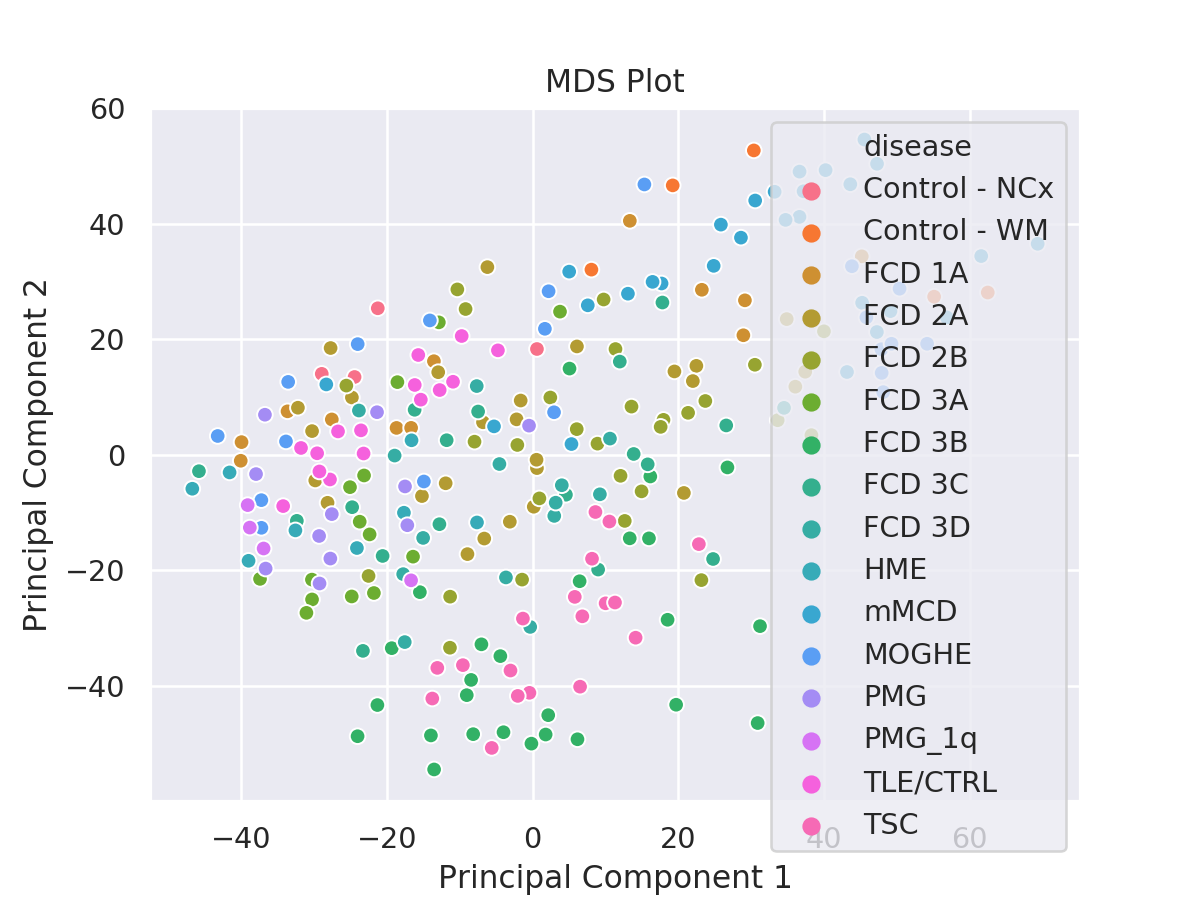

In [280]:
%matplotlib notebook
preproidat.plt_mds(dataframe=mval_10000, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

In [460]:
import sklearn
pca=sklearn.decomposition.PCA(n_components=50, svd_solver='randomized')

In [461]:
pc=pca.fit_transform(mval_10000.transpose().to_numpy())

<IPython.core.display.Javascript object>


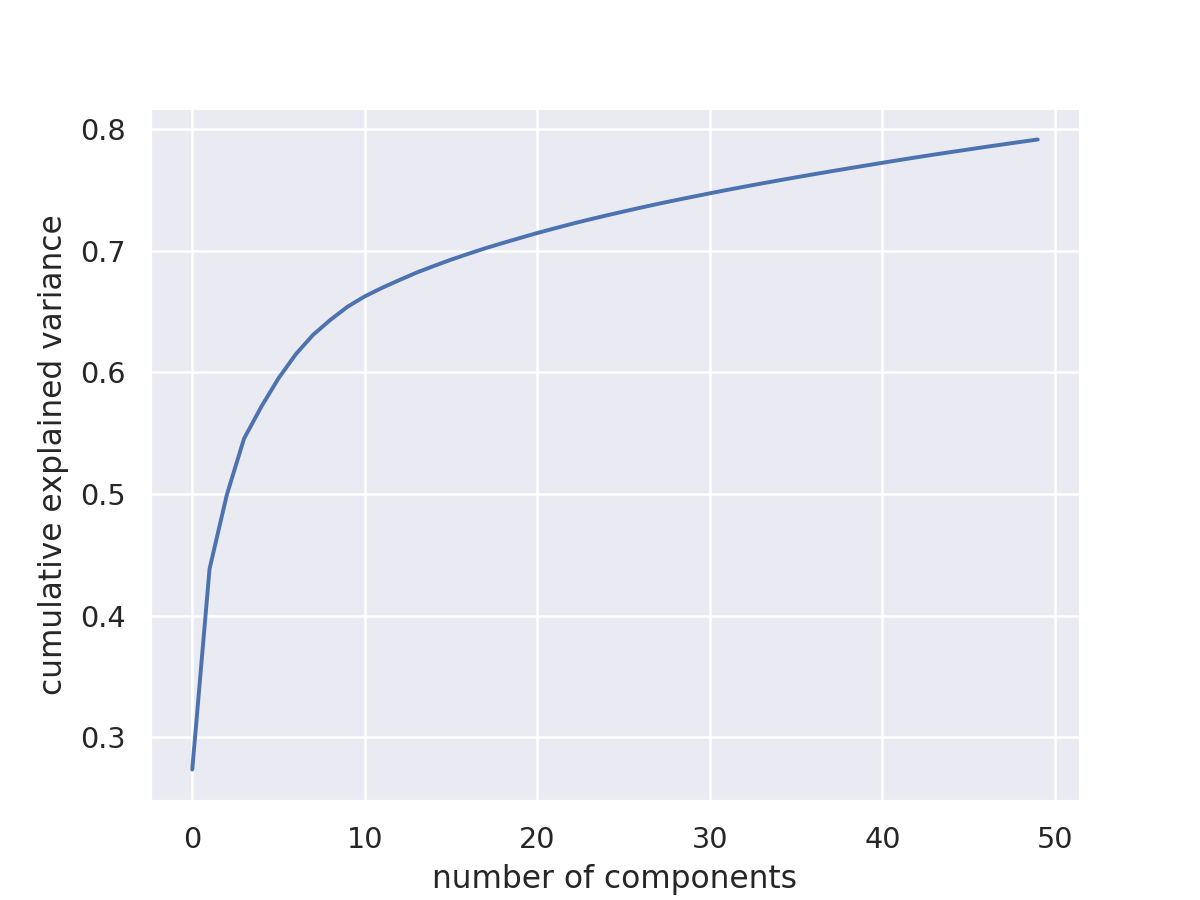

In [462]:
%matplotlib notebook
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [463]:
pca_comp=pd.DataFrame(pc, index=mval_10000.transpose().index.tolist())

In [464]:
pca_comp

0           1          2          3   \
mMCD.203273630036_R05C01    197.040946   16.338461  32.053481  17.183302   
mMCD.203273630036_R04C01    131.817767   43.888133  24.552681  -4.562638   
mMCD.203273200231_R08C01    165.500794   24.575995  31.708501  -3.626406   
FCD 3B.203189480060_R06C01    3.754366  141.974511  16.180982  33.999740   
FCD 3B.203257030151_R03C01  -33.769809  143.401325   1.311089  81.191916   
...                                ...         ...        ...        ...   
MOGHE.202818860018_R07C01   -82.445449  -86.808006 -15.958746 -25.234900   
FCD 3D.203219640218_R01C01  -42.792902  -47.868564 -67.250505   3.159042   
HME.203197470164_R08C01     -72.361044  -63.993829 -73.484138 -10.820505   
MOGHE.203041550107_R04C01   -34.786315  -97.284713 -41.417643   3.971786   
MOGHE.203041550107_R06C01   -60.200297 -100.639828 -39.289821   8.061122   

                                   4          5          6          7   \
mMCD.203273630036_R05C01   -24.680469  17.265590   5.539413   5.148309   
mMCD.203273630036_R04C01   -50.500401   2.222634   9.022501  15.697124   
mMCD.203273200231_R08C01    -5.297481  -3.146471  21.421835   1.198366   
FCD 3B.203189480060_R06C01   5.579271  -7.685185  -1.319847 -11.732896   
FCD 3B.203257030151_R03C01  13.384089 -21.879585 -30.856374   1.733688   
...                               ...        ...        ...        ...   
MOGHE.202818860018_R07C01  -11.409018 -24.804311  -1.898080  -3.483779   
FCD 3D.203219640218_R01C01  13.776810  19.157775  14.911586 -23.101541   
HME.203197470164_R08C01    -14.453608 -10.221757  12.174195  -2.163142   
MOGHE.203041550107_R04C01   -8.052436 -16.547298  -5.323893 -10.487438   
MOGHE.203041550107_R06C01    1.948292 -13.354697  -7.384605 -16.242872   

                                   8          9   ...         40         41  \
mMCD.203273630036_R05C01     1.541663  -4.457665  ...   3.280041   4.266902   
mMCD.203273630036_R04C01    -3.954427  -4.597694  ...   3.838428   5.819055   
mMCD.203273200231_R08C01    -3.269898  -3.857287  ...   0.641835  17.560731   
FCD 3B.203189480060_R06C01 -25.456759  -4.672560  ...  -6.362451  -1.383144   
FCD 3B.203257030151_R03C01  -0.470540 -27.934807  ... -15.141111   4.309732   
...                               ...        ...  ...        ...        ...   
MOGHE.202818860018_R07C01   13.083199   5.808325  ...   3.033336  31.449610   
FCD 3D.203219640218_R01C01   2.460410 -14.802782  ...  11.743722 -11.118429   
HME.203197470164_R08C01      9.958306 -14.392779  ...  -1.651724   2.035751   
MOGHE.203041550107_R04C01   19.158988   6.947671  ...  -3.274651  -3.720524   
MOGHE.203041550107_R06C01   18.298359   9.019698  ...  -3.383805  -0.348599   

                                   42         43         44         45  \
mMCD.203273630036_R05C01     2.128556   6.351942  -3.419771  -2.036796   
mMCD.203273630036_R04C01     0.708730   6.448894  -5.643937  -0.610157   
mMCD.203273200231_R08C01   -13.304409 -13.992022  -1.566146   5.310094   
FCD 3B.203189480060_R06C01   1.557474   1.959048  -3.154196  -6.782695   
FCD 3B.203257030151_R03C01   3.644172  -5.311046  11.703312   3.913338   
...                               ...        ...        ...        ...   
MOGHE.202818860018_R07C01   -7.815066   3.930967  -3.657449 -18.249400   
FCD 3D.203219640218_R01C01  -5.269989  -7.768692   5.858156  -3.358524   
HME.203197470164_R08C01      0.637448  -5.394888  -2.318253  -1.602059   
MOGHE.203041550107_R04C01    1.867213   1.368290   2.000899  -6.602951   
MOGHE.203041550107_R06C01    3.146571   1.446139  -3.655218  -8.633321   

                                   46         47         48         49  
mMCD.203273630036_R05C01    -5.026198   0.127868   3.820257  -2.000663  
mMCD.203273630036_R04C01     0.675609   2.907286   4.564769  -3.378682  
mMCD.203273200231_R08C01     8.461521 -12.087029 -12.645217 -10.604712  
FCD 3B.203189480060_R06C01   0.144625   2.893121  -0.848746  -2.314603  
FCD 3B.203257030151_R03C01 -10.

In [588]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000#.transpose()
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      #metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
embedding.shape

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



UMAP done! Time elapsed: 0.510310173034668 seconds


(252, 2)

In [589]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})


from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)
   

Loading BokehJS ...

In [581]:
tsne=sklearn.manifold.TSNE(n_components=2, perplexity=15.0, early_exaggeration=15.0, 
                      learning_rate=20.0, n_iter=2500, n_iter_without_progress=300, 
                      min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
                      random_state=123, method='barnes_hut', angle=0.5, n_jobs=None)

In [582]:
embeds=tsne.fit_transform(to_embed.transpose())

In [583]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embeds)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})

#colordict={}
#for items, values in zip(X_transformed[group].unique().tolist(), colors):
#    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo

#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)
   

Loading BokehJS ...